In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
path2data="/Users/luizaadelinaciucu/Work/TrackML/input/"
#df_hits=pd.read_csv(path2data+"event000021069-hits.csv")
eventNumber="000021069"

In [70]:
inputFileName=path2data+"/event"+eventNumber+"-hits.csv"
print("inputFileName",inputFileName)
df_hits_recon=pd.read_csv(inputFileName)

('inputFileName', '/Users/luizaadelinaciucu/Work/TrackML/input//event000021069-hits.csv')


In [71]:
inputFileName=path2data+"/event"+eventNumber+"-truth.csv"
print("inputFileName",inputFileName)
df_hits_truth=pd.read_csv(inputFileName)

('inputFileName', '/Users/luizaadelinaciucu/Work/TrackML/input//event000021069-truth.csv')


In [72]:
inputFileName=path2data+"/event"+eventNumber+"-particles.csv"
print("inputFileName",inputFileName)
df_particles=pd.read_csv(inputFileName)

('inputFileName', '/Users/luizaadelinaciucu/Work/TrackML/input//event000021069-particles.csv')


In [73]:
outputFolderName="/Users/luizaadelinaciucu/Work/TrackML/output/"
fileNameNNInput=outputFolderName+"NN_input.npy"
fileNameNNOutput=outputFolderName+"NN_output.npy"


In [74]:
df_hits_recon.shape

(95224, 7)

In [75]:
df_hits_recon.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-96.0251,-11.043100,-1502.5,7,2,1
1,2,-57.1466,-5.425400,-1502.5,7,2,1
2,3,-83.1498,-9.277450,-1502.5,7,2,1
3,4,-70.7627,-11.261700,-1502.5,7,2,1
4,5,-73.3473,0.070458,-1502.5,7,2,1


In [76]:
df_hits_truth.shape

(95224, 9)

In [77]:
df_hits_truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,2,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,3,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,4,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,5,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026


In [78]:
#from annoy import AnnoyIndex
#import random

In [79]:
#df_hits.head()


In [80]:
df_particles.shape

(9003, 10)

In [81]:
#df_truth.head()

In [82]:
#df_particles.tail()

In [83]:
del df_hits_truth['hit_id']

In [84]:
#df_hits.shape

In [85]:
df_hits_truth.shape

(95224, 8)

In [86]:
df_hits_truth.head()

,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026


In [87]:
#df_truth.shape

In [88]:
#df_particles.shape

In [89]:
df_hits = pd.concat([df_hits_recon, df_hits_truth], axis=1, sort=False)

In [90]:
#df=pd.concat([df_hits,df_truth],axis=1)

In [91]:
df_hits.shape

(95224, 15)

In [92]:
#df.head()



In [93]:
df_hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,-96.0251,-11.043100,-1502.5,7,2,1,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,2,-57.1466,-5.425400,-1502.5,7,2,1,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,3,-83.1498,-9.277450,-1502.5,7,2,1,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,4,-70.7627,-11.261700,-1502.5,7,2,1,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,5,-73.3473,0.070458,-1502.5,7,2,1,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026


In [94]:
#def buildAnnoyIndex(data,metric="angular",ntrees=10):
    #f = len(data[0])
    #t = AnnoyIndex(f,metric)  
    #for i,d in enumerate(data):
        #t.add_item(i, d)
    #t.build(ntrees) # 10 trees
    #return t



#data=df[["x","y","z"]].values

#index=buildAnnoyIndex(data,metric="angular",ntrees=10)


#NB_BUCKET=5
#for i in range(NB_BUCKET):
    #n=random.choice(range(len(data)))
    
    #bucket_idx=np.array(index.get_nns_by_item(n,50))
    #bucket=df.iloc[bucket_idx]
    #plt.plot(bucket.x,bucket.y,"o")
    #plt.plot(0,0,"r+")
#plt.show()

In [95]:
BUCKET_SIZE=20
BUCKET_START=0
df_bucket=df_hits[BUCKET_START:BUCKET_START+BUCKET_SIZE]

In [96]:
df_bucket.shape

(20, 15)

In [97]:
df_bucket.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,-96.0251,-11.043100,-1502.5,7,2,1,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,2,-57.1466,-5.425400,-1502.5,7,2,1,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,3,-83.1498,-9.277450,-1502.5,7,2,1,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,4,-70.7627,-11.261700,-1502.5,7,2,1,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,5,-73.3473,0.070458,-1502.5,7,2,1,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026


In [98]:
df_bucket

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,-96.0251,-11.043100,-1502.5,7,2,1,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,2,-57.1466,-5.425400,-1502.5,7,2,1,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,3,-83.1498,-9.277450,-1502.5,7,2,1,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,4,-70.7627,-11.261700,-1502.5,7,2,1,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,5,-73.3473,0.070458,-1502.5,7,2,1,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026
5,6,-83.4740,1.129180,-1502.5,7,2,1,616997065959931904,-83.4787,1.105010,-1502.5,-0.488937,-0.021615,-8.70473,0.000009
6,7,-58.1014,-5.149460,-1502.5,7,2,1,747602623384780800,-58.1202,-5.148580,-1502.5,-0.838924,-0.055120,-21.11950,0.000017
7,8,-59.7223,2.597250,-1502.5,7,2,1,333274824921055232,-59.7189,2.573510,-1502.5,-0.436118,-0.005628,-11.64620,0.000010
8,9,-83.0065,-14.131200,-1502.5,7,2,1,450366010051002368,-83.0082,-14.125400,-1502.5,-0.206439,-0.054707,-3.23858,0.000010
9,10,-66.6130,-10.935100,-1502.5,7,2,1,580973766499106816,-66.6009,-10.956200,-1502.5,-0.212149,-0.008676,-4.42666,0.000011


In [99]:
#for i in range(NB_BUCKET):
    #n=random.choice(range(len(data)))
    
    #bucket_idx=np.array(index.get_nns_by_item(n,20))
    #bucket=df.iloc[bucket_idx]
    #for k,v in bucket[["hit_id","x","y","z","particle_id"]].groupby("particle_id"):
        #print (v)
    #print ("-----")
    #print ("i")

In [100]:
df_bucket["particle_id"]

0     351284413067165696
1     220692736976617472
2     193656433244372992
3     693574683580170240
4     693560115051102208
5     616997065959931904
6     747602623384780800
7     333274824921055232
8     450366010051002368
9     580973766499106816
10    576475664429875200
11                     0
12     22553113789464576
13    774620304138829824
14    423341663507709952
15                     0
16    743104246437642240
17                     0
18    770117804023087104
19    743104246437642240
Name: particle_id, dtype: int64

In [101]:
#df

In [102]:
df_bucket["particle_id"]

0     351284413067165696
1     220692736976617472
2     193656433244372992
3     693574683580170240
4     693560115051102208
5     616997065959931904
6     747602623384780800
7     333274824921055232
8     450366010051002368
9     580973766499106816
10    576475664429875200
11                     0
12     22553113789464576
13    774620304138829824
14    423341663507709952
15                     0
16    743104246437642240
17                     0
18    770117804023087104
19    743104246437642240
Name: particle_id, dtype: int64

In [103]:
df_bucket.particle_id

0     351284413067165696
1     220692736976617472
2     193656433244372992
3     693574683580170240
4     693560115051102208
5     616997065959931904
6     747602623384780800
7     333274824921055232
8     450366010051002368
9     580973766499106816
10    576475664429875200
11                     0
12     22553113789464576
13    774620304138829824
14    423341663507709952
15                     0
16    743104246437642240
17                     0
18    770117804023087104
19    743104246437642240
Name: particle_id, dtype: int64

In [104]:
#tuple_most_common=list_tuple_most_common[0]
#tuple_most_common

In [105]:
df_bucket.particle_id.values

array([351284413067165696, 220692736976617472, 193656433244372992,
       693574683580170240, 693560115051102208, 616997065959931904,
       747602623384780800, 333274824921055232, 450366010051002368,
       580973766499106816, 576475664429875200,                  0,
        22553113789464576, 774620304138829824, 423341663507709952,
                        0, 743104246437642240,                  0,
       770117804023087104, 743104246437642240])

In [106]:
#particle_id_most_common=tuple_most_common[0]
#particle_id_most_common

In [107]:
#from collections import Counter
#print ( Counter(df.particle_id.values ) )

In [108]:
from collections import Counter

In [109]:
counter=Counter(df_bucket.particle_id.values)
counter

Counter({0: 3,
         22553113789464576: 1,
         193656433244372992: 1,
         220692736976617472: 1,
         333274824921055232: 1,
         351284413067165696: 1,
         423341663507709952: 1,
         450366010051002368: 1,
         576475664429875200: 1,
         580973766499106816: 1,
         616997065959931904: 1,
         693560115051102208: 1,
         693574683580170240: 1,
         743104246437642240: 2,
         747602623384780800: 1,
         770117804023087104: 1,
         774620304138829824: 1})

In [110]:
list_tuple_most_common=counter.most_common()
list_tuple_most_common

[(0, 3),
 (743104246437642240, 2),
 (351284413067165696, 1),
 (220692736976617472, 1),
 (747602623384780800, 1),
 (770117804023087104, 1),
 (693560115051102208, 1),
 (450366010051002368, 1),
 (580973766499106816, 1),
 (333274824921055232, 1),
 (693574683580170240, 1),
 (423341663507709952, 1),
 (576475664429875200, 1),
 (22553113789464576, 1),
 (774620304138829824, 1),
 (193656433244372992, 1),
 (616997065959931904, 1)]

In [111]:
tuple_most_common=list_tuple_most_common[0]
tuple_most_common

(0, 3)

In [112]:
particle_id_most_common=tuple_most_common[0]
particle_id_most_common

0

In [113]:
hit=df_bucket.iloc[7]
hit

hit_id         8.000000e+00
x             -5.972230e+01
y              2.597250e+00
z             -1.502500e+03
volume_id      7.000000e+00
layer_id       2.000000e+00
module_id      1.000000e+00
particle_id    3.332748e+17
tx            -5.971890e+01
ty             2.573510e+00
tz            -1.502500e+03
tpx           -4.361180e-01
tpy           -5.628240e-03
tpz           -1.164620e+01
weight         1.045220e-05
Name: 7, dtype: float64

In [114]:
hit_id=hit["hit_id"]
hit_id

8.0

In [115]:
particle_id=hit["particle_id"]
particle_id

3.332748249210552e+17

In [116]:
list_input=[]
list_output=[]

# loop over the hits in the bucket
for i in range(df_bucket.shape[0]):
    # we get all a dictionary of names of the columns to values for the i'th row as df_bucket.iloc[i]
    print "i",i,"hit_id",df_bucket.iloc[i]["hit_id"],"x",df_bucket.iloc[i]["x"],"y",df_bucket.iloc[i]["y"],"z",df_bucket.iloc[i]["z"],"particle_id",df_bucket.iloc[i]["particle_id"]
    # now fill the input list, but adding one at a time the values of x, y, z
    list_input.append(df_bucket.iloc[i]["x"])
    list_input.append(df_bucket.iloc[i]["y"])
    list_input.append(df_bucket.iloc[i]["z"])
    # now fill the output list 
    # check if our particle_id is the same as the most common one, if so, choose 1, if not choose 0
    if df_bucket.iloc[i]["particle_id"]==particle_id_most_common:
        output=1
    else:
        output=0
    # add the output to the list
    list_output.append(output)
# done for loop over all the hits in the bucket
# print out the list_input, filled with the x, y, z values
print "list_input",list_input
# let's make sure that it has three times number of elements like the bucket size
print "list_input has so many elements:",len(list_input)
# print out the list_output, filled with either 1 or 0
print "list_output",list_output
# let's make sure that it has the same number of elements like the bucket size
print "list_output has so many elements:",len(list_output)

i 0 hit_id 1.0 x -96.0251 y -11.0431 z -1502.5 particle_id 3.512844130671657e+17
i 1 hit_id 2.0 x -57.1466 y -5.4254 z -1502.5 particle_id 2.2069273697661747e+17
i 2 hit_id 3.0 x -83.1498 y -9.27745 z -1502.5 particle_id 1.93656433244373e+17
i 3 hit_id 4.0 x -70.7627 y -11.2617 z -1502.5 particle_id 6.935746835801702e+17
i 4 hit_id 5.0 x -73.3473 y 0.07045760000000001 z -1502.5 particle_id 6.935601150511022e+17
i 5 hit_id 6.0 x -83.47399999999999 y 1.1291799999999999 z -1502.5 particle_id 6.169970659599319e+17
i 6 hit_id 7.0 x -58.1014 y -5.1494599999999995 z -1502.5 particle_id 7.476026233847808e+17
i 7 hit_id 8.0 x -59.7223 y 2.59725 z -1502.5 particle_id 3.332748249210552e+17
i 8 hit_id 9.0 x -83.0065 y -14.1312 z -1502.5 particle_id 4.503660100510024e+17
i 9 hit_id 10.0 x -66.613 y -10.9351 z -1502.5 particle_id 5.809737664991068e+17
i 10 hit_id 11.0 x -78.6731 y -8.37343 z -1502.5 particle_id 5.764756644298752e+17
i 11 hit_id 12.0 x -31.0244 y -5.73315 z -1502.5 particle_id 0.0
i 

In [117]:
nparray_error_x=df_hits["x"]-df_hits["tx"]
nparray_error_x

0        0.0021
1       -0.0038
2       -0.0118
3       -0.0179
4        0.0108
5        0.0047
6        0.0188
7       -0.0034
8        0.0017
9       -0.0121
10       0.0152
11       0.0011
12       0.0118
13       0.0100
14       0.0040
15       0.0000
16      -0.0010
17      -0.0030
18      -0.0100
19      -0.0050
20       0.0010
21      -0.0040
22       0.0010
23      -0.0010
24       0.0080
25      -0.0100
26      -0.0070
27      -0.0020
28      -0.0070
29      -0.0030
          ...  
95194   -1.9610
95195    1.1550
95196    0.5170
95197   -4.5370
95198   -2.2630
95199   -0.5060
95200   -4.4300
95201    2.7440
95202    0.3430
95203   -0.0920
95204    1.2750
95205    4.2570
95206   -1.7660
95207   -3.4120
95208    0.9640
95209    0.5140
95210    0.2300
95211   -4.2920
95212    4.3120
95213   -1.3010
95214   -3.9190
95215    0.8680
95216    0.2860
95217   -2.0560
95218   -2.5960
95219    3.5810
95220   -3.8060
95221    3.3730
95222   -0.5920
95223   -2.5100
Length: 95224, dtype: fl

(array([  36.,   37.,   46.,   37.,   50.,   38.,   44.,   39.,   29.,
          41.,   44.,   33.,   49.,   47.,   31.,   51.,   55.,   52.,
          55.,   48.,   50.,   62.,   71.,   77.,   89.,   95.,   99.,
         111.,  156.,  160.,  199.,  220.,  204.,  316.,  315.,  387.,
         523.,  664.,  749., 1086., 1554., 1465., 1969., 2404., 2762.,
        4141., 4464., 4621., 5350., 5291., 8162., 5462., 4631., 4581.,
        4159., 2670., 2456., 2093., 1548., 1510., 1053.,  809.,  677.,
         493.,  385.,  353.,  310.,  197.,  192.,  180.,  168.,  151.,
         107.,   92.,  103.,   78.,   81.,   73.,   69.,   37.,   64.,
          64.,   39.,   59.,   42.,   28.,   53.,   39.,   40.,   41.,
          46.,   26.,   36.,   38.,   50.,   38.,   47.,   30.,   38.,
          35.]),
 array([-0.1  , -0.098, -0.096, -0.094, -0.092, -0.09 , -0.088, -0.086,
        -0.084, -0.082, -0.08 , -0.078, -0.076, -0.074, -0.072, -0.07 ,
        -0.068, -0.066, -0.064, -0.062, -0.06 , -0.058, -0

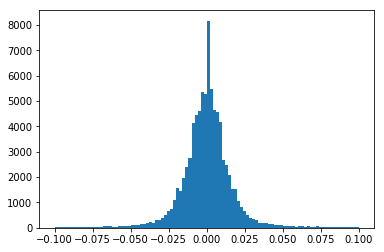

In [118]:
plt.hist(nparray_error_x, bins=100, range=(-0.1,0.1))

In [119]:
nparray_error_y=df_hits["y"]-df_hits["ty"]
nparray_error_y

0       -0.001100
1        0.021580
2        0.015180
3        0.012500
4       -0.000993
5        0.024170
6       -0.000880
7        0.023740
8       -0.005800
9        0.021100
10      -0.019810
11      -0.000520
12       0.002400
13       0.009580
14      -0.020270
15       0.000200
16      -0.021800
17       0.011900
18      -0.001935
19      -0.017800
20      -0.000300
21      -0.012000
22      -0.000300
23       0.000200
24      -0.006400
25      -0.003200
26       0.004600
27       0.000900
28       0.019800
29       0.007900
           ...   
95194    0.946000
95195   -0.538000
95196   -0.214000
95197    2.284000
95198    1.140000
95199    0.235000
95200    2.081000
95201   -1.325000
95202   -0.127000
95203    0.025000
95204   -0.477000
95205   -1.356000
95206    0.580000
95207    1.085000
95208   -0.187000
95209   -0.112000
95210   -0.006000
95211    0.825000
95212   -0.809000
95213    0.213000
95214    0.251000
95215   -0.068800
95216   -0.033000
95217    0.160040
95218    0

(array([  32.,   40.,   25.,   47.,   39.,   27.,   40.,   43.,   29.,
          43.,   48.,   39.,   49.,   53.,   49.,   54.,   67.,   54.,
          53.,   50.,   48.,   67.,   67.,   61.,   85.,   87.,   97.,
         140.,  159.,  151.,  198.,  236.,  217.,  319.,  339.,  370.,
         501.,  660.,  768., 1065., 1526., 1538., 1996., 2378., 2785.,
        4047., 4668., 4706., 5397., 5391., 7876., 5310., 4792., 4645.,
        4051., 2759., 2412., 2006., 1520., 1460., 1119.,  798.,  670.,
         480.,  361.,  340.,  307.,  226.,  251.,  199.,  159.,  143.,
         135.,   83.,  102.,   89.,   59.,   68.,   69.,   56.,   56.,
          42.,   46.,   48.,   47.,   40.,   38.,   29.,   42.,   58.,
          42.,   26.,   42.,   51.,   26.,   34.,   36.,   41.,   31.,
          33.]),
 array([-0.1  , -0.098, -0.096, -0.094, -0.092, -0.09 , -0.088, -0.086,
        -0.084, -0.082, -0.08 , -0.078, -0.076, -0.074, -0.072, -0.07 ,
        -0.068, -0.066, -0.064, -0.062, -0.06 , -0.058, -0

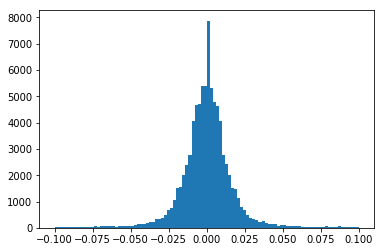

In [120]:
plt.hist(nparray_error_y, bins=100, range=(-0.1,0.1))

In [121]:
nparray_error_z=df_hits["z"]-df_hits["tz"]
nparray_error_z

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
95194    0.0
95195    0.0
95196    0.0
95197    0.0
95198    0.0
95199    0.0
95200    0.0
95201    0.0
95202    0.0
95203    0.0
95204    0.0
95205    0.0
95206    0.0
95207    0.0
95208    0.0
95209    0.0
95210    0.0
95211    0.0
95212    0.0
95213    0.0
95214    0.0
95215    0.0
95216    0.0
95217    0.0
95218    0.0
95219    0.0
95220    0.0
95221    0.0
95222    0.0
95223    0.0
Length: 95224, dtype: float64

(array([1.2300e+02, 1.1000e+01, 1.5000e+01, 2.1000e+01, 1.2600e+02,
        5.7000e+01, 2.2000e+01, 1.3000e+01, 1.8000e+01, 1.0900e+02,
        1.1200e+02, 2.2000e+01, 2.0000e+01, 2.7000e+01, 2.1000e+02,
        1.0300e+02, 3.5000e+01, 2.0000e+01, 3.9000e+01, 2.7500e+02,
        1.9100e+02, 5.0000e+01, 3.3000e+01, 4.1000e+01, 9.6000e+01,
        5.0800e+02, 5.0000e+01, 7.6000e+01, 7.0000e+01, 4.8400e+02,
        3.8300e+02, 8.7000e+01, 9.7000e+01, 1.1500e+02, 5.7300e+02,
        6.4100e+02, 1.5000e+02, 1.5500e+02, 1.3900e+02, 8.5100e+02,
        5.5800e+02, 1.3500e+02, 2.3000e+02, 1.8800e+02, 1.0040e+03,
        8.0200e+02, 1.9700e+02, 1.9000e+02, 2.3100e+02, 1.8900e+02,
        4.4596e+04, 2.3300e+02, 1.7300e+02, 2.0600e+02, 7.9900e+02,
        9.5100e+02, 1.6200e+02, 2.1200e+02, 1.3700e+02, 5.9000e+02,
        9.5900e+02, 1.7100e+02, 1.4000e+02, 1.4600e+02, 6.1800e+02,
        5.9300e+02, 9.5000e+01, 9.6000e+01, 8.7000e+01, 4.0000e+02,
        4.9700e+02, 6.0000e+01, 7.4000e+01, 5.20

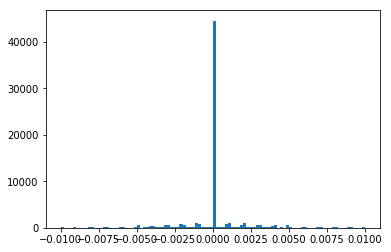

In [122]:
plt.hist(nparray_error_z, bins=100, range=(-0.01,0.01))

In [123]:
def get_list_inputValues(df_bucket,debug):
    list_inputValues=[]
    for i in range (df_bucket.shape[0]):
        hit=df_bucket.iloc[i]
        x=hit["x"]
        y=hit["y"]
        z=hit["z"]
        if debug:
            print "i", i, "x", x, "y", y, "z", z
        list_inputValues.append(x)
        list_inputValues.append(y)
        list_inputValues.append(z)
    return list_inputValues
        

In [124]:
from collections import Counter

In [125]:
def get_particle_id_most_common(df_bucket,debug):
    counter=Counter(df_bucket.particle_id.values)
    list_tuple_most_common=counter.most_common()
    tuple_most_common=list_tuple_most_common[0]
    particle_id_most_common=tuple_most_common[0]
    if debug:
        print "particle_id_most_common",particle_id_most_common
    return particle_id_most_common

In [126]:
def get_list_outputValues(df_bucket,debug):
    list_outputValues=[]
    particle_id_most_common=get_particle_id_most_common(df_bucket,debug)
    for i in range (df_bucket.shape[0]):
        hit=df_bucket.iloc[i]
        particle_id=hit["particle_id"]
        if particle_id==particle_id_most_common:
            output=1
        else:
            output=0
        if debug and False:
            print "i", i, "particle_id", particle_id, "particle_id_most_common", particle_id_most_common, "output", output
        list_outputValues.append(output)
    return list_outputValues


In [131]:
# 95220
nrHits=df_hits.shape[0]
#ca sa nu-l mai calculeze pe numaru ala mare imensu'
#nrHits=42
debug=False
print "nrHits", nrHits
# keep only complete Buckets
nrBuckets=(nrHits-nrHits%BUCKET_SIZE)/BUCKET_SIZE
print "nrBuckets", nrBuckets
# keep even nr of Buckets for equal size train and test
nrBuckets=nrBuckets-nrBuckets%2
print "nrBuckets", nrBuckets
counterBuckets=0
list_list_inputValues=[]
list_list_outputValues=[] 
for i in range (nrHits):
    isMultipleOfBucketSize=i%BUCKET_SIZE==0
    if isMultipleOfBucketSize==False:
        continue
    isCompleteBucket=i+BUCKET_SIZE<nrHits
    if isCompleteBucket==False:
        continue
    isNotLastOddBucket=counterBuckets<nrBuckets
    if isNotLastOddBucket==False:
        continue
    counterBuckets+=1
    print i, isMultipleOfBucketSize, counterBuckets
    df_bucket=df_hits[i:i+BUCKET_SIZE]
    #print "df_bucket", df_bucket
    list_inputValues=get_list_inputValues(df_bucket,debug)
    print "list_inputValues", list_inputValues
    list_outputValues=get_list_outputValues(df_bucket,debug)
    print "list_outputValues", list_outputValues
    list_list_inputValues.append(list_inputValues)
    list_list_outputValues.append(list_outputValues)
# done for loop

print "counterBuckets", counterBuckets
print "length_input", len(list_list_inputValues)
print "length_output", len(list_list_outputValues)

nparray_input=np.array(list_list_inputValues)
print "nparray_input", nparray_input.shape, nparray_input.dtype
print nparray_input
nparray_output=np.array(list_list_outputValues)
print "nparray_output", nparray_output.shape, nparray_output.dtype
print nparray_output
# acum trebuie sa-l salvez pe numpy array intr-un fisier 

np.save(fileNameNNInput,nparray_input)
np.save(fileNameNNOutput,nparray_output)

nrHits 95224
nrBuckets 4761
nrBuckets 4760
0 True 1
list_inputValues [-96.0251, -11.0431, -1502.5, -57.1466, -5.4254, -1502.5, -83.1498, -9.27745, -1502.5, -70.7627, -11.2617, -1502.5, -73.3473, 0.07045760000000001, -1502.5, -83.47399999999999, 1.1291799999999999, -1502.5, -58.1014, -5.1494599999999995, -1502.5, -59.7223, 2.59725, -1502.5, -83.0065, -14.1312, -1502.5, -66.613, -10.9351, -1502.5, -78.6731, -8.37343, -1502.5, -31.0244, -5.73315, -1502.5, -72.9722, -12.7396, -1502.5, -153.12, -5.20216, -1502.0, -175.399, -4.68051, -1502.0, -154.075, -10.0018, -1502.0, -108.992, -8.31748, -1502.0, -169.722, -10.7248, -1502.0, -107.939, 0.590619, -1502.0, -108.70200000000001, -8.32268, -1498.0]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0]
20 True 2
list_inputValues [-152.855, -26.2446, -1498.0, -115.10799999999999, -21.0295, -1498.0, -173.122, -22.2564, -1498.0, -167.92700000000002, -30.8275, -1498.0, -155.446, -17.2664, -1498.0, -127.429, -24.3132, -1498.0

list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
380 True 20
list_inputValues [33.6531, -91.5023, -1502.5, 34.1902, -79.2107, -1502.5, 24.7027, -73.2913, -1502.5, 27.0818, -57.0847, -1502.5, 26.1658, -66.1097, -1502.5, 32.0543, -69.0893, -1502.5, 35.1308, -93.7633, -1502.5, 27.6504, -107.59299999999999, -1502.0, 36.4554, -115.76899999999999, -1502.0, 53.8289, -155.805, -1502.0, 39.5639, -98.7689, -1502.0, 51.276, -151.65, -1502.0, 44.3027, -104.978, -1498.0, 47.3678, -97.9319, -1498.0, 45.852, -102.427, -1498.0, 65.7274, -147.806, -1498.0, 39.4295, -98.5214, -1498.0, 45.9975, -102.751, -1498.0, 66.8247, -144.102, -1498.0, 61.7186, -148.878, -1498.0]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
400 True 21
list_inputValues [49.4041, -111.58, -1498.0, 50.0659, -79.547, -1498.0, 41.9621, -53.3085, -1498.0, 35.7433, -50.7201, -1498.0, 36.6947, -44.9042, -1498.0, 34.6191, -66.7804, -1498.0, 31.3629, -59.9356, -1498.0, 25.5147, 

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
820 True 42
list_inputValues [36.117, 57.5501, -1502.0, 52.8267, 78.9804, -1502.0, 38.653, 55.4683, -1502.0, 42.9848, 73.9247, -1502.0, 41.0484, 77.6548, -1502.0, 71.66, 91.03, -1502.0, 67.9724, 102.988, -1502.0, 101.969, 134.916, -1502.0, 95.9715, 130.944, -1502.0, 81.3751, 110.805, -1502.0, 50.676, 95.6562, -1498.0, 44.409, 94.4745, -1498.0, 50.0978, 93.5905, -1498.0, 81.1729, 155.957, -1498.0, 71.5621, 140.158, -1498.0, 53.6164, 102.476, -1498.0, 63.9188, 111.805, -1498.0, 25.1535, 52.9518, -1497.5, 18.7581, 53.7134, -1497.5, 31.3773, 59.0929, -1497.5]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
840 True 43
list_inputValues [15.2383, 54.8845, -1497.5, 6.68354, 36.4525, -1497.5, 32.3633, 91.0016, -1497.5, 27.135, 85.4348, -1497.5, 16.633, 60.8647, -1497.5, 37.1673, 77.3827, -1497.5, 34.9351, 74.3456, -1497.5, 30.9904, 61.6864, -1497.5, 40.9143, 77.4136, -1497.5, 37.152, 7

list_inputValues [-85.0796, 37.7577, -1498.0, -63.4974, 23.9473, -1498.0, -57.681000000000004, 15.206, -1498.0, -51.5669, 20.4126, -1498.0, -50.8287, 21.4598, -1498.0, -59.7856, 22.031, -1498.0, -38.0704, 22.1283, -1498.0, -113.65899999999999, 57.6462, -1498.0, -139.043, 53.4953, -1498.0, -111.919, 56.7685, -1498.0, -132.921, 49.5351, -1498.0, -134.658, 61.3429, -1498.0, -113.91799999999999, 52.7318, -1498.0, -118.037, 57.8846, -1498.0, -118.242, 55.9006, -1498.0, -148.515, 62.7062, -1498.0, -154.30100000000002, 45.0077, -1502.0, -139.438, 46.5504, -1502.0, -111.07799999999999, 34.8301, -1502.0, -112.58, 30.2184, -1502.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1200 True 61
list_inputValues [-139.373, 53.6476, -1502.0, -154.832, 52.3474, -1502.0, -133.26, 49.7003, -1502.0, -157.709, 53.4124, -1502.0, -99.7084, 15.3763, -1502.0, -47.9996, 14.5832, -1502.0, -59.9428, 22.0784, -1502.0, -56.4462, 20.879, -1502.0, -59.7566, 15.2925, -1502.0, -81.0723, 

list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
1420 True 72
list_inputValues [-36.066, -51.8129, -1298.0, -31.8675, -35.4259, -1298.0, -41.4741, -54.2955, -1298.0, -49.2279, -58.9088, -1298.0, -47.1621, -46.4045, -1298.0, -33.3586, -35.6319, -1298.0, -51.7512, -54.3953, -1298.0, -30.9909, -38.1719, -1298.0, -29.9041, -43.9824, -1298.0, -61.5569, -59.4092, -1298.0, -33.2673, -49.6909, -1298.0, -40.3404, -39.8032, -1298.0, -40.5735, -54.4729, -1298.0, -60.6104, -69.4643, -1298.0, -43.3847, -50.2965, -1298.0, -42.6377, -50.2688, -1298.0, -49.707, -63.2422, -1298.0, -30.7142, -35.1534, -1298.0, -51.4833, -64.7831, -1298.0, -27.5577, -35.9999, -1298.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1440 True 73
list_inputValues [-41.4285, -56.7828, -1298.0, -118.491, -128.709, -1302.0, -93.0796, -83.074, -1302.0, -80.21300000000001, -71.6217, -1302.0, -76.3448, -85.0125, -1302.0, -81.8104, -76.7546, -1302.0, -117.63600000000001

list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
1860 True 94
list_inputValues [137.97, -70.696, -1302.0, 140.138, -73.2772, -1302.0, 147.965, -87.2523, -1302.0, 118.197, -60.2551, -1302.0, 111.646, -54.0308, -1302.0, 131.555, -64.7161, -1302.0, 92.8015, -55.4961, -1302.0, 114.34700000000001, -58.2822, -1302.0, 71.4991, -21.0921, -1298.0, 53.2861, -15.821, -1298.0, 94.4291, -35.4066, -1298.0, 68.0042, -22.621, -1298.0, 44.75899999999999, -17.5927, -1298.0, 50.3536, -25.1055, -1298.0, 62.1447, -29.1237, -1298.0, 50.3683, -17.4266, -1298.0, 51.2623, -28.3503, -1298.0, 79.205, -28.5053, -1298.0, 89.5734, -29.9317, -1298.0, 38.7201, -22.5057, -1298.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1880 True 95
list_inputValues [46.2105, -26.5825, -1298.0, 90.9082, -42.8779, -1298.0, 41.9893, -23.5351, -1298.0, 54.2081, -21.0196, -1298.0, 88.2303, -37.0603, -1298.0, 46.0455, -10.2241, -1298.0, 94.9569, -34.0016, -1298.0, 32.4638,

list_inputValues [26.6992, 67.9199, -1297.5, 38.7943, 80.7881, -1297.5, 26.1992, 79.1252, -1297.5, 13.1271, 46.9131, -1297.5, 18.5828, 53.4207, -1297.5, 18.401, 46.7105, -1297.5, 21.6253, 52.403999999999996, -1297.5, 9.59673, 44.6615, -1297.5, 29.8246, 64.2289, -1297.5, 26.8816, 45.2342, -1297.5, 21.7689, 45.5647, -1297.5, 33.8702, 70.7296, -1297.5, 29.0142, 82.245, -1297.5, 45.2908, 112.044, -1302.0, 46.4558, 101.932, -1302.0, 65.5655, 134.606, -1302.0, 62.1077, 143.19799999999998, -1302.0, 55.0122, 130.22299999999998, -1302.0, 69.0017, 156.088, -1302.0, 39.0767, 107.749, -1302.0]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
2300 True 116
list_inputValues [48.1078, 118.54700000000001, -1302.0, 58.2411, 142.487, -1302.0, 60.3217, 129.139, -1302.0, 39.982, 106.21, -1302.0, 39.801, 105.927, -1298.0, 45.1054, 111.684, -1298.0, 38.9787, 107.40700000000001, -1298.0, 47.974, 118.197, -1298.0, 58.7685, 160.316, -1298.0, 40.5964, 135.205, -1298.0, 31.5247, 100

list_inputValues [-50.3861, 65.654, -1302.0, -33.2417, 39.6524, -1302.0, -42.136, 51.0671, -1302.0, -75.1327, 87.9352, -1302.0, -114.656, 126.375, -1302.0, -74.8998, 93.0551, -1302.0, -79.1012, 106.25399999999999, -1302.0, -90.3938, 112.65299999999999, -1302.0, -106.34200000000001, 129.35399999999998, -1302.0, -61.7346, 84.1009, -1302.0, -87.2624, 109.039, -1302.0, -108.281, 125.584, -1302.0, -96.8803, 106.52, -1302.0, -67.423, 94.304, -1302.0, -93.6405, 109.83200000000001, -1302.0, -94.2374, 100.212, -1298.0, -83.6759, 78.8322, -1298.0, -84.4042, 76.2372, -1298.0, -93.45700000000001, 84.3638, -1298.0, -81.7845, 80.5471, -1298.0]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]
2540 True 128
list_inputValues [-75.6494, 71.8664, -1298.0, -114.242, 126.086, -1298.0, -107.889, 108.15799999999999, -1298.0, -83.8856, 76.567, -1298.0, -76.7976, 72.3782, -1298.0, -70.7889, 58.7827, -1297.5, -58.8125, 39.2168, -1297.5, -42.9567, 30.671999999999997, -1297.5, -60.20

list_inputValues [-25.2487, -29.9089, -1098.0, -25.404, -37.1736, -1098.0, -28.1327, -42.8322, -1098.0, -42.7236, -55.3736, -1098.0, -34.674, -48.4894, -1098.0, -23.8332, -39.107, -1098.0, -57.119, -72.7674, -1098.0, -51.8696, -57.8444, -1098.0, -65.1253, -71.7481, -1098.0, -26.5, -42.2294, -1098.0, -35.3621, -45.8305, -1098.0, -34.8197, -33.5702, -1098.0, -65.0299, -65.9393, -1098.0, -52.0898, -50.4035, -1098.0, -37.2623, -42.3582, -1098.0, -36.2596, -42.0311, -1098.0, -25.5211, -40.6983, -1098.0, -27.0834, -29.7474, -1098.0, -42.1671, -41.865, -1098.0, -23.451999999999998, -30.0379, -1098.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2960 True 149
list_inputValues [-41.1876, -49.8798, -1098.0, -41.7372, -54.2187, -1098.0, -28.3463, -30.1482, -1098.0, -29.1119, -27.3492, -1098.0, -114.083, -113.977, -1102.0, -102.626, -106.197, -1102.0, -80.4944, -69.7817, -1102.0, -102.419, -107.82799999999999, -1102.0, -114.87299999999999, -113.40100000000001, -11

list_inputValues [91.34, -123.18799999999999, -1098.0, 58.7929, -91.0028, -1098.0, 36.6583, -38.8795, -1102.0, 45.8779, -56.5262, -1102.0, 34.3611, -38.6534, -1102.0, 22.0526, -36.7911, -1102.0, 27.4712, -32.819, -1102.0, 40.2338, -39.5244, -1102.0, 25.2035, -37.8627, -1102.0, 36.3652, -32.9161, -1102.0, 32.0554, -33.4901, -1102.0, 42.9675, -60.0475, -1102.0, 37.7689, -31.8651, -1102.0, 34.2667, -38.8509, -1102.0, 32.1264, -39.3474, -1102.0, 59.6546, -68.6532, -1102.0, 28.7756, -31.5748, -1102.0, 40.586, -48.1745, -1102.0, 51.5425, -64.9294, -1102.0, 33.606, -30.6863, -1102.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
3380 True 170
list_inputValues [34.6004, -29.5411, -1102.0, 33.8889, -44.7216, -1102.0, 37.7403, -46.5363, -1102.0, 47.6432, -65.984, -1102.0, 38.1357, -56.7769, -1102.0, 25.4308, -35.8192, -1102.0, 23.5631, -30.090999999999998, -1102.0, 37.3665, -37.0911, -1102.0, 36.5989, -45.6619, -1102.0, 33.9438, -34.3924, -1102.0, 35.8825, -45.97

list_inputValues [82.5815, 58.7865, -1097.5, 40.4301, 24.5704, -1097.5, 54.656000000000006, 28.8899, -1097.5, 43.8683, 20.8718, -1097.5, 53.6364, 36.4749, -1097.5, 38.3789, 17.4493, -1097.5, 79.4919, 51.6154, -1097.5, 71.0911, 49.2236, -1097.5, 51.6458, 31.3261, -1097.5, 97.7421, 58.851000000000006, -1098.0, 129.832, 69.9316, -1098.0, 137.442, 84.9967, -1098.0, 139.334, 72.8294, -1098.0, 125.036, 74.8814, -1098.0, 95.5278, 54.7253, -1098.0, 103.762, 49.0671, -1098.0, 154.46, 79.6523, -1098.0, 112.531, 86.3887, -1102.0, 93.4442, 63.7987, -1102.0, 92.0989, 68.9377, -1102.0]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
3820 True 192
list_inputValues [137.971, 85.2696, -1102.0, 100.945, 61.3052, -1102.0, 98.1513, 59.3261, -1102.0, 42.9, 38.6456, -1102.5, 77.5893, 60.7112, -1102.5, 28.3923, 29.0165, -1102.5, 45.2182, 38.7844, -1102.5, 35.4039, 35.005, -1102.5, 44.846000000000004, 36.4281, -1102.5, 71.5745, 65.9633, -1102.5, 53.8631, 36.6335, -1102.5, 36.006

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4280 True 215
list_inputValues [-39.961999999999996, 47.5978, -1102.0, -52.3458, 51.935, -1102.0, -89.5716, 111.898, -1102.0, -65.7634, 90.5836, -1102.0, -66.6043, 81.7069, -1102.0, -77.7077, 95.1843, -1102.0, -93.8734, 115.435, -1102.0, -73.5327, 92.5827, -1102.0, -79.2424, 90.4581, -1102.0, -91.8384, 107.427, -1102.0, -95.3252, 109.82600000000001, -1102.0, -78.9348, 90.0717, -1098.0, -82.1468, 83.5257, -1098.0, -29.896, 36.3502, -1097.5, -35.8264, 26.0287, -1097.5, -49.3287, 33.0237, -1097.5, -53.1405, 36.9368, -1097.5, -60.1713, 49.3199, -1097.5, -71.5663, 57.8028, -1097.5, -42.8258, 25.6286, -1097.5]
list_outputValues [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4300 True 216
list_inputValues [-72.3816, 63.4307, -1097.5, -36.6378, 34.0862, -1097.5, -43.5841, 33.575, -1097.5, -62.4128, 62.544, -1097.5, -28.1533, 33.0206, -1097.5, -50.0676, 43.9125, -1097.5, -64.1678, 60.2292, -1097.5, -55.

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4720 True 237
list_inputValues [-144.83, -79.6109, -958.0, -110.475, -61.2194, -958.0, -82.4107, -66.1193, -962.0, -135.30700000000002, -99.3238, -962.0, -114.695, -79.5682, -962.0, -87.33200000000001, -69.9148, -962.0, -133.10299999999998, -97.5717, -962.0, -71.446, -60.6292, -962.5, -34.5853, -26.8756, -962.5, -47.1115, -43.6891, -962.5, -29.6111, -24.7313, -962.5, -24.9467, -26.4682, -962.5, -23.7459, -25.9687, -962.5, -31.6091, -19.5336, -962.5, -57.507, -50.7923, -962.5, -36.1874, -23.1808, -962.5, -46.4298, -30.4164, -962.5, -31.9983, -24.5346, -962.5, -35.5434, -21.2499, -962.5, -39.9434, -24.1531, -962.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4740 True 238
list_inputValues [-31.8405, -36.4986, -962.5, -60.7248, -50.7789, -962.5, -21.7024, -26.195999999999998, -962.5, -35.8204, -34.1772, -962.5, -28.3815, -18.2893, -962.5, -49.5715, -37.0448, -962.5, -33.0795, 

list_inputValues [21.3321, -65.6765, -962.5, 23.5071, -50.9371, -962.5, 42.1344, -87.8066, -962.5, 22.1381, -43.0589, -962.5, 14.6443, -48.3548, -962.5, 27.0848, -45.3327, -962.5, 19.8049, -29.7175, -962.5, 17.4901, -35.4253, -962.5, 22.3283, -62.4632, -962.5, 20.9713, -39.066, -962.5, 21.9546, -60.777, -962.5, 13.0482, -38.23, -962.5, 7.474289999999999, -34.7032, -962.5, 24.5993, -79.2155, -962.5, 17.2401, -47.8275, -962.5, 31.4434, -63.3027, -962.5, 31.7611, -64.4618, -962.5, 23.9406, -58.3858, -962.5, 21.6813, -33.2022, -962.5, 16.9076, -35.7883, -962.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5180 True 260
list_inputValues [15.4198, -33.6335, -962.5, 17.2123, -42.4035, -962.5, 20.2836, -41.8482, -962.5, 33.5231, -68.8462, -962.5, 13.0017, -39.2936, -962.5, 24.5044, -57.787, -962.5, 11.4233, -49.2019, -962.5, 29.2935, -49.2277, -962.5, 44.9193, -151.249, -962.0, 30.3299, -115.39, -962.0, 53.6278, -150.224, -962.0, 27.8987, -102.4, -962.0, 53.41

list_inputValues [41.4585, 8.2307, -958.0, 51.8366, 4.03757, -958.0, 36.3543, 6.13365, -958.0, 46.9837, 15.7791, -958.0, 92.5887, 18.1406, -958.0, 39.7443, 12.9612, -958.0, 42.9756, 5.766780000000001, -958.0, 53.5101, 5.98198, -958.0, 70.3322, 13.2601, -958.0, 73.0321, 19.4103, -958.0, 51.9837, 6.79818, -958.0, 32.4024, 14.3867, -958.0, 37.1742, 1.0830600000000001, -958.0, 56.0483, 13.4817, -958.0, 40.0227, 9.48005, -958.0, 33.6064, 15.3956, -958.0, 34.7944, 6.37371, -958.0, 47.5776, 8.46567, -958.0, 59.0134, 17.3817, -958.0, 50.5134, 17.5007, -958.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5620 True 282
list_inputValues [73.7364, 23.8987, -958.0, 69.368, 13.9028, -958.0, 108.92200000000001, 29.7529, -962.0, 118.302, 30.3155, -962.0, 103.594, 15.7615, -962.0, 103.772, 25.9353, -962.0, 149.898, 33.2269, -962.0, 136.158, 39.2685, -962.0, 103.40299999999999, 30.8178, -962.0, 148.627, 26.6155, -962.0, 140.155, 26.3638, -962.0, 71.9819, 27.5699, -962.0

list_inputValues [5.60911, 55.6573, -958.0, -4.42205, 37.1732, -958.0, -0.654004, 40.4416, -958.0, -0.541916, 84.5632, -958.0, 1.98052, 56.7101, -958.0, -5.20685, 38.0352, -958.0, -3.16059, 47.4662, -958.0, 0.516365, 45.1162, -958.0, 4.02117, 73.0798, -958.0, 5.55593, 49.2461, -958.0, -1.87627, 42.1177, -958.0, 3.5389, 90.5311, -958.0, 1.1734, 48.3664, -958.0, 5.29114, 46.5189, -958.0, 8.2486, 70.2191, -958.0, 6.85998, 52.4328, -958.0, -0.556192, 71.6363, -958.0, 7.583760000000001, 61.6293, -958.0, 2.08046, 63.0781, -958.0, -3.07735, 43.4256, -958.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6060 True 304
list_inputValues [4.41178, 37.8947, -958.0, 9.419030000000001, 33.3294, -958.0, 24.0185, 119.163, -958.0, 9.44656, 106.625, -958.0, 20.125, 102.471, -958.0, 18.9413, 129.09, -958.0, 24.0975, 129.863, -958.0, 18.9806, 126.839, -958.0, 14.7287, 150.688, -958.0, 26.0462, 139.128, -958.0, -0.884806, 136.221, -962.0, 3.21592, 115.571, -962.0, 12.2688, 1

list_inputValues [-113.669, 54.6991, -958.0, -136.782, 65.4343, -958.0, -116.87799999999999, 53.6059, -958.0, -101.249, 37.8465, -958.0, -103.587, 40.7371, -958.0, -148.35, 59.7911, -958.0, -128.474, 60.3616, -958.0, -134.825, 50.2249, -962.0, -152.336, 56.5663, -962.0, -104.02, 40.9548, -962.0, -133.722, 37.1462, -962.0, -146.028, 54.1905, -962.0, -101.65299999999999, 37.9466, -962.0, -139.423, 42.4815, -962.0, -126.71600000000001, 39.016999999999996, -962.0, -157.941, 55.494, -962.0, -101.288, 28.9649, -962.0, -160.55, 52.8069, -962.0, -125.37700000000001, 36.9652, -962.0, -157.939, 61.0305, -962.0]
list_outputValues [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
6480 True 325
list_inputValues [-138.392, 48.0453, -962.0, -56.1924, 7.39725, -962.0, -31.9925, 14.6482, -962.0, -33.4196, 14.0139, -962.0, -99.4613, 19.9963, -962.0, -36.4172, 13.8079, -962.0, -39.379, 2.43512, -962.0, -50.4822, 5.10077, -962.0, -40.6564, 8.29526, -962.0, -43.0626, 2.75385, -962.0, -47.2826, 1

list_inputValues [-28.6476, -31.4854, -822.0, -19.1429, -27.8412, -822.0, -58.3831, -79.4352, -822.0, -19.0745, -24.476, -822.0, -32.9509, -48.0772, -822.0, -15.0205, -32.2146, -822.0, -15.0841, -29.7346, -822.0, -16.8505, -42.7606, -822.0, -38.8705, -58.7897, -822.0, -25.6251, -36.7924, -822.0, -31.0983, -42.0876, -822.0, -21.6333, -34.2976, -822.0, -36.7559, -69.6932, -822.0, -36.2969, -43.2982, -822.0, -34.2764, -50.4316, -822.0, -27.2181, -30.8752, -822.0, -26.7663, -34.2528, -822.0, -18.4156, -43.5922, -822.0, -12.375, -29.8115, -822.0, -12.2772, -34.8193, -822.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6920 True 347
list_inputValues [-29.7458, -52.4163, -822.0, -34.8909, -65.7885, -822.0, -30.2525, -37.2622, -822.0, -21.403000000000002, -22.6298, -822.0, -21.1805, -33.0802, -822.0, -26.1354, -50.4481, -822.0, -28.8739, -45.0606, -822.0, -18.1504, -29.5709, -822.0, -34.7202, -51.3471, -822.0, -83.6341, -132.13299999999998, -822.0, -67.589, -8

list_inputValues [66.4157, -159.401, -818.0, 62.5249, -136.84, -818.0, 43.9668, -105.88600000000001, -818.0, 56.3836, -147.812, -818.0, 43.98, -94.7155, -818.0, 25.5412, -29.0001, -818.0, 34.3707, -57.7626, -818.0, 33.6236, -42.1893, -818.0, 27.5276, -54.3469, -818.0, 16.9679, -34.5836, -818.0, 30.7271, -45.0199, -818.0, 24.3023, -27.6482, -818.0, 27.7497, -29.6918, -818.0, 24.5498, -42.4061, -818.0, 15.7255, -26.5708, -818.0, 14.5308, -30.6499, -818.0, 26.3617, -54.3581, -818.0, 17.9553, -35.7598, -818.0, 20.7383, -24.2246, -818.0, 14.7479, -36.076, -818.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7340 True 368
list_inputValues [31.239, -54.7573, -818.0, 40.3858, -74.6597, -818.0, 51.9746, -68.8818, -818.0, 25.2434, -25.3562, -818.0, 22.2024, -41.7335, -818.0, 13.4453, -28.4958, -818.0, 37.9999, -49.1394, -818.0, 21.5015, -22.5035, -818.0, 37.1402, -48.2149, -818.0, 47.2384, -67.3731, -818.0, 25.1779, -54.6273, -818.0, 28.2583, -34.0081, -818.0, 2

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7800 True 391
list_inputValues [58.5613, 15.062000000000001, -818.0, 34.5541, 9.76121, -818.0, 68.61399999999999, 9.239460000000001, -818.0, 88.3278, 25.1907, -818.0, 33.2554, 14.7972, -818.0, 52.3257, 12.2795, -818.0, 37.7347, 3.5315800000000004, -818.0, 63.1174, 21.1437, -818.0, 45.2958, 10.0775, -818.0, 79.6219, 15.0276, -818.0, 39.6192, 7.45825, -818.0, 59.2222, 11.8269, -818.0, 48.0233, 11.2466, -818.0, 40.5844, 13.3172, -818.0, 36.4948, 0.35433899999999996, -818.0, 60.077, 11.158, -818.0, 60.0146, 7.080769999999999, -818.0, 58.3712, 20.6727, -818.0, 50.6477, 15.0133, -818.0, 31.7834, 3.18263, -818.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7820 True 392
list_inputValues [87.8191, 27.434, -818.0, 31.5431, 15.0744, -818.0, 87.5227, 14.0448, -818.0, 37.1004, 5.1790199999999995, -818.0, 132.974, 36.8997, -822.0, 118.491, 20.6331, -822.0, 167.208, 36.9899, -822.0, 155.

list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
8260 True 414
list_inputValues [9.59191, 33.2064, -822.5, 13.8274, 29.6443, -822.5, 17.5672, 58.7152, -822.5, 4.76468, 48.6539, -822.5, 11.020999999999999, 29.7349, -822.5, 21.3351, 80.4067, -822.5, 12.9226, 43.2244, -822.5, 4.47427, 40.1621, -822.5, 22.5161, 89.8237, -822.5, 8.601, 41.2874, -822.5, 3.60892, 42.1264, -822.5, 12.3824, 35.8339, -822.5, 3.5467199999999997, 32.6574, -822.5, 40.5459, 161.362, -822.0, 30.7698, 155.175, -822.0, 38.7389, 165.035, -822.0, 37.7489, 145.757, -822.0, 34.5854, 126.62899999999999, -822.0, 33.953, 151.457, -822.0, 20.3639, 118.35700000000001, -822.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8280 True 415
list_inputValues [21.8331, 110.191, -822.0, 43.4858, 159.012, -822.0, 20.8644, 102.359, -822.0, 11.6761, 41.6153, -818.0, 10.5842, 37.3002, -818.0, 6.10457, 60.6781, -818.0, 8.573319999999999, 41.0646, -818.0, 0.9810110000000001, 41.46

list_inputValues [-30.8245, 15.4588, -822.5, -108.92399999999999, 71.0083, -818.0, -87.8978, 65.8781, -818.0, -106.809, 76.6509, -818.0, -108.634, 83.3995, -818.0, -106.509, 82.7482, -818.0, -120.59100000000001, 89.4248, -818.0, -130.687, 88.8259, -818.0, -102.155, 70.5536, -818.0, -84.0827, 64.0525, -818.0, -91.9822, 61.7111, -818.0, -104.23100000000001, 76.218, -818.0, -84.3355, 61.3166, -818.0, -97.6166, 58.8992, -818.0, -134.435, 101.63600000000001, -818.0, -98.7597, 46.9676, -822.0, -142.91299999999998, 71.6889, -822.0, -135.609, 77.5767, -822.0, -98.1116, 59.1406, -822.0, -109.38600000000001, 59.181999999999995, -822.0]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
8720 True 437
list_inputValues [-98.3619, 46.5171, -822.0, -102.01299999999999, 55.5212, -822.0, -128.46, 63.0651, -822.0, -31.8864, 20.5951, -818.0, -61.4737, 24.5702, -818.0, -26.0608, 19.3727, -818.0, -33.8809, 11.5174, -818.0, -53.3784, 16.5087, -818.0, -80.2687, 27.7011, -818.0, -3

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9160 True 459
list_inputValues [-27.8288, -26.0778, -698.0, -26.0637, -35.9444, -698.0, -24.6023, -26.6884, -698.0, -68.8713, -72.6696, -698.0, -23.0581, -25.9582, -698.0, -17.0664, -26.9497, -698.0, -31.7764, -28.6982, -698.0, -33.7936, -49.5373, -698.0, -29.3956, -42.6941, -698.0, -33.515, -31.5037, -698.0, -50.9454, -66.7709, -698.0, -42.7196, -46.1303, -698.0, -19.0056, -24.2929, -698.0, -33.6982, -41.5727, -698.0, -17.0725, -25.648000000000003, -698.0, -22.872, -29.1278, -698.0, -23.0268, -21.3023, -698.0, -29.5305, -26.2995, -698.0, -18.2733, -24.9923, -698.0, -27.9054, -40.9493, -698.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9180 True 460
list_inputValues [-18.1342, -28.6618, -698.0, -26.5823, -24.8493, -698.0, -47.6344, -58.4288, -698.0, -29.9861, -43.6164, -698.0, -21.63, -31.4461, -698.0, -58.325, -75.4112, -698.0, -30.0604, -36.0816, -698.0, -25.6236, -27.96

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9580 True 480
list_inputValues [0.611708, -36.9243, -697.5, 18.7719, -87.0793, -697.5, 6.32775, -35.0314, -697.5, 15.1639, -49.7757, -697.5, 15.7133, -79.6248, -697.5, 14.901, -44.3971, -697.5, 31.8559, -167.0, -698.0, 25.4064, -115.119, -698.0, 41.6269, -162.246, -698.0, 27.6921, -130.515, -698.0, 28.393, -113.185, -698.0, 35.8618, -125.06700000000001, -698.0, 28.5242, -136.019, -698.0, 32.7706, -143.154, -698.0, 28.6057, -105.68700000000001, -698.0, 23.6154, -121.044, -698.0, 30.7633, -106.884, -698.0, 35.4434, -150.639, -698.0, 36.621, -127.20299999999999, -698.0, 36.6188, -150.125, -698.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9600 True 481
list_inputValues [38.6895, -81.3189, -702.5, 14.2955, -28.829, -702.5, 33.7896, -65.5699, -702.5, 30.1555, -67.3796, -702.5, 15.5183, -31.1277, -702.5, 31.4139, -61.6636, -702.5, 30.3932, -66.1243, -702.5, 23.9284, -46.3357, -7

list_inputValues [79.4303, -17.2955, -702.0, 66.6439, -16.334, -702.0, 36.7375, -1.3896, -702.0, 77.1328, -13.6073, -702.0, 144.781, -36.7928, -698.0, 166.92, -33.0954, -698.0, 109.35799999999999, -19.5608, -698.0, 114.762, -34.1058, -698.0, 139.173, -25.4651, -698.0, 33.9831, -7.5646, -697.5, 84.1802, 0.020356799999999998, -697.5, 58.4687, -4.72698, -697.5, 87.9286, -1.67897, -697.5, 39.1621, 4.56645, -697.5, 65.6525, -1.63107, -697.5, 30.7544, 0.16253599999999999, -697.5, 43.7993, -7.58483, -697.5, 36.3095, -2.38115, -697.5, 93.0882, -9.55808, -697.5, 44.3921, -10.0891, -697.5]
list_outputValues [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10020 True 502
list_inputValues [98.3991, -8.62188, -697.5, 52.1764, 3.34159, -697.5, 36.6149, -5.869730000000001, -697.5, 32.5443, 2.83033, -697.5, 33.8177, -6.79926, -697.5, 46.2027, 4.313269999999999, -697.5, 32.8639, -8.88085, -697.5, 37.3696, 3.20289, -697.5, 76.6749, -13.5326, -697.5, 56.6141, -9.64663, -697.5, 38.5184, -3.708

list_inputValues [19.0182, 34.9105, -702.0, 19.4574, 27.7804, -702.0, 22.2528, 39.3276, -702.0, 16.4558, 37.1405, -702.0, 28.2223, 38.6383, -702.0, 17.2836, 36.8645, -702.0, 33.0769, 50.7708, -702.0, 31.5558, 67.1403, -702.0, 25.4567, 42.641999999999996, -702.0, 20.8679, 40.7041, -702.0, 23.1582, 35.7333, -702.0, 11.6797, 30.3035, -702.0, 19.1061, 36.9678, -702.0, 16.0495, 40.6881, -702.0, 15.0305, 33.8577, -702.0, 21.456, 31.0417, -702.0, 30.06, 54.2688, -702.0, 18.4288, 26.1017, -702.0, 14.7169, 28.1785, -702.0, 72.5575, 103.665, -702.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10460 True 524
list_inputValues [82.3709, 127.49799999999999, -702.0, 82.0058, 106.23100000000001, -702.0, 96.9334, 143.761, -702.0, 70.9503, 91.6749, -702.0, 74.6739, 97.9069, -702.0, 66.6165, 100.477, -702.0, 76.3726, 117.462, -702.0, 57.9821, 105.634, -698.0, 63.1074, 110.37100000000001, -698.0, 60.448, 112.22, -698.0, 61.4708, 108.152, -698.0, 46.9042, 99.9816, -698.0,

list_inputValues [-56.5084, 98.6263, -702.0, -49.6643, 102.676, -702.0, -89.0943, 144.546, -702.0, -60.5438, 92.3079, -702.0, -75.1093, 142.81, -702.0, -62.7386, 122.039, -702.0, -69.9473, 121.007, -702.0, -75.1304, 118.18799999999999, -702.0, -91.6426, 133.295, -698.0, -64.5461, 87.8997, -698.0, -84.7363, 122.97, -698.0, -84.0858, 126.59899999999999, -698.0, -58.0989, 91.1373, -698.0, -60.2253, 91.7667, -698.0, -88.0962, 139.44, -698.0, -83.5995, 108.10600000000001, -698.0, -28.0971, 23.8514, -702.0, -41.0926, 37.6813, -702.0, -22.494, 27.4534, -702.0, -21.5549, 37.1323, -702.0]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
10880 True 545
list_inputValues [-27.3569, 25.3713, -702.0, -35.8073, 40.1928, -702.0, -58.6088, 74.2807, -702.0, -23.0414, 33.7914, -702.0, -43.2385, 46.3529, -702.0, -42.9971, 44.3766, -702.0, -41.0016, 53.2034, -702.0, -24.7881, 38.0693, -702.0, -32.303000000000004, 30.5465, -702.0, -27.2997, 33.9271, -702.0, -17.8141, 32.0595, -

list_inputValues [-157.40200000000002, -28.3429, -598.0, -34.1354, -12.5917, -598.0, -52.5337, -17.0601, -598.0, -81.4008, -25.9959, -598.0, -31.2684, -13.085999999999999, -598.0, -30.7358, -5.66271, -598.0, -72.3468, -10.2472, -598.0, -60.4295, -11.3969, -598.0, -52.5505, -7.08853, -598.0, -47.4274, -16.3998, -598.0, -69.0277, -9.29606, -598.0, -56.757, -22.0334, -598.0, -79.0211, -11.2839, -598.0, -58.5738, -10.0772, -598.0, -100.697, -16.2782, -598.0, -59.3804, -13.8189, -598.0, -65.15899999999999, -13.7808, -598.0, -50.8289, -20.7645, -598.0, -36.4269, -5.09322, -598.0, -54.8859, -11.0944, -598.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11320 True 567
list_inputValues [-31.3064, -3.5308800000000002, -598.0, -34.1921, -15.9476, -598.0, -43.1968, -12.556, -598.0, -98.3682, -21.0194, -598.0, -87.3325, -20.6033, -598.0, -42.0507, -1.58535, -598.0, -39.2787, -16.3461, -598.0, -58.9799, -22.1557, -598.0, -32.1595, -5.27833, -598.0, -30.5403, -7.2035

list_inputValues [-17.1448, -60.81100000000001, -602.5, -8.89563, -32.448, -602.5, -7.11291, -47.5117, -602.5, -13.9621, -83.9654, -602.5, -15.3007, -44.5625, -602.5, -13.0801, -84.7892, -602.5, -11.8141, -58.9548, -602.5, -12.4842, -31.76, -602.5, -17.6493, -37.8534, -602.5, -13.8451, -51.1363, -602.5, -1.71337, -35.9195, -602.5, -16.3995, -51.067, -602.5, -13.9505, -31.8708, -602.5, -24.0419, -70.9056, -602.5, -13.8349, -32.2456, -602.5, -7.13125, -39.2349, -602.5, -22.2796, -66.992, -602.5, -36.9392, -155.418, -602.0, -29.4118, -103.322, -602.0, -18.2804, -111.464, -602.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11740 True 588
list_inputValues [-36.1912, -137.387, -602.0, 0.35649200000000003, -40.3982, -598.0, -0.134435, -44.7242, -598.0, -11.6452, -62.8896, -598.0, -5.25724, -83.101, -598.0, 4.25641, -45.0133, -598.0, 0.566059, -87.4428, -598.0, -9.00019, -73.25399999999999, -598.0, -4.49831, -31.3468, -598.0, -12.2928, -95.3346, -598.0, -2.93

list_inputValues [108.95299999999999, -121.64200000000001, -602.0, 80.9919, -96.7914, -602.0, 76.4187, -82.7473, -598.0, 112.291, -103.77, -598.0, 95.5491, -97.8472, -598.0, 94.0191, -88.6098, -598.0, 109.236, -106.395, -598.0, 91.4285, -95.2822, -598.0, 100.459, -92.9992, -598.0, 92.6439, -93.6432, -598.0, 102.074, -105.85700000000001, -598.0, 92.6392, -95.7152, -598.0, 30.0667, -16.8354, -597.5, 34.7094, -19.2225, -597.5, 55.0816, -50.3647, -597.5, 29.7663, -15.6583, -597.5, 20.8864, -22.4744, -597.5, 32.3822, -35.7777, -597.5, 20.66, -24.3851, -597.5, 33.0933, -28.9547, -597.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
12160 True 609
list_inputValues [31.7406, -24.5117, -597.5, 32.239000000000004, -23.8196, -597.5, 63.317, -53.3216, -597.5, 67.7949, -64.9709, -597.5, 59.6966, -42.339, -597.5, 55.3211, -40.7719, -597.5, 29.5451, -19.6119, -597.5, 25.5682, -21.4099, -597.5, 35.6368, -30.3381, -597.5, 22.5584, -21.4695, -597.5, 23.5876, -27.2801, -5

list_inputValues [102.822, 38.1038, -602.0, 62.1372, 46.6101, -597.5, 42.403, 19.3874, -597.5, 35.1028, 19.7811, -597.5, 28.063000000000002, 17.5195, -597.5, 63.9817, 48.2095, -597.5, 46.5124, 32.813, -597.5, 49.4313, 30.8486, -597.5, 33.251, 13.5445, -597.5, 63.0746, 45.0599, -597.5, 50.3091, 33.0872, -597.5, 43.9752, 24.573, -597.5, 28.6838, 21.5358, -597.5, 73.7512, 44.4031, -597.5, 29.0492, 20.2936, -597.5, 26.8111, 21.6783, -597.5, 31.2834, 10.4036, -597.5, 39.8135, 25.6585, -597.5, 50.9206, 35.6316, -597.5, 23.6427, 20.2058, -597.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
12620 True 632
list_inputValues [49.757, 31.1069, -597.5, 35.2923, 16.0269, -597.5, 74.5807, 46.9639, -597.5, 69.2038, 34.7555, -597.5, 34.9847, 18.2427, -597.5, 28.4036, 14.5616, -597.5, 26.6289, 18.1068, -597.5, 39.1939, 31.7294, -597.5, 28.2533, 23.2071, -597.5, 30.8814, 15.9041, -597.5, 27.8958, 15.7165, -597.5, 30.1636, 10.8315, -597.5, 38.6592, 30.8739, -597.5, 30.384

list_outputValues [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
13060 True 654
list_inputValues [-12.7124, 126.78, -602.0, -16.052, 111.99700000000001, -602.0, -12.2139, 134.42600000000002, -602.0, -12.0888, 30.7558, -597.5, -4.5089999999999995, 36.4514, -597.5, -8.42572, 29.2056, -597.5, -15.7526, 81.9995, -597.5, -8.05433, 69.2102, -597.5, -15.302999999999999, 49.9266, -597.5, -27.9258, 90.9387, -597.5, -12.4992, 72.3032, -597.5, -13.8556, 42.8269, -597.5, -13.3166, 54.9322, -597.5, -12.5097, 28.2252, -597.5, -21.421, 64.7008, -597.5, -17.5378, 61.1629, -597.5, -15.3628, 45.6779, -597.5, -3.6135800000000002, 31.865, -597.5, -18.033, 49.5178, -597.5, -14.4168, 49.4026, -597.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
13080 True 655
list_inputValues [-12.2585, 37.8883, -597.5, -19.6262, 75.859, -597.5, -7.79942, 60.652, -597.5, -16.7888, 98.3096, -597.5, -16.6395, 84.8367, -597.5, -5.197080000000001, 49.5983, -597.5, -11.49, 45.8245,

list_inputValues [-77.3445, 17.1547, -602.0, -77.3929, 16.1379, -602.0, -63.6854, 22.8741, -602.0, -55.8286, 9.46958, -602.0, -88.3485, 28.1267, -602.0, -94.2564, 14.8387, -602.0, -71.5078, 13.1824, -602.0, -40.8704, 1.7647700000000002, -602.0, -33.8822, 13.765, -602.0, -61.1726, 20.4197, -602.0, -35.7519, 16.5792, -602.0, -39.0507, 5.64724, -602.0, -31.4821, 3.52166, -602.0, -39.4948, 13.5184, -602.0, -46.8538, 16.0565, -602.0, -76.1143, 15.470999999999998, -602.0, -44.2303, 15.9408, -602.0, -39.1129, 6.124969999999999, -602.0, -85.7158, 23.6381, -602.0, -29.1246, 9.48611, -602.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
13500 True 676
list_inputValues [-81.0111, 13.3557, -602.0, -63.7441, 15.2265, -602.0, -32.5427, 1.51376, -602.0, -50.9025, 6.43576, -602.0, -55.3495, 5.5494, -602.0, -49.6032, 4.5298099999999994, -602.0, -39.7657, 9.26409, -602.0, -44.8463, 9.31005, -602.0, -30.629, 1.7742099999999998, -602.0, -51.7819, 4.02444, -602.0, -55.5989,

list_inputValues [1.8814, -33.1723, -280.711, 12.8457, -29.3388, -335.18300000000005, 7.41965, -31.2359, -335.461, 13.0345, -29.2728, -339.36400000000003, 3.66817, -32.5476, -337.702, 18.3271, -26.4487, -302.60900000000004, 22.3123, -22.8892, -316.931, 19.449, -25.4466, -313.437, 13.9763, -30.3348, -318.36, 20.2048, -24.7715, -314.013, 16.0413, -28.4904, -332.49199999999996, 14.8397, -29.5636, -327.962, 13.4638, -30.7926, -283.166, 16.6923, -27.9089, -302.009, 15.1017, -29.3297, -331.145, 20.8579, -24.1882, -334.63300000000004, 25.3029, -21.0549, -317.191, 25.0538, -21.5719, -319.579, 28.5791, -14.255999999999998, -292.26599999999996, 27.1592, -17.2027, -287.404]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
13740 True 688
list_inputValues [24.015, -23.7274, -288.851, 23.9685, -23.824, -282.392, 28.3554, -14.7204, -288.202, 29.4817, -12.3831, -302.518, 27.265, -16.9831, -295.442, 23.7044, -24.3721, -328.575, 25.8766, -19.8643, -311.731, 28.6786, -14.049

list_inputValues [12.9369, -28.7824, -233.09799999999998, 0.746116, -33.0447, -262.086, 9.821860000000001, -29.8715, -243.058, 2.81986, -32.3197, -248.957, 1.867, -32.6528, -275.92400000000004, 12.6066, -28.8979, -267.42400000000004, 3.61323, -32.0423, -253.43599999999998, 5.06025, -31.5364, -263.83299999999997, 5.0096099999999995, -31.5541, -239.69400000000002, 22.371, -22.1728, -271.089, 15.05, -28.712, -238.485, 16.6542, -27.2791, -238.063, 22.1836, -22.3402, -228.53900000000002, 18.7529, -25.4045, -215.477, 21.6616, -22.8065, -213.75400000000002, 13.5156, -30.0825, -242.577, 14.8232, -28.9146, -239.268, 16.2343, -27.6542, -238.46200000000002, 15.095, -28.6718, -275.107, 18.4169, -25.7047, -210.29]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
13960 True 699
list_inputValues [21.9972, -22.5067, -219.00599999999997, 18.7156, -25.4378, -218.752, 13.2712, -30.3008, -280.607, 13.2522, -30.3178, -279.241, 14.4175, -29.2769, -260.118, 18.1563, -25.9375, -2

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
14180 True 710
list_inputValues [-30.8079, 12.08, -246.981, -31.4915, -0.039059500000000004, -253.601, -31.2923, 3.4924199999999996, -235.31, -31.5563, -1.18723, -219.21599999999998, -31.0514, 7.762739999999999, -210.41, -31.5563, -1.18723, -245.707, -31.4521, 0.659829, -253.118, -30.8093, 12.0557, -257.099, -31.4666, 0.40322399999999997, -239.493, -31.3226, 2.95618, -248.356, -31.1048, 6.817489999999999, -247.063, -30.6693, 14.5378, -225.753, -30.7521, 13.0703, -245.345, -32.0514, -5.08726, -200.52700000000002, -31.91, -5.4919, -166.64, -29.1903, -13.2705, -159.356, -29.7245, -11.7425, -141.829, -32.6729, -3.30991, -195.951, -29.3718, -12.7513, -143.35299999999998, -29.8542, -11.3716, -184.09]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
14200 True 711
list_inputValues [-31.1729, -7.600039999999999, -183.986, -30.2134, -10.3442, -147.61, -33.2468, -1.66825, -174.705, -33.43

list_inputValues [-15.3531, 29.1051, -174.52200000000002, -14.1906, 30.1435, -194.02700000000002, -18.2034, 26.5592, -209.19, -22.8343, 22.4228, -168.938, -21.1935, 23.8884, -153.951, -13.1476, 31.0751, -205.794, -23.430999999999997, 21.8899, -182.107, -18.3543, 26.4244, -205.09599999999998, -21.0444, 24.0216, -156.356, -16.0482, 28.4843, -160.106, -16.8306, 27.7854, -203.3, -23.5428, 21.79, -181.067, -23.8039, 21.5568, -195.553, -14.207, 30.1288, -149.209, -12.4848, 31.6671, -172.05599999999998, -22.2004, 22.9891, -173.805, -18.9188, 25.9202, -186.929, -20.6439, 24.3793, -154.327, -23.3937, 21.9232, -155.368, -23.9157, 21.4569, -187.84099999999998]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
14620 True 732
list_inputValues [-22.4422, 22.7731, -141.441, -27.3631, 16.7796, -170.10299999999998, -24.765, 22.1711, -192.375, -29.1213, 13.1309, -156.086, -30.0243, 11.257, -142.701, -25.9402, 19.7324, -159.03, -26.6139, 18.3343, -139.748, -26.1359, 19.3263, 

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15040 True 753
list_inputValues [14.7457, -28.9838, -102.64200000000001, 11.4067, -31.9662, -78.5328, 15.9481, -27.9098, -125.31299999999999, 14.6931, -29.0308, -101.71600000000001, 11.7584, -31.651999999999997, -91.6362, 23.6007, -21.0745, -100.846, 18.949, -25.2294, -83.8979, 22.1091, -22.4068, -97.7614, 11.7433, -31.6655, -86.802, 14.9976, -28.7588, -131.372, 16.0164, -27.8488, -121.935, 22.743000000000002, -21.8406, -94.6414, 22.2582, -22.2736, -97.5024, 21.6885, -22.7824, -77.8332, 20.0581, -24.2387, -82.3594, 23.4142, -21.241, -116.088, 17.2613, -26.7368, -69.7297, 20.5593, -23.7911, -113.087, 17.224, -26.7701, -113.935, 13.3672, -30.2151, -84.9193]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15060 True 754
list_inputValues [17.4153, -26.5993, -140.84799999999998, 15.3445, -28.449, -77.7133, 22.9667, -21.6407, -129.418, 22.5192, -22.0404, -84.40100000000001, 22.743000

list_inputValues [26.0656, 18.0128, -104.12200000000001, 22.973000000000003, 21.4751, -80.914, 22.3735, 22.1463, -101.544, 26.6384, 17.3716, -84.7706, 24.2983, 19.9914, -85.5361, 27.6468, 16.2426, -95.4804, 28.1524, 15.6765, -114.42200000000001, 25.6377, 18.4919, -131.119, 26.2451, 17.8119, -134.048, 28.7624, 14.9936, -85.5004, 24.8067, 19.4222, -72.3982, 29.115, 14.5989, -87.9752, 27.2554, 16.6808, -94.0667, 24.0405, 20.28, -96.3072, 20.0795, 25.2233, -77.1879, 10.8441, 29.6737, -114.023, 22.519000000000002, 24.0478, -117.52600000000001, 16.1031, 27.1395, -104.38, 12.8517, 28.7062, -113.556, 11.5648, 29.3264, -98.4611]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15280 True 765
list_inputValues [12.2404, 29.0008, -82.5888, 13.4566, 28.4148, -121.37200000000001, 12.4206, 28.914, -133.571, 11.1494, 29.5266, -115.42399999999999, 20.177, 25.1763, -88.4526, 14.4591, 27.9316, -119.09100000000001, 17.6005, 26.4179, -90.22200000000001, 21.7895, 24.3993, -92.7

list_inputValues [-31.5831, -6.42673, -45.1783, -33.6538, -0.5042439999999999, -30.8577, -32.9577, -2.49513, -10.0499, -34.2764, 1.27651, -9.53351, -30.691999999999997, -8.975439999999999, -61.49, -33.3865, -1.26868, -4.9234800000000005, -30.0426, -10.8327, -46.4573, -31.0843, -7.85349, -41.3073, -32.833, -2.85185, -0.563415, -29.8701, -11.3262, -47.9621, -32.7842, -2.99158, -6.90313, -32.8428, -2.82375, -6.88058, -33.3047, -1.50276, -36.0921, -33.9579, 0.365523, -13.4807, -32.78, -3.00336, -5.44062, -33.5321, -0.852417, -62.5822, -34.3261, 1.41858, -60.4947, -33.1284, -2.0070099999999997, -25.9669, -32.6472, -3.3832199999999997, -56.7402, -30.5876, -9.27387, -57.541000000000004]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15720 True 787
list_inputValues [-30.4775, -9.58902, -4.57909, -32.629, -3.4354199999999997, -24.1755, -31.522, -6.601439999999999, -33.4018, -29.9164, -11.1938, -59.7821, -28.8767, -14.1673, -57.6989, -32.2632, -4.4816400000000005,

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
16140 True 808
list_inputValues [19.6646, -25.254, -30.6969, 20.5223, -24.4879, -61.8099, 11.8529, -32.2315, -22.3719, 22.8716, -22.3895, -2.72507, 22.796999999999997, -22.4562, -1.0594, 23.5801, -21.7567, -48.0851, 21.6783, -23.4554, -38.3879, 16.4744, -28.1035, -29.3095, 15.1438, -29.291999999999998, -60.3444, 16.0995, -28.4384, -22.2931, 22.7438, -22.5037, -12.6651, 16.4949, -28.0852, -50.2902, 22.6264, -22.6085, -65.6631, 12.758, -31.4231, -2.2906299999999997, 19.7019, -25.2207, -56.8531, 18.5832, -26.22, -35.497, 19.5901, -25.3206, -27.7419, 17.8823, -26.846, -47.026, 22.9462, -22.3229, -63.1157, 19.0789, -25.7772, -35.8358]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
16160 True 809
list_inputValues [20.5386, -24.4734, -67.3814, 13.8652, -30.4341, -36.9388, 23.5055, -21.8233, -49.4357, 18.7697, -26.0534, -68.7219, 16.477, -28.1013, -48.1928, 13.3289, -30.9132, -19.7688

list_inputValues [28.9097, 14.0729, -5.70812, 30.857, 8.50346, -3.56742, 32.5197, 3.74798, -68.1772, 29.6921, 11.8352, -8.08308, 31.3851, 6.993110000000001, -6.5941600000000005, 34.351, -1.48973, -55.4375, 31.2541, 7.367780000000001, -66.4104, 31.4346, 6.85152, -37.5282, 30.4662, 9.62116, -16.2382, 32.763000000000005, 3.05206, -25.4174, 34.1434, -0.896056, -42.8815, 33.2386, 1.69177, -49.4649, 29.0257, 13.7411, -40.3908, 29.6285, 12.017000000000001, -6.57092, 31.6129, 6.34146, -59.5068, 31.7335, 5.99662, -49.3002, 30.7415, 8.833839999999999, -68.7675, 33.7383, 0.2626, -29.1485, 29.7055, 11.7968, -10.9909, 33.5421, 0.823783, -17.273]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
16380 True 820
list_inputValues [30.691999999999997, 8.975439999999999, -41.1325, 28.9097, 14.0729, -50.5795, 29.2563, 13.0817, -6.27626, 29.0913, 13.5537, -67.0002, 31.6909, 6.11843, -12.0219, 32.2961, 4.3876, -17.5311, 29.1573, 13.3649, -14.2897, 33.0602, 2.20214, -49.4032, 29.

list_inputValues [-4.51051, 32.2531, -66.9335, -10.9106, 30.0154, -48.5126, -8.37878, 30.9006, -31.1745, -4.3072099999999995, 32.3242, -18.6031, -2.14357, 33.0806, -2.9383, -13.2233, 29.2068, -21.4887, -10.7675, 30.0654, -47.3586, -13.5537, 29.0913, -21.9865, -11.0994, 29.9494, -7.60203, -2.61338, 32.9164, -27.2087, -9.9666, 30.3454, -32.2156, -5.15942, 32.0262, -60.4493, -7.3707, 31.2531, -37.2387, -1.7508299999999999, 33.218, -49.5055, -12.5725, 29.4343, -41.7653, -5.15147, 32.029, -19.8584, -1.78626, 33.2056, -61.5507, -2.6295, 32.9107, 0.676663, -22.3495, 22.8558, -38.9425, -17.7288, 26.9831, -38.76]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
16840 True 843
list_inputValues [-21.1563, 23.9217, -35.8277, -22.8343, 22.4228, 0.697112, -17.6881, 27.0195, -32.655, -23.4738, 21.8517, -15.667, -13.276, 30.9604, -8.87902, -19.2171, 25.6537, -39.468, -14.4227, 29.9362, -59.4793, -12.1413, 31.9739, -0.556046, -23.2072, 22.0898, -32.8906, -15.6248, 28.8624,

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
17240 True 863
list_inputValues [-28.7383, -15.0205, 38.0673, -31.7702, -11.6261, 48.0958, -25.1746, -19.0104, 9.98809, -30.9809, -12.5098, 27.1294, -20.9746, -23.7125, 9.55295, -27.0596, -16.9, 0.303827, -27.9528, -15.9, 49.5076, -28.6092, -15.165, 36.3206, -29.7822, -13.8519, 0.9564389999999999, -23.5787, -20.796999999999997, 21.7401, -28.119, -15.7139, 40.9344, -27.3977, -16.5214, 52.1641, -30.4095, -13.1495, 6.31193, -21.7073, -22.8921, 52.6067, -21.674, -22.9294, 47.1844, -24.0813, -20.2343, 49.0609, -31.4688, -11.9635, 29.0244, -25.8042, -18.3054, 4.70937, -22.5067, -21.9972, 9.59031, -23.6059, -20.7666, -0.0854752]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
17260 True 864
list_inputValues [-24.0389, -20.2818, 31.2433, -27.5876, -16.3088, 31.1969, -25.3046, -18.8648, 49.1469, -30.0258, -13.5791, 14.4932, -26.5037, -17.5223, 58.17100000000001, -25.0714, -19.1258, 57.9

list_inputValues [28.9878, -12.2675, 45.4395, 26.0489, -18.3663, 27.5225, 27.6751, -14.9914, 26.6489, 28.5044, -13.2706, 21.8322, 29.9047, -10.3647, 10.0118, 24.0578, -22.4981, 66.0908, 23.3207, -24.0278, 28.4729, 29.651999999999997, -10.8891, 44.856, 23.6929, -23.2553, 32.6243, 24.9599, -20.6262, 53.8667, 24.0664, -22.4802, 66.6869, 26.5915, -17.2403, 69.9778, 23.7437, -23.15, 60.4813, 28.3992, -13.4889, 30.4359, 24.5791, -21.4163, 61.0953, 23.9626, -22.6956, 4.81071, 27.0907, -16.2042, 63.1461, 28.8024, -12.6521, 51.3766, 24.7505, -21.0606, 12.1906, 27.2405, -15.8933, 28.7844]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
17700 True 886
list_inputValues [28.8055, -12.6458, 29.8244, 29.283, -11.6549, 52.7045, 26.7866, -16.8353, 54.0534, 28.2228, -13.8549, 8.9644, 25.6212, -19.2538, 48.1818, 25.8752, -18.7266, 20.8007, 30.0427, -10.0784, -0.723619, 31.2832, -3.65507, 50.9001, 31.5732, 1.48676, 44.6667, 31.5563, 1.18723, 50.0782, 31.545, 0.98755200000000

list_inputValues [3.77785, 31.2762, 56.655, 0.41022600000000004, 31.4662, 46.276, 6.20102, 31.1395, 44.8703, 14.4047, 30.6768, 20.2586, 5.55205, 31.1762, 17.7594, 6.959, 31.0968, 49.9211, 2.2572900000000002, 31.362, 49.2883, -1.6864400000000002, 31.5845, 69.1562, 1.2155200000000002, 31.4208, 56.4441, 4.21355, 31.2517, 58.0114, 8.85775, 30.9897, 10.0118, 3.74234, 31.2782, 4.01053, 5.869269999999999, 31.1583, 6.364330000000001, 10.8107, 30.8795, 16.3531, -0.538266, 31.5197, 21.6958, -2.03589, 31.6042, 49.0209, 1.3088, 31.4155, 58.0151, 0.357004, 31.4692, 8.87188, 6.75015, 31.1086, 15.8109, -0.8351139999999999, 31.5364, 33.0665]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
18140 True 908
list_inputValues [10.8886, 30.8751, 41.2769, -0.806987, 33.0235, 34.4656, 1.47304, 33.8206, 32.4673, -2.1206400000000003, 32.5642, 51.5353, -6.316319999999999, 31.0972, 19.5465, -2.97305, 32.2661, 0.332515, 0.6344529999999999, 33.5274, 31.4889, -1.2925799999999998, 32.853

list_inputValues [-27.9686, -16.6255, 116.34299999999999, -27.0766, -17.6241, 130.65, -25.6194, -19.2556, 73.2985, -29.6007, -14.7982, 97.4836, -24.5111, -20.4964, 86.9587, -30.0809, -14.2606, 120.311, -24.8972, -20.0641, 125.281, -25.1874, -19.7392, 89.1417, -28.0163, -16.5721, 112.13799999999999, -30.2535, -14.0674, 87.1155, -30.868000000000002, -13.3794, 87.0281, -30.7565, -13.5043, 115.199, -22.5228, -22.7224, 81.3775, -24.5212, -20.485, 84.2393, -29.2142, -15.231, 105.277, -24.5879, -20.4104, 100.48, -27.3377, -17.3319, 91.2823, -23.6885, -21.4173, 84.8719, -26.6275, -18.1269, 83.5969, -26.1986, -18.6072, 132.608]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
18580 True 930
list_inputValues [-26.4704, -18.3029, 137.372, -28.9992, -15.4716, 123.19, -31.389, -12.7961, 135.382, -23.7219, -21.38, 106.698, -17.563, -26.9855, 97.7878, -18.9186, -26.3323, 132.363, -12.8785, -29.2429, 115.774, -12.6533, -29.3514, 85.021, -16.4774, -27.5087, 84.7803, -20.10

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
19000 True 951
list_inputValues [22.3709, 24.6687, 139.875, 13.2839, 29.0476, 72.1919, 18.4109, 26.576999999999998, 126.432, 22.5123, 24.6006, 128.208, 24.4309, 23.676, 120.976, 14.1683, 28.6214, 73.7241, 17.518, 27.0072, 105.589, 16.6171, 27.4414, 92.2891, 16.6218, 27.4391, 93.4479, 12.8785, 29.2429, 84.9071, 15.1307, 28.1576, 121.446, 23.1111, 24.311999999999998, 120.506, 19.003, 26.2917, 71.32300000000001, 10.8709, 30.2103, 94.5656, 12.293, 29.5251, 109.884, 15.3109, 28.0708, 99.8302, 14.1908, 28.6105, 94.2118, 13.2859, 29.0466, 88.484, 19.7989, 25.9081, 95.6902, 10.9417, 30.1762, 112.865]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
19020 True 952
list_inputValues [20.2632, 25.6844, 108.882, 14.3872, 28.5159, 115.8, 10.7615, 30.2631, 79.782, 24.3444, 23.7177, 125.19, 11.6173, 29.8507, 76.7353, 19.0518, 26.2681, 106.704, 12.0227, 29.6553, 138.437, 16.4369, 27.5282, 93.375

list_inputValues [23.5634, -21.1078, 146.061, 12.5098, -30.9809, 142.263, 12.3108, -31.1587, 179.894, 22.5062, -22.0521, 158.60299999999998, 11.6186, -31.7769, 140.912, 17.2746, -26.725, 184.675, 12.4687, -31.0176, 163.765, 13.4515, -30.1398, 183.335, 23.7125, -20.9746, 205.065, 17.5739, -26.4576, 193.097, 15.6399, -28.1851, 158.39600000000002, 16.7275, -27.2137, 141.72799999999998, 12.8793, -30.6509, 163.516, 12.5054, -30.9848, 159.55700000000002, 18.3493, -25.765, 167.048, 28.1326, -14.0421, 209.218, 27.4163, -15.5286, 186.93099999999998, 27.6027, -15.1418, 168.35, 24.3887, -21.8115, 148.864, 26.9524, -16.4913, 170.669]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
19480 True 975
list_inputValues [27.59, -15.1682, 142.15200000000002, 25.8959, -18.6837, 186.293, 25.4094, -19.6932, 203.69099999999997, 29.3915, -11.4296, 192.232, 27.6117, -15.1232, 191.227, 28.1109, -14.0872, 199.972, 25.9736, -18.5225, 198.71400000000003, 29.4349, -11.3396, 202.088, 27.

list_inputValues [-13.8745, 29.761999999999997, 155.05100000000002, -17.4727, 26.548000000000002, 178.68099999999998, -23.5261, 21.1411, 139.793, -23.0413, 21.5741, 190.132, -12.134, 31.3166, 149.8, -22.6684, 21.9072, 158.56, -20.5059, 23.8387, 148.843, -18.2511, 25.8528, 159.578, -23.6752, 21.0079, 172.389, -20.9903, 23.406, 156.933, -14.964, 28.7888, 142.33700000000002, -18.5143, 25.6176, 151.643, -15.8159, 28.0278, 174.013, -16.5247, 27.3948, 203.158, -17.6814, 26.3616, 148.245, -13.2523, 30.3177, 171.61900000000003, -20.4143, 23.9206, 166.155, -23.1532, 21.4742, 170.58, -17.3713, 26.6386, 161.937, -14.4617, 29.2375, 194.605]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
19700 True 986
list_inputValues [-11.7374, 31.6708, 168.81400000000002, -22.1463, 22.3735, 145.389, -22.8549, 21.7406, 159.214, -13.3305, 30.2478, 145.22899999999998, -14.4784, 29.2225, 164.672, -21.1179, 23.2921, 159.216, -17.3714, 26.6385, 181.873, -18.8755, 25.295, 141.44299999999

list_inputValues [29.7565, -11.8128, 224.804, 24.2765, -23.1849, 234.153, 28.2264, -14.988, 250.524, 28.3272, -14.7788, 254.55900000000003, 29.9158, -11.4822, 249.917, 24.87, -21.9532, 213.388, 27.1193, -17.2854, 237.96200000000002, 25.4589, -20.730999999999998, 278.177, 26.7294, -18.0945, 240.291, 28.2682, -14.9013, 230.785, 26.9085, -17.723, 245.873, 29.8507, -11.6173, 252.243, 29.308000000000003, -12.7434, 268.802, 28.57, -14.2749, 212.424, 29.6336, -12.0678, 244.90099999999998, 25.9213, -19.7714, 252.1, 31.2784, -12.5308, 269.603, 31.2941, -12.2515, 225.174, 31.5524, -7.6731, 256.975, 32.0467, 1.08969, 237.768]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
19920 True 997
list_inputValues [32.0073, 0.3908, 230.407, 32.0383, 0.9399270000000001, 246.324, 31.2938, -12.2567, 210.797, 31.4964, -8.66623, 218.465, 31.9326, -0.9330149999999999, 244.139, 31.781999999999996, -3.60285, 227.283, 31.8111, -3.08649, 274.251, 31.8975, -1.5561, 227.521, 31.2822, -12

list_inputValues [-72.3048, -5.42321, -465.034, -71.7759, -7.6016699999999995, -479.48, -72.8339, -3.24362, -446.736, -67.03699999999999, -25.5021, -479.23199999999997, -71.4102, -16.0792, -432.314, -70.2601, -18.5574, -483.69599999999997, -71.3063, -16.3031, -489.64599999999996, -68.3693, -22.6313, -448.30800000000005, -67.2726, -24.9945, -483.477, -60.3071, -38.7291, -419.866, -66.8971, -29.7073, -450.64599999999996, -59.782, -39.4479, -482.75199999999995, -60.9363, -37.8678, -440.161, -55.9308, -45.7606, -444.283, -50.1852, -51.0447, -449.714, -46.977, -55.1541, -443.094, -46.5871, -55.3917, -441.621, -51.711000000000006, -52.2698, -460.384, -39.8511, -59.4959, -468.709, -51.4331, -52.4391, -468.905]
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
20360 True 1019
list_inputValues [-41.2807, -58.6249, -421.034, -32.7615, -64.1935, -464.07199999999995, -30.6801, -64.9553, -475.25199999999995, -36.6911, -62.7552, -444.653, -27.7319, -66.0344, -452.7969999

list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
20560 True 1029
list_inputValues [-42.4716, -57.3195, -385.014, -45.4879, -55.4817, -361.425, -41.0627, -58.1779, -368.582, -41.222, -58.0808, -365.811, -42.1504, -57.5152, -367.17900000000003, -41.6065, -57.8466, -355.69199999999995, -30.4514, -64.5118, -365.631, -35.2279, -62.7635, -400.99800000000005, -31.6119, -64.0871, -356.16900000000004, -28.5704, -65.2003, -402.598, -36.6327, -62.2493, -399.352, -38.5612, -61.5435, -406.712, -26.8331, -65.8362, -391.291, -27.6313, -65.544, -349.99, -32.1418, -63.8931, -354.476, -36.8499, -62.1699, -370.88, -17.719, -69.1447, -352.659, -22.7956, -68.354, -420.605, -27.6849, -67.5924, -400.952, -28.1425, -67.5211, -359.81]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
20580 True 1030
list_inputValues [-13.7205, -69.7676, -416.16, -7.97757, -71.444, -376.389, -4.89666, -71.3151, -376.309, -13.7381, -71.6851, -371.92, 13.184000000000001, 

list_outputValues [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
20980 True 1050
list_inputValues [-55.7944, 45.9262, -302.39599999999996, -65.6273, 28.8443, -322.815, -64.3179, 32.4215, -326.134, -65.2326, 29.9227, -336.661, -65.1085, 30.2617, -289.248, -65.8528, 28.2283, -328.911, -62.7562, 36.6885, -304.699, -65.5797, 28.9742, -350.366, -62.14, 38.3718, -347.18800000000005, -63.2385, 35.3706, -291.079, -61.6713, 39.6524, -299.46, -62.401, 37.6589, -317.51, -61.9375, 38.9252, -287.812, -62.2615, 38.0399, -326.085, -70.3961, 12.9022, -311.971, -69.9074, 16.0395, -287.318, -68.5992, 24.4382, -306.197, -70.1102, 14.7379, -325.634, -68.2638, 26.5916, -303.795, -71.639, 0.7941560000000001, -329.194]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
21000 True 1051
list_inputValues [-71.9695, 8.69149, -348.598, -71.8836, 6.63904, -296.527, -71.8072, 4.81476, -286.817, -71.9202, 7.5152600000000005, -330.494, -72.0678, 11.0418, -284.381, -71.5922, -

list_inputValues [58.0022, 43.183, -226.67700000000002, 42.8763, 57.0729, -239.003, 49.411, 53.0914, -271.22900000000004, 46.0308, 55.1509, -269.618, 49.6923, 52.9199, -236.22, 39.2119, 59.3056, -215.597, 48.0855, 53.8989, -217.82, 48.7214, 53.5115, -245.247, 43.5595, 56.6566, -249.18099999999998, 39.0334, 59.4143, -258.399, 34.9954, 62.8486, -273.802, 40.3422, 60.8916, -220.11900000000003, 34.5976, 62.9942, -226.278, 37.6935, 61.8611, -240.805, 39.2971, 61.2741, -231.595, 36.1769, 62.4162, -249.49200000000002, 36.635, 62.2485, -210.092, 34.9577, 62.8624, -276.60200000000003, 39.972, 61.0271, -264.91900000000004, 15.1088, 69.5513, -241.62599999999998]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]
21220 True 1062
list_inputValues [19.5244, 68.8635, -223.83900000000003, 18.908, 68.9595, -213.168, 23.1499, 68.2988, -209.419, 20.8842, 68.6517, -259.142, 25.6984, 67.9018, -220.007, 15.3015, 69.5213, -273.6, 21.0913, 68.6194, -231.554, 3.34157, 71.25, -261.28

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
21640 True 1083
list_inputValues [31.6601, 64.5966, -168.143, 32.9573, 64.1218, -158.763, 38.43, 62.1187, -162.224, 36.8187, 62.7085, -184.231, 27.866999999999997, 65.985, -205.19400000000002, 30.8934, 64.8773, -185.438, 38.7919, 61.9863, -155.22899999999998, 34.0098, 63.7366, -178.09400000000002, 41.8126, 60.8806, -184.84400000000002, 35.2438, 63.2849, -188.877, 26.55, 66.467, -185.938, 35.6608, 63.1323, -171.093, 34.0801, 63.7109, -159.428, 29.2058, 65.495, -173.035, 23.0069, 68.8221, -158.029, 28.8906, 67.9057, -210.157, 23.7833, 68.7012, -160.811, 24.4217, 68.6018, -168.03599999999997, 24.749000000000002, 68.5508, -161.05, 23.7603, 68.7048, -164.451]
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
21660 True 1084
list_inputValues [19.3002, 69.3995, -150.2, 27.1326, 68.1795, -190.00099999999998, 25.4412, 68.443, -152.41, 23.3114, 68.7747, -210.24200000000002, 25.6733, 68.406

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
21860 True 1094
list_inputValues [-51.6572, -49.0182, -73.5469, -52.1195, -48.593, -137.569, -50.4983, -50.083999999999996, -138.028, -50.7532, -49.8496, -95.3185, -54.5647, -46.3443, -100.501, -55.3669, -45.6065, -91.5659, -51.5706, -49.0979, -83.2102, -52.5874, -48.1628, -129.725, -54.6098, -46.3028, -75.0746, -55.0772, -45.873000000000005, -93.2657, -51.8987, -48.7961, -104.83, -54.9902, -45.953, -127.75399999999999, -58.2059, -42.9957, -121.979, -47.3065, -54.3736, -85.2171, -45.2451, -55.6296, -103.074, -44.8849, -55.8491, -127.501, -44.5843, -56.0323, -82.4058, -42.4066, -57.3591, -136.213, -51.5231, -51.8045, -107.675, -48.5775, -53.5992, -84.8197]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
21880 True 1095
list_inputValues [-50.1702, -52.6288, -83.9299, -48.6231, -53.5714, -112.463, -41.7661, -57.7493, -122.736, -44.5912, -56.028, -88.0132, -41.9796, -57.6192, -77.2

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
22080 True 1105
list_inputValues [63.068000000000005, -34.396, -90.6844, 63.1009, -34.3062, -97.5446, 61.4126, -38.9189, -102.92299999999999, 62.3905, -36.247, -77.2878, 63.5848, -32.984, -129.018, 62.8372, -35.0266, -134.944, 61.1853, -39.5399, -86.9509, 62.3036, -36.4845, -122.916, 65.3892, -28.0542, -139.749, 68.8052, -19.8986, -135.32, 68.0059, -25.0304, -78.7332, 68.5026, -21.8417, -75.6092, 69.473, -15.6116, -110.764, 68.6755, -20.7314, -130.832, 69.7329, -13.943, -87.6949, 68.31, -23.0779, -86.2206, 67.7871, -26.4351, -81.2309, 69.5838, -14.9002, -93.4449, 67.8455, -26.0601, -109.728, 69.6675, -14.3628, -123.53399999999999]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
22100 True 1106
list_inputValues [69.6537, -14.4516, -76.4552, 67.8403, -26.0936, -79.5796, 68.7847, -20.0301, -84.3661, 68.2977, -23.1568, -112.382, 68.7378, -20.3313, -111.521, 71.7267, -14.7322, -123.

list_inputValues [-66.2326, -27.2353, -23.3317, -67.9631, -23.5066, -19.1305, -66.616, -26.4092, -19.4048, -70.1522, -18.7898, -17.1406, -69.6848, -19.7968, -27.1134, -67.7737, -23.9148, -22.5211, -70.9786, -17.0092, -57.6385, -66.5904, -26.4644, -40.4844, -70.6279, -17.7649, -0.757394, -67.5246, -24.4515, -27.9164, -68.6438, -22.0398, -40.3826, -71.5689, -15.7372, -65.8531, -68.517, -22.3131, -59.1271, -68.4328, -22.4945, -17.2531, -66.3634, -26.9535, -52.2074, -66.1017, -30.7963, -36.9621, -68.2073, -27.9136, -51.0918, -62.9561, -35.1026, -65.598, -59.9367, -39.2362, -65.564, -63.6873, -34.1016, -53.9932]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
22520 True 1127
list_inputValues [-63.8848, -33.8312, -66.67399999999999, -58.7972, -40.7961, -12.3958, -62.1303, -36.2331, -47.6814, -62.162, -36.1897, -66.6034, -62.6612, -35.5064, -1.35548, -67.5569, -28.804000000000002, -43.9552, -65.4932, -31.6293, -36.3087, -66.5687, -30.1569, -33.7802, -64.755, -32

list_inputValues [70.047, 19.0166, -24.644000000000002, 68.8261, 21.6471, -27.5303, 72.1912, 14.3964, -70.0214, 67.399, 24.7221, -67.6202, 60.7102, 38.1773, -40.089, 61.157, 37.5655, -69.4103, 60.486000000000004, 38.4842, -13.5234, 65.0792, 32.196, -63.0637, 65.4082, 31.7456, -29.8827, 63.3213, 34.6026, -15.0031, 64.5032, 32.9846, -51.8636, 63.9436, 33.7507, -37.0614, 62.3193, 35.9744, -45.8839, 64.6667, 32.7608, -66.0781, 64.8231, 32.5466, 0.634373, 63.8998, 33.8106, -33.3735, 68.3102, 27.7728, -46.7977, 60.9054, 37.91, -49.0083, 66.5749, 30.1485, -9.99577, 64.8821, 32.4658, -25.8594]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
22960 True 1149
list_inputValues [68.5422, 27.4551, -6.85089, 62.8086, 35.3045, -46.1656, 67.0186, 29.541, -40.6481, 65.8973, 31.0761, -54.7719, 63.7761, 33.98, -0.8633649999999999, 59.6529, 39.6247, -58.7026, 57.7688, 44.0702, -61.4656, 61.4597, 40.6759, -60.7328, 55.9729, 45.7219, -66.9219, 49.6747, 51.5141, -14.3537, 51.867

list_inputValues [-51.1436, 50.0775, -37.2482, -43.613, 58.266000000000005, -7.0511800000000004, -53.5789, 49.5624, -35.3931, -55.4549, 46.4834, -8.75079, -57.4511, 43.2071, -60.5157, -52.3841, 51.5233, -37.4469, -55.5628, 46.3063, -24.875999999999998, -54.9012, 47.3921, -52.7395, -55.5602, 46.3105, -51.647, -56.4709, 44.8158, -5.93467, -56.4857, 44.7916, -65.2684, -59.5407, 39.7776, -13.6502, -58.9822, 40.6941, -38.5791, -58.6561, 41.2294, -13.6214, -57.0883, 43.8025, -12.1209, -59.4156, 39.9829, -15.3969, -59.8789, 39.2225, -22.8753, -54.5143, 48.0272, -68.0362, -52.8027, 50.8364, -35.5524, -57.1732, 43.6632, -18.0724]
list_outputValues [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
23200 True 1161
list_inputValues [-56.757, 44.3464, -40.6028, -55.6903, 46.097, -62.3597, -59.9069, 39.1765, -8.53438, -64.0768, 33.0805, -16.8465, -64.6514, 31.5104, -26.4358, -62.0104, 38.726, -38.8935, -62.6488, 36.9817, -9.99688, -66.0744, 27.6226, -68.0318, -64.5085, 31.901, -20.9513, -

list_inputValues [68.8933, -19.3334, 54.4465, 67.4807, -28.4019, 52.2286, 69.7137, -14.0664, 32.0023, 69.5148, -15.3434, 12.6819, 69.1442, -17.7223, 52.8031, 68.9826, -18.7598, 12.8656, 69.2132, -17.2794, 67.9751, 69.2349, -17.1402, 23.3281, 68.297, -23.1615, 45.1245, 68.304, -23.1165, 23.9377, 69.2673, -16.9318, 33.5322, 69.452, -15.7461, 24.6941, 68.4322, -22.2932, 36.9691, 71.2554, -3.46892, 45.2168, 71.1142, -0.0957153, 9.54968, 71.717, -14.5009, 32.5531, 71.2247, -2.7372900000000002, 64.1697, 71.3086, -4.74165, 39.794000000000004, 71.0766, 0.803497, 41.7504, 71.3856, -6.580189999999999, 5.046880000000001]
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
23620 True 1182
list_inputValues [71.602, -11.7531, 28.3798, 71.5143, -9.65552, 63.9409, 71.4603, -8.36507, 39.1784, 71.4732, -8.67382, 58.4281, 71.0724, 0.90341, 29.8275, 71.5323, -10.087, 18.594, 71.2759, -3.95961, 67.8511, 71.3517, -5.769830000000001, 40.1308, 71.7237, -14.6604, -0.859375, 71.5417, 

list_inputValues [-67.9541, -23.5261, 87.5906, -70.0506, -19.0088, 80.9858, -71.9428, -14.9318, 121.316, -71.5359, -15.8083, 126.31299999999999, -66.9308, -25.7309, 110.529, -69.1418, -20.9668, 80.166, -67.994, -23.4401, 123.167, -66.8896, -25.8196, 135.68200000000002, -65.6688, -28.4501, 127.934, -66.0091, -30.9229, 105.715, -64.5487, -32.9223, 90.4569, -60.0128, -39.132, 130.505, -61.2038, -37.5014, 136.67, -60.5672, -38.373000000000005, 80.2219, -63.428000000000004, -34.4566, 70.6771, -66.9825, -29.5904, 94.9836, -61.7121, -36.8056, 125.219, -66.0105, -30.9211, 129.063, -58.8566, -40.7148, 77.2661, -65.0956, -32.1736, 121.037]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
24080 True 1205
list_inputValues [-67.2564, -29.2154, 132.60399999999998, -66.9565, -29.625999999999998, 74.1874, -60.0161, -39.1274, 86.9527, -59.0041, -40.5129, 119.208, -62.0237, -36.379, 89.3066, -65.3293, -31.8537, 116.24600000000001, -63.1801, -34.7959, 72.449, -61.9625, -40.2

list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
24500 True 1226
list_inputValues [-25.1689, 67.1916, 75.0202, -21.8739, 68.7209, 121.83200000000001, -27.8605, 65.9424, 102.947, -16.5537, 71.19, 81.2567, -18.2356, 70.4094, 98.6157, -24.2009, 67.6409, 112.02799999999999, -21.6925, 68.8051, 98.3062, -25.0457, 67.2488, 114.20700000000001, -22.6954, 68.3396, 105.02799999999999, -19.0382, 70.0369, 112.419, -21.9916, 68.6663, 117.609, -18.0303, 70.5047, 74.9329, -34.6181, 63.31, 90.7843, -37.8561, 60.9448, 85.3929, -28.5758, 67.7236, 104.62299999999999, -39.3489, 59.8544, 85.0377, -28.5651, 67.7314, 103.17299999999999, -27.9587, 68.1744, 126.95700000000001, -35.5276, 62.6457, 137.033, -33.7037, 63.9779, 100.167]
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
24520 True 1227
list_inputValues [-29.4904, 67.0555, 92.3307, -32.2233, 65.0593, 71.5301, -28.8848, 67.4979, 127.624, -36.7984, 61.7174, 105.775, -37.404, 61.275, 99.6136, -31

list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
24960 True 1249
list_inputValues [-0.56374, 72.9751, 144.325, -6.22189, 71.6014, 192.17, -10.4272, 70.5804, 196.168, -1.1226, 72.8394, 159.278, -15.1889, 69.4243, 177.86, -0.0592533, 73.0975, 169.403, -5.38286, 71.8051, 179.13299999999998, 0.581978, 73.2532, 205.93099999999998, -7.697769999999999, 71.243, 210.447, -3.43046, 72.2791, 201.077, -8.48367, 71.0522, 154.31, -9.06673, 70.9107, 166.607, -12.1764, 70.1557, 167.882, -7.73705, 71.2335, 197.498, -6.63202, 71.5018, 153.85399999999998, -19.6425, 69.2107, 173.84099999999998, -22.5675, 67.8531, 143.833, -19.5971, 69.2317, 190.615, -20.528000000000002, 68.7997, 180.571, -28.0782, 65.2955, 177.28]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
24980 True 1250
list_inputValues [-15.6378, 71.0692, 181.135, -19.6878, 69.1896, 164.03, -16.6056, 70.6201, 176.093, -22.3183, 67.9688, 152.671, -24.8548, 66.7916, 145.985, -26.1323, 66.1

list_inputValues [64.3088, -32.4464, 279.668, 65.8819, -28.1487, 240.285, 61.2588, -40.7793, 232.595, 65.3955, -29.4776, 278.48900000000003, 62.3236, -37.8702, 265.228, 68.7242, -23.6354, 271.21299999999997, 69.2918, -19.9914, 242.58700000000002, 69.1667, -20.7949, 257.173, 68.2452, -26.7108, 209.16099999999997, 68.5761, -24.5864, 232.253, 67.9029, -28.9081, 247.89, 70.3416, -13.2523, 219.487, 69.4121, -19.2192, 275.095, 68.4179, -25.601999999999997, 213.59900000000002, 69.7535, -17.0276, 223.521, 72.1379, -12.7167, 265.673, 72.1866, -13.88, 225.55900000000003, 71.6887, -1.98327, 276.935, 72.2156, -14.573, 215.40099999999998, 72.2089, -14.4123, 249.908]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
25200 True 1261
list_inputValues [71.902, -7.07878, 238.0, 72.0448, -10.4914, 256.194, 72.0042, -9.520719999999999, 278.895, 71.6787, -1.74332, 209.968, 72.0544, -10.7213, 252.291, 72.1258, -12.4282, 220.417, 71.9254, -7.638160000000001, 221.748, 70.0581, 14.

list_inputValues [-72.9042, -2.95428, 360.06800000000004, -71.4448, -8.96541, 356.236, -67.1742, -25.2064, 377.166, -69.5207, -20.1504, 397.83099999999996, -70.8271, -17.3356, 366.50199999999995, -72.4044, -13.937000000000001, 400.586, -68.6998, -21.9192, 377.11400000000003, -67.8069, -23.8432, 367.345, -67.2895, -24.9579, 402.092, -66.3634, -26.9535, 383.875, -69.5463, -20.0954, 416.661, -68.0154, -23.394000000000002, 390.231, -60.5695, -38.3698, 407.066, -68.3937, -27.6584, 399.07, -63.7816, -33.9724, 376.52, -62.3367, -35.9505, 392.63199999999995, -67.1859, -29.3119, 366.81699999999995, -59.9465, -39.2228, 420.225, -62.3777, -35.8944, 394.526, -62.1417, -36.2176, 355.463]
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
25640 True 1283
list_inputValues [-54.9728, -46.6417, 381.83, -56.7284, -45.0271, 356.564, -53.6447, -47.8631, 365.36199999999997, -55.3634, -46.2825, 411.564, -53.315, -48.1663, 379.142, -58.8112, -43.1116, 376.098, -56.4329, -45.2988, 

list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
25860 True 1294
list_inputValues [-67.5337, -27.9964, 465.934, -66.8777, -28.8945, 486.445, -52.8397, -47.9307, 483.9, -61.3576, -40.0972, 430.155, -55.027, -45.9192, 443.216, -54.1977, -46.6818, 423.642, -52.1012, -48.6099, 454.777, -55.6115, -45.3816, 470.825, -47.4595, -54.2804, 482.82300000000004, -45.4188, -55.5238, 489.458, -41.4717, -57.9287, 453.73199999999997, -33.7541, -63.303000000000004, 471.973, -26.3166, -66.0252, 466.31199999999995, -36.4251, -62.3253, 434.955, -38.5499, -61.5476, 472.158, -33.7907, -63.2896, 444.514, -33.7778, -63.2943, 463.315, -33.9214, -63.2417, 479.564, -36.3864, -62.3395, 436.88800000000003, -16.7952, -69.2886, 424.23900000000003]
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
25880 True 1295
list_inputValues [-26.9093, -67.7132, 479.50800000000004, -14.9557, -69.5752, 490.106, -11.3517, -71.5852, 455.108, -4.44191, -71.2961, 426.998000000

list_outputValues [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
26080 True 1305
list_inputValues [-31.1374, -111.55, -484.165, -40.2913, -110.053, -459.13300000000004, -42.3769, -109.712, -464.82199999999995, -28.7689, -111.93700000000001, -453.17199999999997, -26.8345, -112.25399999999999, -436.631, -42.8321, -109.63799999999999, -451.084, -34.0237, -111.07799999999999, -422.11, -28.1767, -112.03399999999999, -473.98199999999997, -27.4008, -114.08, -422.577, -17.7803, -114.477, -461.29400000000004, -27.0064, -114.096, -442.651, -29.2512, -114.00299999999999, -460.32199999999995, -13.3181, -114.661, -427.582, -9.31119, -116.221, -485.358, -6.5098199999999995, -115.99700000000001, -486.031, -6.07648, -115.963, -470.68300000000005, 0.9986280000000001, -115.398, -478.56699999999995, -3.9626, -115.794, -468.212, -13.4792, -116.553, -434.184, -0.808207, -115.54299999999999, -423.621]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
26100 True 130

list_inputValues [-53.7729, -101.666, -362.88599999999997, -64.7621, -96.9718, -385.832, -52.8351, -104.00299999999999, -387.70300000000003, -44.4718, -106.434, -376.154, -41.6064, -107.26700000000001, -396.414, -40.166, -107.686, -372.855, -54.5933, -103.492, -369.452, -42.7571, -106.93299999999999, -393.11699999999996, -46.4076, -105.87100000000001, -349.217, -41.0322, -109.43, -377.5, -33.8276, -110.60799999999999, -420.31199999999995, -42.1727, -109.244, -402.829, -35.479, -110.338, -378.72900000000004, -31.3341, -111.016, -372.096, -13.1064, -116.027, -378.94300000000004, 14.9199, -113.928, -350.523, 3.06276, -116.336, -395.694, 10.8863, -114.74700000000001, -411.452, 13.0897, -114.29899999999999, -359.852, 9.9813, -114.931, -372.116]
list_outputValues [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
26320 True 1317
list_inputValues [9.08815, -115.11200000000001, -398.256, 14.0242, -114.11, -409.37800000000004, 7.27677, -115.48, -392.173, 27.09, -111.78200000000001, -3

list_inputValues [-115.941, -7.49725, -319.04200000000003, -115.68700000000001, -8.74737, -309.698, -114.417, -14.9991, -308.933, -117.094, -1.82129, -311.954, -115.89200000000001, -7.738110000000001, -310.041, -116.199, -6.22824, -285.376, -113.684, -22.9436, -298.863, -116.227, -15.3009, -314.533, -109.257, -38.2391, -295.24, -112.23, -31.9573, -342.909, -109.47399999999999, -37.7794, -344.142, -108.917, -43.1003, -342.24300000000005, -104.491, -50.1149, -324.803, -106.46600000000001, -46.9858, -339.824, -108.992, -42.9819, -347.32199999999995, -107.471, -45.3929, -284.178, -100.152, -59.3212, -309.862, -97.8781, -62.111999999999995, -346.191, -94.3181, -66.4808, -287.717, -88.8992, -74.2062, -307.735]
list_outputValues [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
26540 True 1328
list_inputValues [-95.04899999999999, -68.2877, -331.926, -95.7175, -67.6445, -292.599, -91.479, -71.7234, -332.611, -83.6446, -81.1143, -279.337, -75.6608, -87.1259, -297.01599999999996, -82

list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
26940 True 1348
list_inputValues [94.4679, -65.5933, -256.76, 93.0034, -68.1243, -222.08599999999998, 94.2934, -65.895, -241.468, 96.3363, -66.2497, -269.878, 100.075, -57.4973, -280.03, 96.2057, -66.5553, -260.32099999999997, 96.0486, -66.9231, -245.294, 102.321, -52.2406, -234.515, 99.2495, -59.4304, -247.75900000000001, 98.4417, -61.3214, -251.574, 102.059, -52.8533, -212.207, 97.9147, -62.555, -256.385, 101.37899999999999, -54.4448, -252.326, 95.7736, -67.5669, -239.34799999999998, 103.943, -53.0422, -237.197, 104.544, -50.9746, -219.365, 105.06200000000001, -49.1924, -239.71400000000003, 103.22, -55.53, -256.138, 104.62899999999999, -50.6834, -249.922, 103.773, -53.6248, -215.88400000000001]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
26960 True 1349
list_inputValues [104.801, -50.0891, -217.43200000000002, 107.17, -41.9425, -231.674, 111.71799999999999, -27.0411, -252

list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
27160 True 1359
list_inputValues [-117.48100000000001, 0.0855186, -163.072, -114.76799999999999, -13.2699, -167.635, -114.855, -12.8431, -203.34599999999998, -115.757, -8.40426, -154.773, -116.95200000000001, -2.51801, -158.595, -116.18299999999999, -6.30676, -180.04, -116.17200000000001, -6.35755, -199.15900000000002, -112.848, -25.4551, -161.481, -113.984, -22.0405, -166.93, -111.88, -28.3635, -177.403, -114.70200000000001, -19.8845, -164.676, -116.95200000000001, -13.1239, -205.571, -112.706, -25.8816, -179.857, -116.87799999999999, -13.3462, -169.986, -115.811, -16.5505, -164.39, -109.566, -37.5859, -195.81900000000002, -112.113, -32.2035, -139.173, -108.68799999999999, -39.4407, -207.043, -111.71, -33.0565, -153.767, -114.29799999999999, -27.5874, -165.52599999999998]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
27180 True 1360
list_inputValues [-113.82600000000001, -28

list_inputValues [-115.561, 1.03682, -184.19099999999997, -116.699, 15.3079, -177.24599999999998, -115.713, 2.93887, -175.937, -116.14399999999999, 8.34556, -196.243, -115.686, 2.6051, -193.343, -114.398, -12.6039, -133.10399999999998, -115.89399999999999, -5.23853, -105.819, -117.04899999999999, 0.444532, -81.4864, -115.40899999999999, -7.62637, -130.298, -115.06200000000001, -9.334, -122.456, -115.926, -5.08102, -132.841, -116.12799999999999, -4.08826, -76.4464, -114.525, -11.98, -84.8145, -116.478, -2.36437, -107.162, -116.257, -3.4540900000000003, -69.8532, -112.34700000000001, -25.3935, -98.4299, -114.37100000000001, -19.3101, -114.693, -115.124, -17.0495, -72.5156, -111.70200000000001, -27.3322, -96.6558, -114.914, -17.6793, -105.286]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
27580 True 1380
list_inputValues [-112.54899999999999, -24.7856, -118.77, -111.441, -28.1166, -100.39399999999999, -112.53, -24.8431, -95.919, -113.06700000000001, -23.23

list_inputValues [63.0417, -96.4818, -89.1094, 61.2089, -97.9753, -70.7011, 60.1407, -98.8458, -69.4781, 69.6147, -92.9562, -118.936, 72.1432, -90.3289, -96.4379, 71.1248, -91.387, -79.8032, 74.3246, -88.0622, -88.5134, 74.3009, -88.0868, -118.39200000000001, 66.1819, -96.5232, -83.0398, 75.2636, -87.0865, -134.007, 70.5591, -91.9749, -120.77799999999999, 80.3228, -83.8727, -127.45700000000001, 80.6465, -83.4428, -96.9073, 81.8614, -81.8294, -80.9605, 86.0326, -76.2896, -102.26899999999999, 82.7986, -80.5846, -96.6469, 80.0291, -84.2627, -129.047, 79.423, -85.0677, -129.629, 84.4775, -78.3549, -103.99600000000001, 80.9279, -83.069, -126.022]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
27800 True 1391
list_inputValues [80.4789, -83.6653, -102.296, 80.0586, -84.2235, -91.8053, 88.9093, -75.1996, -99.6055, 94.3342, -65.8245, -113.838, 94.1681, -66.1114, -78.7594, 87.5618, -77.5284, -103.729, 93.1665, -67.8425, -79.2656, 93.3579, -67.5117, -93.6174, 100.2

list_inputValues [-13.4989, 114.21600000000001, -77.5229, -1.22312, 116.71, -133.381, -28.144000000000002, 111.432, -71.1815, -21.427, 113.667, -82.912, -24.4636, 112.656, -105.404, -20.8105, 113.87200000000001, -103.443, -24.4045, 112.676, -79.8979, -23.6485, 112.928, -121.18, -22.8477, 113.194, -82.3637, -27.724, 111.571, -88.9651, -20.1226, 114.101, -80.2781, -13.8365, 116.193, -78.7443, -14.5236, 115.964, -104.06200000000001, -28.4961, 111.314, -85.6173, -38.7965, 108.445, -75.4804, -38.9446, 108.375, -85.5656, -33.797, 110.811, -133.015, -35.0442, 110.221, -140.227, -28.4444, 113.345, -70.8844, -29.636999999999997, 112.78, -101.723]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
28020 True 1402
list_inputValues [-35.0624, 110.212, -74.2282, -37.8192, 108.90799999999999, -72.6119, -41.1635, 107.325, -130.58100000000002, -40.0337, 107.859, -120.57700000000001, -26.9618, 114.04700000000001, -124.242, -28.8438, 113.156, -87.2661, -41.5638, 107.135, -105

list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
28240 True 1413
list_inputValues [-43.3986, -107.262, -51.5735, -53.6481, -104.28200000000001, -19.8555, -33.6257, -111.14299999999999, -67.5691, -32.061, -111.399, -63.5469, -30.5276, -111.65, -50.2742, -28.2261, -112.02600000000001, -42.5656, -28.7685, -111.93700000000001, -38.2902, -28.0364, -112.057, -67.4281, -40.6999, -109.986, -45.7719, -39.5555, -110.17399999999999, -7.6949, -38.0052, -110.427, -51.9262, -34.7428, -110.96, -65.4905, -39.3559, -110.206, -20.0175, -32.3217, -111.35600000000001, -3.24688, -38.4404, -110.35600000000001, -0.00193152, -41.33, -109.883, -21.9958, -28.7051, -111.948, -67.3719, -26.6823, -112.27799999999999, -70.6179, -27.5087, -112.14299999999999, -67.5969, -36.7547, -110.631, -4.76105]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
28260 True 1414
list_inputValues [-31.4335, -111.50200000000001, -40.4672, -30.9373, -111.583, -32.8853, -21.561

list_inputValues [-89.2091, 75.67, -39.7531, -94.7715, 66.0572, -19.6029, -90.569, 73.3199, -35.0708, -94.3864, 66.7228, -16.1844, -89.3963, 75.3466, -60.9876, -90.4737, 73.4846, -39.8484, -100.2, 58.4648, -9.42207, -99.8299, 59.3322, 0.717775, -99.4356, 60.2552, -21.4217, -102.014, 54.2192, -49.8458, -99.3247, 60.5147, -16.2406, -100.611, 57.5048, -62.9194, -98.838, 61.653999999999996, -28.0086, -98.6911, 61.9979, -64.318, -100.065, 58.782, -64.4663, -99.2722, 60.6375, -29.6844, -97.3668, 65.0978, -49.9906, -100.20299999999999, 58.4581, -33.7982, -101.316, 55.8527, -5.88319, -100.62700000000001, 57.4667, -16.6353]
list_outputValues [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
28660 True 1434
list_inputValues [-98.4952, 62.4564, -28.1238, -99.8337, 59.3232, -3.54134, -98.8351, 61.6609, -23.9527, -103.779, 55.3797, -50.9708, -107.891, 41.2355, -66.9578, -106.786, 45.0361, -39.625, -105.64399999999999, 48.9654, -20.3507, -107.318, 43.2055, -5.58562, -106.695, 45.3496, -60

list_outputValues [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
28900 True 1446
list_inputValues [66.3947, -96.3021, 31.5188, 78.6357, -86.1132, 6.4619800000000005, 78.3449, -86.4995, 9.28846, 84.2454, -78.6631, 67.3092, 82.5352, -80.9344, 56.6996, 82.0239, -81.6135, 28.2781, 77.4364, -87.706, 54.908, 86.3382, -75.8838, 27.1224, 78.6425, -86.1042, 13.7515, 81.559, -82.2309, 13.2031, 86.1574, -76.1239, 49.7665, 78.11399999999999, -86.8061, 51.5657, 78.2213, -86.6637, 38.4972, 90.0613, -73.2088, 58.3589, 87.5469, -77.5541, 51.6281, 87.6423, -77.3892, 27.7681, 92.4921, -69.0079, 45.0969, 93.7277, -66.8726, 8.57692, 90.5944, -72.2874, 30.4156, 92.1206, -69.6499, 12.0115]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0]
28920 True 1447
list_inputValues [94.9194, -64.8131, 51.0247, 89.1097, -74.8534, 38.5998, 92.271, -69.3901, 8.2338, 88.9435, -75.1405, 49.2785, 99.2848, -59.3479, 24.3784, 98.6318, -60.8763, 16.0719, 96.52, -65.8196, 52.0834, 99.3

list_inputValues [-114.455, -27.2571, 136.70600000000002, -107.523, -41.9009, 83.1763, -112.45700000000001, -31.4778, 100.728, -107.602, -41.7344, 137.292, -112.551, -31.2794, 83.807, -112.102, -32.2284, 95.9798, -114.18799999999999, -27.8209, 88.4906, -108.016, -40.8603, 94.5792, -108.46700000000001, -43.8144, 87.7873, -104.785, -49.6498, 103.458, -109.249, -42.5748, 95.9333, -109.79, -41.7177, 95.6486, -107.28299999999999, -45.6898, 99.7145, -101.98299999999999, -54.0897, 97.3548, -105.238, -48.9309, 83.0283, -109.555, -42.0899, 138.756, -106.76700000000001, -46.5083, 97.9421, -109.214, -42.6304, 83.96600000000001, -102.844, -56.0175, 103.31299999999999, -103.73899999999999, -54.919, 98.4695]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
29320 True 1467
list_inputValues [-103.868, -54.7609, 122.934, -97.4946, -62.5827, 88.2997, -98.7541, -61.037, 98.7146, -98.5414, -61.298, 102.081, -101.865, -57.2194, 120.31200000000001, -101.102, -58.1551, 76.7344, 

list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
29520 True 1477
list_inputValues [115.34700000000001, 10.4221, 77.7332, 115.735, 8.50938, 99.0667, 115.791, 8.23617, 93.6022, 114.51299999999999, 14.5248, 84.4874, 114.845, 12.8921, 122.61, 115.20100000000001, 11.1373, 90.8521, 116.32600000000001, 5.59985, 109.178, 116.10799999999999, 6.67353, 119.81200000000001, 116.696, 3.77828, 129.718, 114.745, 13.3821, 72.8329, 116.118, 6.62368, 119.197, 113.93799999999999, 22.1816, 69.8466, 116.44200000000001, 14.6566, 85.2168, 112.58, 26.2616, 82.5912, 116.874, 13.3573, 124.949, 112.37100000000001, 26.8904, 73.2377, 116.41799999999999, 14.7286, 78.7791, 112.20100000000001, 27.4002, 84.2991, 113.417, 23.7472, 130.593, 113.211, 24.3639, 137.148]
list_outputValues [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
29540 True 1478
list_inputValues [112.208, 27.3779, 78.1916, 113.74799999999999, 22.7509, 138.993, 114.33200000000001, 20.9968, 87.2483, 112.932, 25.

list_inputValues [107.249, -41.6676, 175.584, 104.837, -49.9662, 150.782, 106.92399999999999, -42.788000000000004, 195.11599999999999, 107.491, -40.8382, 191.606, 106.486, -44.2944, 179.953, 106.443, -44.4426, 162.29399999999998, 107.756, -39.926, 160.185, 106.985, -42.5771, 155.885, 106.499, -44.2497, 152.629, 104.16799999999999, -52.269, 163.72799999999998, 106.68299999999999, -43.6147, 151.082, 103.944, -53.0376, 144.292, 111.251, -29.8975, 162.638, 111.565, -27.9786, 200.24099999999999, 111.182, -30.3179, 156.431, 109.214, -42.3551, 177.351, 110.25299999999999, -36.0028, 181.305, 111.1, -30.823, 193.136, 109.318, -41.7175, 194.23, 111.265, -29.815, 176.511]
list_outputValues [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
29960 True 1499
list_inputValues [110.064, -37.158, 205.86599999999999, 113.90100000000001, -19.7212, 158.067, 113.695, -24.7157, 191.22799999999998, 113.645, -25.9264, 210.705, 113.54700000000001, -28.3093, 203.38400000000001, 114.015, -16.9514, 209.

list_inputValues [-106.15700000000001, 45.426, 165.532, -106.93700000000001, 42.7426, 163.774, -105.47399999999999, 47.7751, 198.88099999999997, -104.264, 51.9384, 200.91400000000002, -103.60799999999999, 54.1929, 177.678, -103.896, 53.2033, 192.27900000000002, -103.291, 55.2852, 147.679, -103.493, 54.59, 187.98, -110.411, 35.0356, 195.898, -111.751, 26.840999999999998, 171.889, -111.855, 26.2045, 145.181, -110.154, 36.6066, 187.19, -109.947, 37.8747, 158.112, -109.37700000000001, 41.3558, 152.255, -111.823, 26.3996, 160.822, -110.652, 33.559, 171.709, -113.65799999999999, 25.6043, 187.11900000000003, -114.014, 16.9947, 156.923, -113.992, 17.5163, 147.623, -113.70100000000001, 24.5616, 186.18200000000002]
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
30180 True 1510
list_inputValues [-113.61200000000001, 26.728, 147.30200000000002, -113.61, 26.7664, 163.664, -114.055, 15.982999999999999, 196.771, -113.73700000000001, 23.6993, 187.987, -113.867, 20.5489,

list_outputValues [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
30380 True 1520
list_inputValues [56.9953, 100.82799999999999, 244.699, 52.8773, 102.587, 266.939, 61.8941, 98.7354, 254.595, 56.4685, 101.053, 254.054, 62.9141, 98.2997, 270.796, 57.0202, 100.818, 254.19, 55.0389, 101.664, 219.533, 49.3909, 105.52, 226.278, 45.5086, 106.648, 246.225, 43.1713, 107.32799999999999, 276.682, 53.835, 104.228, 272.69, 42.3397, 107.57, 225.09099999999998, 45.6404, 106.61, 225.764, 54.0068, 104.178, 221.80900000000003, 39.5429, 110.176, 212.515, 16.5653, 114.527, 220.50900000000001, 22.5102, 114.28200000000001, 209.627, 17.3731, 114.494, 256.858, 19.0793, 114.42299999999999, 248.479, 15.6661, 114.564, 261.501]
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
30400 True 1521
list_inputValues [10.2158, 116.29299999999999, 225.701, 6.0789, 115.963, 234.93200000000002, 7.19879, 116.052, 246.53799999999998, 3.65533, 115.77, 233.046, -14.0501, 114.61, 267.66

list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
30600 True 1531
list_inputValues [99.4033, -59.0705, 279.16200000000003, 99.76899999999999, -58.2145, 329.746, 96.679, -65.4476, 285.933, 97.3028, -63.9873, 307.15, 102.265, -52.3726, 299.932, 106.234, -45.1593, 312.024, 106.611, -43.863, 281.128, 107.133, -42.0687, 334.94800000000004, 104.93799999999999, -49.618, 327.089, 107.54299999999999, -40.6565, 301.528, 109.226, -42.2806, 338.059, 110.734, -33.0611, 294.748, 109.861, -38.4015, 296.10900000000004, 110.758, -32.9131, 310.807, 113.708, -24.3955, 310.717, 114.198, -12.5295, 343.70099999999996, 113.89399999999999, -19.8938, 342.45, 114.93700000000001, 0.563435, 287.003, 116.061, -13.5316, 310.14, 115.794, -10.1931, 346.858]
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]
30620 True 1532
list_inputValues [115.99600000000001, -12.7201, 349.515, 115.384, -5.05187, 326.39099999999996, 115.384, -5.05187, 326.403, 115.027999999999

list_inputValues [-42.8024, -106.92, 473.49300000000005, -53.316, -103.863, 452.42699999999996, -45.3069, -106.191, 464.67900000000003, -53.4921, -103.81200000000001, 421.64599999999996, -36.2877, -110.206, 424.04699999999997, -30.7419, -111.113, 444.02, -39.9042, -109.615, 443.805, -34.7857, -110.45200000000001, 483.66900000000004, -27.0553, -111.71600000000001, 465.36800000000005, -19.119, -113.926, 443.55699999999996, -23.0952, -113.762, 457.226, -21.6319, -113.822, 425.44199999999995, -27.3147, -113.588, 473.18800000000005, -26.4264, -113.624, 419.51, -3.43767, -115.256, 449.4, 2.87658, -116.374, 445.525, 7.631530000000001, -115.40799999999999, 448.335, 8.27185, -115.27799999999999, 488.538, 1.80332, -116.59200000000001, 439.845, 20.2317, -114.065, 425.079]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
31040 True 1553
list_inputValues [27.9188, -111.507, 483.202, 28.3538, -111.36200000000001, 442.49199999999996, 19.2468, -114.39200000000001, 489.411

list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]
31260 True 1564
list_inputValues [-5.98372, -173.093, -424.56300000000005, -4.552569999999999, -172.892, -433.24, 2.2631200000000002, -171.93099999999998, -488.6, 18.5099, -170.649, -445.80400000000003, 17.4465, -170.887, -463.305, 21.871, -171.808, -471.233, 27.5287, -170.051, -423.023, 31.0491, -168.958, -442.455, 28.8258, -169.648, -472.17199999999997, 56.33, -162.497, -419.759, 73.2491, -155.00799999999998, -476.254, 75.6417, -155.688, -438.966, 80.6466, -152.09, -430.315, 76.714, -154.917, -454.21, 74.3593, -156.61, -481.76099999999997, 97.8101, -140.704, -421.655, 91.66, -145.925, -445.501, 88.226, -148.84, -481.476, 99.0426, -142.131, -425.66, 100.119, -141.05700000000002, -452.413]
list_outputValues [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]
31280 True 1565
list_inputValues [107.34, -133.849, -429.785, 99.4605, -141.714, -441.658, 115.986, -126.86200000000001, -485.039, 124.779, -11

list_outputValues [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]
31500 True 1576
list_inputValues [4.44913, -171.123, -374.019, 11.2543, -171.768, -382.216, 17.6842, -170.327, -351.853, 8.10036, -172.475, -408.347, 22.0733, -171.227, -414.835, 23.5126, -170.78, -412.345, 48.7988, -163.67, -381.73699999999997, 40.9357, -166.826, -357.55199999999996, 58.7226, -160.751, -353.11699999999996, 56.1277, -162.04399999999998, -418.542, 51.4726, -164.363, -390.523, 63.2213, -160.47899999999998, -417.22900000000004, 64.7092, -159.58100000000002, -416.04400000000004, 66.0116, -158.796, -363.551, 70.8251, -155.892, -410.606, 67.5075, -157.894, -384.111, 83.5437, -149.39700000000002, -410.124, 79.5681, -152.255, -374.597, 75.75399999999999, -154.998, -388.923, 74.6415, -155.797, -353.597]
list_outputValues [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
31520 True 1577
list_inputValues [92.2013, -144.816, -372.814, 97.4461, -140.364, -360.449, 97.4687, -140.344, -420.611, 

list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]
31720 True 1587
list_inputValues [-158.774, -65.2339, -336.00199999999995, -162.312, -58.79600000000001, -293.007, -161.869, -59.6024, -304.35, -159.856, -63.2656, -328.62699999999995, -155.274, -74.3658, -330.30300000000005, -154.632, -75.3391, -310.153, -152.217, -79.0006, -346.23800000000006, -150.178, -84.8395, -317.867, -151.70600000000002, -82.8848, -281.19599999999997, -147.36, -88.4435, -321.497, -154.215, -79.6767, -350.472, -151.148, -83.5991, -287.54900000000004, -145.019, -91.4371, -306.883, -142.245, -97.321, -345.963, -146.512, -92.68700000000001, -310.48400000000004, -134.756, -107.709, -337.106, -132.14600000000002, -110.12200000000001, -286.355, -133.321, -109.036, -287.336, -121.44, -121.51, -350.289, -120.26799999999999, -122.43, -349.055]
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
31740 True 1588
list_inputValues [-117.911, -124.28, -323.444, -118.074, 

list_outputValues [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
31940 True 1598
list_inputValues [-3.9905, 171.688, -343.668, -20.6353, 170.173, -289.319, -21.1302, 172.03799999999998, -291.53700000000003, -23.5373, 171.291, -299.559, -34.8151, 167.78799999999998, -318.856, -23.8081, 171.207, -304.849, -34.8786, 169.791, -322.70799999999997, -44.5103, 165.925, -299.976, -43.9828, 166.137, -279.655, -57.8964, 161.716, -300.83299999999997, -57.8409, 161.744, -304.11400000000003, -53.1078, 164.102, -310.916, -55.9712, 162.675, -293.27299999999997, -49.7722, 165.764, -315.047, -52.0006, 164.65400000000002, -310.714, -73.9255, 154.6, -308.625, -70.42399999999999, 156.713, -342.825, -74.6714, 156.386, -311.08299999999997, -85.5175, 148.588, -304.236, -84.0025, 149.67700000000002, -335.07]
list_outputValues [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
31960 True 1599
list_inputValues [-94.8771, 143.194, -338.449, -92.4376, 145.265, -349.006, -87.8636, 149.148, -

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
32140 True 1608
list_inputValues [50.9649, -164.61599999999999, -252.37400000000002, 73.2434, -154.434, -223.68900000000002, 61.3743, -161.593, -239.59099999999998, 72.0239, -155.16899999999998, -212.00900000000001, 72.9593, -154.605, -230.857, 60.3785, -162.194, -279.905, 62.3633, -160.996, -245.595, 61.168, -161.718, -224.18099999999998, 83.7485, -149.25, -237.139, 78.1867, -153.249, -268.768, 74.2821, -156.056, -240.17700000000002, 85.819, -147.761, -238.89, 89.6166, -147.01, -242.158, 89.1432, -147.412, -221.47299999999998, 86.834, -149.373, -242.571, 103.978, -136.505, -280.111, 104.249, -136.235, -265.45799999999997, 113.854, -128.6, -249.80599999999998, 114.406, -127.95299999999999, -273.649, 113.60799999999999, -128.889, -212.42700000000002]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
32160 True 1609
list_inputValues [108.917, -134.394, -243.899, 113.087, -129.501, 

list_outputValues [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]
32540 True 1628
list_inputValues [111.669, -131.92700000000002, -188.56, 108.81200000000001, -135.279, -166.898, 124.369, -119.125, -200.854, 120.324, -124.728, -190.076, 123.598, -120.193, -207.37599999999998, 131.686, -111.81, -145.194, 136.269, -104.24600000000001, -143.622, 131.764, -111.682, -184.90099999999998, 139.445, -102.471, -143.734, 149.365, -85.649, -163.885, 148.151, -88.6557, -153.184, 147.056, -91.3708, -144.203, 156.835, -69.9536, -209.19299999999998, 162.496, -54.716, -196.055, 162.249, -55.8109, -205.829, 161.082, -60.9694, -143.19, 161.77200000000002, -57.9175, -158.501, 161.371, -59.6904, -209.74599999999998, 160.171, -64.9947, -159.708, 162.767, -53.5222, -140.35399999999998]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
32560 True 1629
list_inputValues [161.19799999999998, -60.4535, -163.821, 164.498, -54.5816, -141.623, 165.08, -50.5037, -184.41, 165.

list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
32920 True 1647
list_inputValues [19.687, -171.968, -129.833, 43.4626, -165.812, -107.334, 43.5949, -165.75900000000001, -82.3691, 59.0134, -160.607, -78.8503, 66.9176, -158.249, -134.989, 64.2317, -159.869, -96.7594, 66.6366, -158.41899999999998, -79.2413, 65.0952, -159.349, -119.369, 63.4302, -160.35299999999998, -80.3344, 83.4861, -149.439, -94.5111, 86.0698, -147.58100000000002, -125.38799999999999, 76.4614, -154.489, -123.661, 86.5939, -147.204, -127.935, 81.5897, -150.80200000000002, -136.1, 84.83, -148.472, -84.2639, 94.305, -143.03, -92.3824, 87.119, -149.131, -87.8149, 90.6871, -146.102, -73.6169, 89.4204, -147.17700000000002, -103.34100000000001, 91.9342, -145.043, -118.662]
list_outputValues [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
32940 True 1648
list_inputValues [91.1464, -145.71200000000002, -94.6219, 86.8821, -149.332, -127.294, 85.6989, -150.336, -84.80799999999999, 93.069

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
33340 True 1668
list_inputValues [-38.8411, -167.488, -33.6219, -42.2238, -167.143, -7.1281300000000005, -39.8218, -167.388, -60.4441, -35.9113, -167.787, -69.7906, -21.2652, -170.15400000000002, -1.72937, -29.2874, -169.984, -50.8704, -19.8395, -170.18400000000003, -56.4996, -27.1612, -170.02900000000002, -14.525, -27.7409, -170.017, -51.4431, -20.8342, -170.16299999999998, -67.5298, -28.3422, -170.00400000000002, -15.8633, -21.8311, -172.166, -0.631594, -17.7357, -171.922, -62.2379, -7.54793, -171.31599999999997, -67.9162, -12.4729, -171.609, -52.5583, -8.64977, -171.38099999999997, -12.4719, -12.534, -171.613, -3.59438, -21.0361, -172.11900000000003, -68.3596, 0.965131, -172.114, -36.9163, 3.71065, -171.727, -70.3113]
list_outputValues [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
33360 True 1669
list_inputValues [2.9142900000000003, -171.83900000000003, -6.84687, -7.84207, -173.355, -68.47

list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
33560 True 1679
list_inputValues [35.7574, 167.80200000000002, -34.1844, 47.2883, 166.62599999999998, -18.5469, 41.9274, 167.173, -31.0187, 37.0679, 167.669, -50.628, 48.3108, 166.52200000000002, -0.596712, 35.7574, 167.80200000000002, -3.8656300000000003, 35.8859, 169.845, -4.14688, 29.3385, 169.983, -62.0593, 29.0267, 169.99, -23.1283, 22.2394, 170.13299999999998, -13.5969, 35.7946, 169.847, -34.7387, 13.9879, 171.699, -64.6381, 12.6195, 171.618, -37.7973, 10.4741, 171.49, -3.67224, 6.28069, 171.24, -20.6281, 19.2817, 172.014, -2.8242, 5.80938, 171.21200000000002, -70.3982, 14.7462, 171.74400000000003, -6.84687, 12.32, 171.6, -4.87812, 12.869000000000002, 171.632, -45.4201]
list_outputValues [0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
33580 True 1680
list_inputValues [7.152610000000001, 171.292, -69.7645, 5.10646, 172.97, -21.099, 6.11763, 173.112, -20.8531, 7.41512, 173.295, -70.7473, -0.

list_inputValues [163.111, 51.9236, 16.5781, 168.24, 40.4974, 33.4744, 165.033, 47.6407, 38.8576, 167.111, 43.0131, 59.0353, 163.606, 50.8212, 45.9747, 163.979, 49.9903, 48.3031, 168.27, 40.4314, 45.6594, 162.151, 58.0607, 28.7689, 162.55100000000002, 57.3337, 55.1524, 162.36700000000002, 57.6689, 29.2344, 158.136, 65.3669, 10.3344, 157.968, 65.6736, 36.3244, 156.615, 68.1344, 52.4978, 157.895, 65.8051, 8.75937, 159.208, 63.4159, 60.5673, 158.216, 69.0059, 53.4176, 155.02100000000002, 73.8496, 11.3845, 155.105, 73.7228, 17.5906, 155.933, 72.4668, 53.5646, 151.886, 78.6031, 66.4156]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]
33980 True 1700
list_inputValues [155.96, 72.4258, 21.5844, 159.714, 66.7352, 10.2781, 154.208, 75.0831, 53.6525, 155.22799999999998, 73.5362, 11.1219, 156.158, 72.1268, 50.5531, 153.846, 79.3447, 66.9921, 151.673, 82.1243, 36.3781, 147.851, 87.0118, 54.049, 146.32299999999998, 88.9661, 57.5591, 147.882, 86.9724, 47.6176, 151.8179

list_inputValues [-157.785, -67.0341, 125.456, -159.056, -64.7206, 107.432, -162.311, -58.7981, 136.559, -163.454, -56.7187, 82.8379, -161.215, -60.7921, 139.468, -159.162, -64.5276, 132.141, -160.876, -61.4091, 98.9923, -162.843, -57.8308, 106.509, -152.678, -78.3026, 75.9953, -151.233, -80.4929, 124.971, -156.342, -72.747, 98.39, -152.541, -78.5098, 72.1864, -153.322, -77.3249, 129.40200000000002, -159.455, -68.0258, 126.521, -153.779, -76.6331, 79.4344, -150.984, -83.8092, 71.3902, -152.805, -81.4793, 115.39299999999999, -153.468, -80.6316, 129.549, -148.046, -87.5666, 99.7296, -153.135, -81.0581, 125.91]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
34200 True 1711
list_inputValues [-142.847, -96.667, 126.969, -140.341, -99.389, 73.1906, -144.192, -95.2064, 78.984, -145.692, -93.5772, 88.9675, -131.877, -110.37100000000001, 81.7792, -129.99200000000002, -112.113, 73.6406, -136.593, -106.012, 96.0687, -136.368, -106.219, 89.8484, -132.357, -109.926, 

list_inputValues [154.27200000000002, 75.885, 105.288, 156.142, 73.05, 123.29700000000001, 153.224, 77.4744, 136.558, 146.178, 89.9548, 117.8, 146.05, 90.1184, 121.351, 146.97799999999998, 88.9323, 71.7836, 150.977, 83.81700000000001, 89.6719, 154.043, 79.8961, 115.85, 144.296, 92.3625, 96.4781, 151.333, 83.3623, 107.559, 137.72899999999998, 102.226, 135.952, 142.921, 96.5868, 79.3729, 139.589, 100.205, 82.0545, 145.286, 94.0182, 80.5056, 146.106, 93.1282, 96.5906, 133.57299999999998, 108.802, 82.6305, 129.843, 112.251, 107.931, 133.835, 108.561, 125.75299999999999, 136.188, 106.38600000000001, 126.54799999999999, 129.533, 112.537, 99.6022]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
34420 True 1722
list_inputValues [132.036, 110.22399999999999, 97.8108, 130.257, 111.868, 139.66299999999998, 122.743, 120.48700000000001, 134.731, 126.587, 117.469, 124.34700000000001, 124.18, 119.359, 125.675, 119.71799999999999, 122.86200000000001, 112.272, 121.165, 12

list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
34820 True 1742
list_inputValues [146.496, 88.745, 153.871, 142.86700000000002, 95.9144, 199.769, 138.23, 100.95100000000001, 143.442, 137.341, 101.916, 178.136, 143.523, 95.2025, 197.56, 136.645, 102.67299999999999, 147.588, 136.71200000000002, 102.59899999999999, 195.65599999999998, 138.869, 103.23299999999999, 146.996, 138.11, 103.934, 198.553, 131.629, 109.926, 151.645, 133.484, 108.211, 148.872, 138.07399999999998, 103.96799999999999, 148.559, 129.732, 111.679, 180.864, 133.214, 108.461, 149.312, 125.99600000000001, 117.304, 192.65099999999998, 126.664, 116.779, 175.435, 111.846, 129.911, 170.498, 108.478, 132.142, 193.903, 118.476, 125.52, 197.90400000000002, 108.602, 132.06, 176.84400000000002]
list_outputValues [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
34840 True 1743
list_inputValues [114.62799999999999, 128.069, 148.414, 102.99, 137.408, 154.122, 98.8501, 139.69299999999998, 182.

list_inputValues [78.8488, 152.94899999999998, 252.065, 72.6632, 155.16, 274.94, 74.578, 154.475, 272.77099999999996, 60.5701, 160.335, 274.867, 73.3058, 156.909, 278.692, 60.5475, 160.341, 237.125, 74.6199, 156.556, 254.05700000000002, 66.2193, 158.815, 233.71900000000002, 47.2863, 164.72299999999998, 280.259, 60.9848, 162.19899999999998, 278.569, 61.38399999999999, 162.125, 240.868, 53.0679, 163.658, 229.86900000000003, 46.9803, 164.77900000000002, 251.395, 34.8525, 167.895, 254.476, 47.397, 166.615, 255.13099999999997, 42.4481, 167.12, 279.668, 34.1872, 167.96200000000002, 268.49, 46.4346, 166.713, 218.392, 35.3671, 169.856, 257.121, 35.0107, 169.864, 271.837]
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
35200 True 1761
list_inputValues [28.1069, 170.00900000000001, 222.792, 19.7009, 170.187, 251.21599999999998, 28.1376, 170.00900000000001, 225.09099999999998, 17.96, 171.935, 242.842, 6.929539999999999, 171.27900000000002, 243.90099999999998, 20.405

list_outputValues [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0]
35400 True 1771
list_inputValues [151.657, -78.6483, 299.09, 147.149, -89.8171, 304.318, 157.125, -67.3673, 287.14799999999997, 158.935, -68.2146, 290.995, 162.02200000000002, -54.5704, 307.702, 161.494, -56.9048, 292.916, 159.143, -67.2966, 327.74, 165.972, -40.7621, 290.254, 168.138, -36.657, 334.749, 168.2, -35.6431, 289.659, 167.85, -41.3297, 293.119, 168.38299999999998, -32.6551, 346.843, 168.782, -26.1768, 309.748, 168.518, -30.4691, 296.504, 168.389, -32.5647, 350.658, 168.084, -37.5213, 315.872, 168.53900000000002, -30.1193, 309.14799999999997, 168.71599999999998, -27.2488, 293.197, 170.64, -28.1115, 296.358, 170.446, -18.0096, 292.043]
list_outputValues [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
35420 True 1772
list_inputValues [170.606, -26.362, 311.84, 172.178, -12.5892, 326.507, 171.98, -10.6019, 319.056, 171.832, -9.1295, 318.39799999999997, 171.59900000000002, 6.97933, 312.67,

list_outputValues [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
35820 True 1792
list_inputValues [-165.666, -41.71, 465.755, -165.72, -41.5564, 486.654, -166.685, -38.8423, 432.648, -165.843, -41.2107, 473.657, -165.71200000000002, -46.1291, 480.714, -165.31799999999998, -47.0072, 467.166, -163.54, -50.9667, 485.966, -163.05200000000002, -56.422, 482.835, -152.804, -77.2118, 423.295, -152.501, -77.6709, 446.962, -153.361, -76.3675, 448.37800000000004, -158.041, -69.2711, 456.405, -149.626, -84.742, 433.532, -145.107, -93.4814, 431.48900000000003, -142.467, -96.3489, 439.03, -145.755, -92.7782, 423.175, -130.214, -113.992, 427.98199999999997, -120.618, -121.525, 462.50699999999995, -125.296, -117.853, 446.25300000000004, -109.814, -131.257, 485.525]
list_outputValues [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1]
35840 True 1793
list_inputValues [-109.65899999999999, -131.36, 485.41900000000004, -100.975, -138.52, 483.043, -108.772, -134.216, 430.629, -104.5

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1]
36040 True 1803
list_inputValues [-158.82299999999998, 68.7116, 449.394, -164.72, 49.5231, 439.532, -165.04, 47.2888, 451.15, -165.108, 46.8076, 480.11400000000003, -170.516, 21.6361, 421.204, -170.495, 20.5404, 480.37199999999996, -170.368, 13.9242, 451.415, -170.34, 12.4717, 457.68199999999996, -170.82299999999998, -0.9559700000000001, 488.213, -170.898, -0.210067, 476.06300000000005, -172.21400000000003, 12.9468, 462.608, -46.2953, 4.055219999999999, 602.5, -58.886, -5.16105, 602.5, -101.09700000000001, -10.389000000000001, 602.5, -38.0255, -3.01775, 602.5, -87.1196, -14.9224, 602.5, -72.5873, 1.88568, 602.5, -45.0413, -5.425619999999999, 602.5, -39.4357, -1.37332, 602.5, -45.3729, 2.3724, 602.5]
list_outputValues [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
36060 True 1804
list_inputValues [-56.4036, -8.02511, 602.5, -32.7159, 3.5770800000000005, 602.5, -36.1426, -8.08564, 602.5, -34.1269

list_inputValues [-22.4156, -42.5636, 602.0, -31.4391, -52.5001, 602.0, -40.9577, -56.167, 602.0, -64.0937, -102.72200000000001, 602.0, -53.6234, -90.1804, 602.0, -73.2646, -111.598, 602.0, -79.3905, -124.26799999999999, 602.0, -75.513, -117.00399999999999, 602.0, -56.5289, -90.0866, 602.0, -80.8855, -116.884, 602.0, -79.9244, -133.709, 598.0, -50.2924, -92.3986, 598.0, -63.7822, -101.92399999999999, 598.0, -62.1825, -124.84299999999999, 598.0, -51.9461, -103.485, 598.0, -53.3742, -89.6051, 598.0, -59.1355, -103.446, 598.0, -74.9829, -142.583, 598.0, -82.1189, -149.846, 598.0, -57.2888, -114.824, 598.0]
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
36460 True 1824
list_inputValues [-68.6417, -130.685, 598.0, -84.2724, -142.41, 598.0, -56.2398, -89.5128, 598.0, -73.2622, -116.58, 598.0, -72.736, -116.515, 598.0, -21.7731, -36.1676, 597.5, -23.1203, -51.5593, 597.5, -6.84235, -36.1827, 597.5, -40.6401, -80.2794, 597.5, -37.4156, -74.7158, 597.5, -21.7445,

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
36680 True 1835
list_inputValues [-2.96427, -52.5097, 602.0, 11.4604, -88.5825, 602.0, -1.2838, -61.1166, 602.0, 12.2537, -68.7098, 602.0, 8.95857, -64.4407, 602.0, 0.439158, -76.6362, 602.0, -4.407780000000001, -31.6192, 602.0, -0.751246, -89.6141, 602.0, 2.4443900000000003, -30.7402, 602.0, 7.035989999999999, -52.7575, 602.0, 5.82948, -37.4273, 602.0, 12.0357, -47.4595, 602.0, -3.26725, -31.4536, 602.0, 4.1986099999999995, -86.8054, 602.0, -3.54921, -36.1555, 602.0, 10.7418, -122.454, 598.0, 4.58065, -136.24, 598.0, 7.938839999999999, -132.19799999999998, 598.0, 11.1468, -136.628, 598.0, 2.51327, -130.687, 598.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
36700 True 1836
list_inputValues [4.5837699999999995, -138.662, 598.0, 1.52862, -151.612, 598.0, 2.23106, -168.942, 598.0, 2.01729, -134.034, 598.0, 22.6378, -154.36700000000002, 602.0, 17.0672, -103.35, 602.0, 11.0158,

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
37120 True 1857
list_inputValues [63.193000000000005, -14.3229, 602.0, 38.0639, -3.81629, 602.0, 31.3935, -8.95097, 602.0, 36.7526, -4.94125, 602.0, 50.4914, -19.038, 602.0, 66.5079, -9.513819999999999, 602.0, 56.9925, -16.5365, 602.0, 41.8717, -12.0322, 602.0, 75.0672, -13.1114, 602.0, 30.8956, -12.4309, 602.0, 67.7508, -17.3197, 602.0, 69.1823, -10.1045, 602.0, 65.4102, -12.7983, 602.0, 51.4503, -17.777, 602.0, 69.7974, -20.8963, 602.0, 78.206, -24.7147, 602.0, 55.9113, -7.24672, 602.0, 49.9232, -5.68647, 602.0, 58.4289, -17.63, 602.0, 38.7247, -14.4133, 602.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
37140 True 1858
list_inputValues [56.0323, -21.4995, 602.0, 73.7797, -21.0296, 602.0, 30.8206, -14.4697, 602.0, 73.9238, -23.8409, 602.0, 76.6162, -13.8432, 602.0, 40.2851, -6.61207, 602.0, 94.5115, -26.6753, 602.0, 41.3151, -13.6469, 602.0, 32.0265, -9.205789999999999, 6

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
37540 True 1878
list_inputValues [36.3619, 50.0807, 598.0, 22.2436, 32.5495, 598.0, 110.97399999999999, 110.302, 602.0, 88.31, 87.0019, 602.0, 97.4359, 103.42, 602.0, 90.6101, 90.5747, 602.0, 79.0251, 78.2826, 602.0, 106.74, 129.59799999999998, 598.0, 75.6523, 102.649, 598.0, 72.2494, 95.7272, 598.0, 81.0401, 108.824, 598.0, 83.3696, 104.351, 598.0, 101.465, 130.368, 598.0, 81.1201, 110.79899999999999, 598.0, 71.7213, 94.7355, 598.0, 89.41, 101.553, 598.0, 45.4637, 73.1853, 602.0, 29.0523, 41.4282, 602.0, 35.016999999999996, 54.4153, 602.0, 36.594, 44.2614, 602.0]
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
37560 True 1879
list_inputValues [14.425, 33.2525, 602.0, 33.8707, 46.0374, 602.0, 29.7274, 56.9796, 602.0, 38.123000000000005, 64.6513, 602.0, 36.571999999999996, 50.4455, 602.0, 30.22, 54.2368, 602.0, 9.7819, 30.9387, 602.0, 33.9221, 42.0065, 602.0, 21.9895, 31.2425, 6

list_inputValues [-64.2904, 130.92700000000002, 598.0, -41.2849, 97.7645, 598.0, -77.2906, 157.778, 598.0, -42.2893, 108.588, 598.0, -58.6613, 136.18, 598.0, -76.7762, 155.499, 598.0, -54.9983, 134.77200000000002, 598.0, -50.6123, 97.9766, 598.0, -37.9192, 67.3211, 598.0, -39.3018, 74.6132, 598.0, -18.6552, 25.897, 598.0, -19.9652, 41.718999999999994, 598.0, -44.1849, 67.175, 598.0, -25.5222, 37.3901, 598.0, -29.9658, 46.0767, 598.0, -45.9137, 59.6612, 598.0, -28.0077, 35.8, 598.0, -21.7334, 24.6044, 598.0, -15.5674, 35.4037, 598.0, -24.7012, 33.2752, 598.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
37980 True 1900
list_inputValues [-32.1144, 40.0135, 598.0, -46.5763, 61.9864, 598.0, -18.9824, 38.297, 598.0, -24.3456, 32.5035, 598.0, -22.378, 28.8142, 598.0, -18.5596, 34.9277, 598.0, -18.6965, 33.5243, 598.0, -30.6184, 39.6776, 598.0, -13.549000000000001, 32.5885, 598.0, -32.6053, 52.3937, 598.0, -39.8916, 50.0253, 598.0, -22.3028, 30.1269, 598.0, -

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
38380 True 1920
list_inputValues [-149.366, -3.8273099999999998, 702.0, -131.724, -6.5154, 702.0, -117.035, -13.7948, 702.0, -117.791, -10.9767, 702.0, -150.947, -15.1124, 702.0, -173.753, -2.65235, 702.0, -123.927, -9.57333, 702.0, -118.135, -7.63903, 702.0, -132.174, -6.73643, 702.0, -129.792, -4.223730000000001, 702.0, -137.158, -2.36196, 702.0, -117.015, -8.38813, 702.0, -144.923, -28.4196, 698.0, -117.125, -10.9617, 698.0, -110.16799999999999, -21.9559, 698.0, -122.595, -21.4177, 698.0, -159.817, -19.4412, 698.0, -103.251, -15.2359, 698.0, -150.11, -15.0581, 698.0, -116.375, -13.7346, 698.0]
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
38400 True 1921
list_inputValues [-33.2205, -16.28, 698.0, -58.8834, -8.66033, 698.0, -78.6779, -16.0865, 698.0, -42.2943, -9.15126, 698.0, -29.4281, -8.22202, 698.0, -67.6839, -24.194000000000003, 698.0, -65.9141, -20.3753, 698.0, -46.26

list_inputValues [-8.35492, -43.4752, 702.5, -14.9543, -67.3222, 702.5, -16.7263, -40.0059, 702.5, -11.7825, -63.3209, 702.5, -6.93991, -61.7839, 702.5, -15.880999999999998, -33.2719, 702.5, -13.825999999999999, -91.5373, 702.5, -14.3698, -40.0424, 702.5, -7.57463, -65.7128, 702.5, -7.82423, -49.4036, 702.5, -16.2159, -44.3053, 702.5, -3.7970900000000003, -34.7712, 702.5, -11.5747, -41.4655, 702.5, -14.9683, -40.94, 702.5, -8.06363, -55.7554, 702.5, -19.0328, -58.8228, 702.5, -12.3869, -31.7834, 702.5, -2.09436, -33.6759, 702.5, -2.26973, -38.2617, 702.5, -1.82467, -35.7654, 702.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
38820 True 1942
list_inputValues [-11.8404, -31.2204, 702.5, -13.6862, -36.981, 702.5, -13.9324, -55.9978, 702.5, -3.6246400000000003, -36.8373, 702.5, -0.6667270000000001, -38.0102, 702.5, -10.3828, -58.3473, 702.5, -0.297968, -34.9749, 702.5, -5.4934199999999995, -34.7689, 702.5, -14.0978, -31.1991, 702.5, -13.3138, -74.0527, 70

list_inputValues [83.5719, -49.4243, 702.5, 52.3317, -29.5766, 702.5, 55.6984, -37.328, 702.5, 79.92399999999999, -55.8092, 702.5, 53.2497, -30.215999999999998, 702.5, 43.6862, -29.6737, 702.5, 54.9253, -37.5579, 702.5, 28.5142, -14.9226, 702.5, 25.5851, -21.7479, 702.5, 30.756, -27.7315, 702.5, 50.3197, -22.1863, 702.5, 76.5224, -50.2649, 702.5, 59.8265, -27.7776, 702.5, 36.4956, -31.0728, 702.5, 69.3421, -38.5346, 702.5, 48.3344, -23.4913, 702.5, 72.8046, -45.0545, 702.5, 43.5107, -32.6155, 702.5, 71.1766, -41.3594, 702.5, 49.0488, -38.179, 702.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
39280 True 1965
list_inputValues [26.9374, -15.3024, 702.5, 84.4616, -55.7164, 702.5, 44.1698, -29.2077, 702.5, 79.2074, -38.7159, 702.5, 38.3576, -14.9885, 702.5, 82.4182, -45.1653, 702.5, 36.3244, -14.6656, 702.5, 36.7141, -20.7098, 702.5, 28.8289, -15.055, 702.5, 80.9386, -47.1656, 702.5, 54.603, -42.1104, 702.5, 31.016, -22.1439, 702.5, 126.176, -78.3326, 698

list_inputValues [29.6578, 17.7932, 697.5, 152.621, 77.1969, 698.0, 94.7187, 45.2319, 698.0, 90.5372, 53.9487, 698.0, 115.47, 62.9139, 698.0, 108.24700000000001, 50.9356, 698.0, 129.168, 73.749, 698.0, 133.18, 72.0652, 698.0, 149.442, 79.4325, 698.0, 91.0473, 65.5814, 702.0, 112.79, 75.4143, 702.0, 123.93299999999999, 82.6231, 702.0, 132.35399999999998, 85.3617, 702.0, 136.293, 96.6662, 702.0, 93.40299999999999, 65.4068, 702.0, 93.4466, 68.6488, 702.0, 91.0284, 54.265, 702.0, 116.944, 76.684, 702.0, 56.2033, 40.9993, 702.5, 40.2318, 26.2405, 702.5]
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
39720 True 1987
list_inputValues [28.4328, 15.1112, 702.5, 30.8365, 26.7642, 702.5, 54.873999999999995, 38.8777, 702.5, 78.1852, 62.4038, 702.5, 73.8547, 61.5327, 702.5, 62.4325, 42.7039, 702.5, 32.0466, 26.4827, 702.5, 34.5676, 22.6522, 702.5, 37.5858, 31.9369, 702.5, 24.6459, 30.0251, 702.5, 50.1652, 32.4591, 702.5, 23.7878, 24.3606, 702.5, 52.6094, 44.833999999

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
40160 True 2009
list_inputValues [-27.1293, 116.985, 698.0, -22.7363, 119.272, 698.0, -43.5945, 168.209, 698.0, -24.1096, 115.06200000000001, 698.0, -25.43, 112.598, 698.0, -38.8262, 136.798, 698.0, -31.593000000000004, 144.262, 698.0, -33.5121, 78.227, 702.5, -29.4172, 62.3308, 702.5, -15.5337, 29.205, 702.5, -27.2601, 76.0682, 702.5, -12.9924, 33.3917, 702.5, -23.6789, 65.5934, 702.5, -21.5946, 40.1789, 702.5, -7.7756, 29.5511, 702.5, -22.3212, 58.2651, 702.5, -13.3329, 29.901999999999997, 702.5, -16.3804, 38.8271, 702.5, -7.77533, 30.0731, 702.5, -32.8489, 74.666, 702.5]
list_outputValues [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
40180 True 2010
list_inputValues [-6.7854600000000005, 33.0402, 702.5, -26.2508, 56.5156, 702.5, -14.9898, 41.0882, 702.5, -22.2848, 39.4935, 702.5, -15.5755, 38.0599, 702.5, -30.7413, 72.5828, 702.5, -7.70245, 40.0883, 702.5, -20.1447, 39.6836, 702.5, -14.2545

list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
40600 True 2031
list_inputValues [-115.38799999999999, 4.15846, 698.0, -152.476, 8.62606, 698.0, -112.965, 11.104000000000001, 698.0, -160.497, 7.0949, 698.0, -160.576, 12.8046, 698.0, -142.477, 9.16487, 698.0, -138.174, 9.04707, 698.0, -99.9262, -8.49129, 822.5, -96.9885, 0.06557110000000001, 822.5, -62.06, -7.717969999999999, 822.5, -46.8911, -6.9253800000000005, 822.5, -32.5157, -9.003910000000001, 822.5, -32.0283, -7.31045, 822.5, -65.1315, -6.45506, 822.5, -80.4475, -9.36571, 822.5, -42.5735, -7.38805, 822.5, -35.3963, -9.68201, 822.5, -34.1004, -8.22584, 822.5, -50.35, -10.4577, 822.5, -54.4364, -2.65421, 822.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
40620 True 2032
list_inputValues [-33.2442, 0.9696799999999999, 822.5, -57.9637, -1.0761, 822.5, -33.1143, -2.83185, 822.5, -51.6215, -3.28531, 822.5, -63.4065, -12.8394, 822.5, -76.3197, -9.24147, 822.5, -66.0358, -

list_inputValues [-17.5718, -37.5224, 817.5, -18.6866, -43.0882, 817.5, -14.2863, -31.9425, 817.5, -18.6487, -50.8362, 817.5, -22.3078, -68.5546, 817.5, -20.2427, -28.6838, 817.5, -15.8205, -36.2995, 817.5, -27.7078, -61.2091, 817.5, -17.8631, -45.8038, 817.5, -22.2472, -58.4784, 817.5, -19.9493, -69.9854, 817.5, -31.0563, -58.0564, 817.5, -28.2503, -48.0159, 817.5, -16.421, -36.0508, 817.5, -8.19689, -30.5682, 817.5, -15.697000000000001, -42.9262, 817.5, -14.4845, -36.4711, 817.5, -24.8464, -45.2857, 817.5, -57.6929, -127.505, 822.0, -64.1806, -153.092, 822.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
41040 True 2053
list_inputValues [-62.8106, -122.509, 822.0, -69.8234, -159.68200000000002, 822.0, -66.4072, -136.211, 822.0, -52.1712, -100.641, 822.0, -51.6592, -114.088, 822.0, -65.5606, -155.312, 822.0, -59.1271, -133.704, 822.0, -41.3475, -111.902, 822.0, -48.4678, -165.77, 818.0, -34.9839, -110.27799999999999, 818.0, -37.7374, -136.43, 818.0, -2

list_inputValues [34.3522, -38.8411, 817.5, 27.1168, -23.0613, 817.5, 32.0138, -34.4768, 817.5, 45.83, -40.8192, 817.5, 40.1036, -30.6681, 817.5, 22.3283, -29.3607, 817.5, 26.3489, -15.3858, 817.5, 34.8987, -37.3351, 817.5, 57.6912, -43.3879, 817.5, 62.9964, -60.215, 817.5, 120.086, -96.1441, 822.0, 82.4078, -71.2577, 822.0, 85.9369, -65.1544, 822.0, 96.8463, -88.0566, 822.0, 125.40899999999999, -100.74799999999999, 822.0, 94.7264, -79.2772, 822.0, 27.2727, -23.1926, 822.5, 25.8834, -17.7085, 822.5, 61.6629, -35.2948, 822.5, 47.7399, -30.164, 822.5]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
41500 True 2076
list_inputValues [42.8463, -17.3721, 822.5, 27.013, -18.9872, 822.5, 83.3937, -46.6763, 822.5, 30.1203, -25.7586, 822.5, 36.5666, -25.8972, 822.5, 59.3628, -28.3144, 822.5, 58.2726, -27.2945, 822.5, 52.288000000000004, -33.8307, 822.5, 30.131999999999998, -16.2659, 822.5, 43.3778, -24.1483, 822.5, 90.3058, -46.2794, 822.5, 26.4644, -15.4844, 822.5

list_inputValues [36.3093, 31.3069, 822.5, 61.5279, 51.8594, 822.5, 30.5502, 18.7607, 822.5, 60.8361, 53.0439, 822.5, 31.3145, 18.4929, 822.5, 33.7016, 18.1646, 822.5, 37.6337, 31.2545, 822.5, 27.4376, 25.6367, 822.5, 35.8424, 29.8644, 822.5, 26.28, 15.6397, 822.5, 41.8111, 40.6745, 822.5, 25.7011, 17.1836, 822.5, 22.7537, 25.7629, 822.5, 47.2972, 30.9599, 822.5, 44.4703, 47.0882, 822.5, 40.0679, 26.6923, 822.5, 63.3406, 43.7417, 822.5, 66.2594, 47.9475, 822.5, 67.2143, 64.8038, 822.5, 27.845, 28.8778, 822.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
41940 True 2098
list_inputValues [36.3158, 25.8549, 822.5, 37.8819, 29.1651, 822.5, 21.4488, 21.9026, 822.5, 44.5419, 36.9574, 822.5, 35.1038, 21.0717, 822.5, 27.4185, 21.1491, 822.5, 28.25, 34.8129, 822.5, 60.6399, 57.0846, 822.5, 54.2357, 56.4149, 822.5, 36.6031, 28.0729, 822.5, 68.0603, 50.9947, 822.5, 47.2547, 50.1239, 822.5, 19.0203, 24.2341, 822.5, 54.5857, 52.9707, 822.5, 130.955, 117.68, 818.0, 

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
42380 True 2120
list_inputValues [-57.407, 151.192, 822.0, -54.1352, 148.38, 822.0, -44.8015, 114.396, 822.0, -36.7368, 126.605, 822.0, -28.5969, 111.675, 822.0, -40.5859, 100.087, 822.0, -39.3217, 128.09799999999998, 822.0, -49.3856, 160.95600000000002, 822.0, -44.1161, 119.431, 822.0, -43.9602, 118.809, 818.0, -61.9954, 130.40200000000002, 818.0, -47.6658, 115.69, 818.0, -53.8541, 101.234, 818.0, -50.3345, 95.5167, 818.0, -71.0002, 145.512, 818.0, -46.89, 95.2407, 818.0, -40.3273, 99.5643, 818.0, -46.8838, 108.47200000000001, 818.0, -63.4605, 132.769, 818.0, -44.5276, 113.905, 818.0]
list_outputValues [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
42400 True 2121
list_inputValues [-53.7303, 113.70299999999999, 818.0, -9.49381, 30.8514, 818.0, -29.9255, 43.6186, 818.0, -51.7269, 69.4344, 818.0, -29.3717, 38.7915, 818.0, -34.7259, 46.3958, 818.0, -15.3354, 38.9486, 818.0, -37.9689, 49.95, 818.0

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
42820 True 2142
list_inputValues [-115.48200000000001, -25.1322, 962.0, -132.42600000000002, -39.7499, 962.0, -146.618, -30.451999999999998, 962.0, -102.57600000000001, -27.1819, 962.0, -147.843, -31.3567, 962.0, -132.255, -31.8509, 962.0, -170.937, -36.8925, 962.0, -126.806, -29.0284, 962.0, -115.604, -20.5758, 962.0, -106.12100000000001, -19.6946, 962.0, -77.2208, -39.265, 962.0, -93.4939, -36.0475, 962.0, -48.9362, -11.3132, 962.0, -37.7256, -8.99682, 962.0, -36.428000000000004, -15.6572, 962.0, -40.1804, -14.1267, 962.0, -84.6044, -38.9433, 962.0, -35.1879, -10.2728, 962.0, -33.7817, -7.57965, 962.0, -54.1894, -28.9674, 962.0]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
42840 True 2143
list_inputValues [-78.1113, -29.6758, 962.0, -58.8995, -22.3133, 962.0, -67.7375, -28.4096, 962.0, -45.3621, -11.727, 962.0, -45.5312, -21.755, 962.0, -40.3516, -23.2356, 962.0, -33.1256,

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
43260 True 2164
list_inputValues [1.9294, -46.5013, 962.0, -2.28671, -36.9025, 962.0, 2.65455, -76.4228, 962.0, 9.26792, -38.4194, 962.0, -2.26752, -72.1965, 962.0, -1.33964, -36.828, 962.0, 9.760869999999999, -66.9875, 962.0, 7.33482, -46.358000000000004, 962.0, -2.19197, -45.7536, 962.0, 9.29541, -81.4661, 962.0, 9.303230000000001, -38.868, 962.0, -3.9453400000000003, -36.2204, 962.0, -1.34174, -50.8213, 962.0, -3.69927, -36.1607, 962.0, 0.0344958, -38.3562, 962.0, 10.3134, -38.9578, 962.0, 1.91402, -81.9933, 962.0, -0.544723, -48.8402, 962.0, 10.2968, -40.659, 962.0, -2.25565, -49.4826, 962.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
43280 True 2165
list_inputValues [-3.79561, -52.1429, 962.0, 7.99892, -40.7762, 962.0, -4.81441, -44.2961, 962.0, 9.2569, -95.6341, 962.0, 8.90133, -49.056000000000004, 962.0, -1.92513, -67.6251, 962.0, 4.04796, -130.32, 958.0, -0.180699,

list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
43720 True 2187
list_inputValues [48.4567, 12.2145, 962.5, 42.975, -1.20694, 962.5, 68.6032, 3.6187, 962.5, 63.1296, 11.4634, 962.5, 54.497, 12.6441, 962.5, 38.7789, 4.0507800000000005, 962.5, 65.0652, 9.8102, 962.5, 49.7533, 4.34199, 962.5, 98.4343, 14.5429, 962.5, 58.5689, 12.0574, 962.5, 96.0674, 4.22538, 962.5, 86.0959, -0.822528, 962.5, 66.559, 7.319719999999999, 962.5, 58.7682, 2.29297, 962.5, 53.0478, 11.4322, 962.5, 72.1662, 9.91767, 962.5, 73.2705, 4.926819999999999, 962.5, 76.5952, 0.9374809999999999, 962.5, 68.8587, -1.27634, 962.5, 45.9987, 10.4663, 962.5]
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
43740 True 2188
list_inputValues [63.4015, 11.5851, 962.5, 35.8327, -0.164104, 962.5, 82.8473, 14.7205, 962.5, 82.3987, 2.49762, 962.5, 43.4571, 4.04708, 962.5, 77.1682, 14.3739, 962.5, 33.2667, 7.658689999999999, 962.5, 32.608000000000004, -1.7219200000000001, 962.5

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
44160 True 2209
list_inputValues [22.3794, 102.346, 958.0, 20.8396, 120.984, 958.0, 21.7348, 165.40200000000002, 958.0, 22.7266, 117.86399999999999, 958.0, 20.8884, 133.639, 958.0, 8.678460000000001, 120.3, 958.0, 14.2409, 108.785, 958.0, 12.7678, 106.54799999999999, 958.0, 17.9446, 117.602, 958.0, 12.7809, 107.01299999999999, 962.0, 1.5064600000000001, 139.224, 962.0, 1.16557, 110.505, 962.0, 6.40027, 124.881, 962.0, 7.048189999999999, 115.09899999999999, 962.0, 8.75015, 120.751, 962.0, -1.63675, 138.361, 962.0, -0.197776, 169.975, 962.0, -0.9918969999999999, 65.8157, 962.0, -6.95103, 62.5116, 962.0, -12.1994, 79.491, 962.0]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
44180 True 2210
list_inputValues [-10.5037, 54.1209, 962.0, 1.1189200000000001, 38.9952, 962.0, 2.30436, 36.6782, 962.0, 2.32383, 35.1563, 962.0, -3.9422300000000003, 100.75399999999999, 962.0, -10.1079999999

list_inputValues [-44.4253, 6.4747900000000005, 962.0, -49.0405, 7.748139999999999, 962.0, -32.9247, 13.1751, 962.0, -88.3439, 19.7954, 962.0, -82.3564, 27.5108, 962.0, -65.4565, 16.8257, 962.0, -66.0098, 11.7082, 962.0, -60.9346, 20.5168, 962.0, -33.9557, 12.9599, 962.0, -74.7145, 13.0781, 962.0, -67.9639, 7.75512, 962.0, -37.5984, 7.20114, 962.0, -57.1828, 7.069380000000001, 962.0, -35.8799, 11.4678, 962.0, -100.825, 30.7841, 958.0, -106.23299999999999, 21.3647, 958.0, -165.873, 40.631, 958.0, -138.151, 38.9391, 958.0, -140.97299999999998, 41.7601, 958.0, -117.12299999999999, 35.5856, 958.0]
list_outputValues [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
44620 True 2232
list_inputValues [-123.84700000000001, 23.8673, 958.0, -156.519, 40.1773, 958.0, -104.241, 18.0198, 958.0, -48.7075, -3.5644400000000003, 957.5, -43.0813, -3.3658, 957.5, -52.3312, 5.99936, 957.5, -44.226000000000006, 6.46486, 957.5, -65.653, 11.662, 957.5, -51.7668, -1.1670200000000002, 957.5, -36.2698

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
45040 True 2253
list_inputValues [-21.7172, -111.663, 1102.0, -28.6565, -145.535, 1102.0, -38.3554, -155.97899999999998, 1102.0, -35.8018, -142.026, 1102.0, -40.4189, -164.972, 1102.0, -34.2566, -155.15, 1102.0, -13.1324, -92.6208, 1098.0, -1.84293, -57.5108, 1098.0, -4.84743, -59.361999999999995, 1098.0, -7.531339999999999, -52.0414, 1098.0, -8.144210000000001, -94.8787, 1098.0, -2.2684599999999997, -42.525, 1098.0, -7.22606, -39.8779, 1098.0, -15.4892, -95.1632, 1098.0, -4.64913, -41.5477, 1098.0, -8.7318, -37.9801, 1098.0, 3.52015, -46.0839, 1098.0, -7.405139999999999, -62.5462, 1098.0, -4.53466, -58.2018, 1098.0, -3.25831, -76.1322, 1098.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
45060 True 2254
list_inputValues [-6.68685, -35.5756, 1098.0, -5.89915, -50.4207, 1098.0, -4.62265, -41.2112, 1098.0, 2.8914, -61.7202, 1098.0, -0.150273, -43.6509, 1098.0, -0.677005, -56.0

list_inputValues [41.2878, -0.0646052, 1097.5, 69.3635, -10.3993, 1097.5, 38.1471, -1.97407, 1097.5, 60.3171, 2.55043, 1097.5, 87.4202, 0.367224, 1097.5, 67.3279, 2.45007, 1097.5, 87.764, -12.9508, 1097.5, 74.21300000000001, -11.8843, 1097.5, 51.2688, -10.1789, 1097.5, 78.2556, -1.7703200000000001, 1097.5, 49.2422, -10.1197, 1097.5, 60.7492, -0.8439270000000001, 1097.5, 63.4951, -9.686630000000001, 1097.5, 41.8585, -0.761525, 1097.5, 96.8567, -0.174831, 1097.5, 48.3775, -10.3526, 1097.5, 49.4319, -1.25725, 1097.5, 44.5994, -9.635010000000001, 1097.5, 92.4249, -8.452630000000001, 1097.5, 161.66, -19.9506, 1102.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
45480 True 2275
list_inputValues [134.667, -18.9619, 1102.0, 171.649, -27.64, 1102.0, 121.177, -25.1576, 1102.0, 112.166, -11.9865, 1102.0, 122.82, -9.61673, 1102.0, 126.087, -20.7941, 1102.0, 149.866, -14.0127, 1102.0, 126.52600000000001, -13.6866, 1102.0, 169.99200000000002, -10.0365, 1098.0, 126.0

list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
45900 True 2296
list_inputValues [0.165034, 115.62299999999999, 1102.0, -0.030539099999999996, 159.029, 1102.0, 8.167639999999999, 108.99799999999999, 1102.0, -5.27416, 88.3632, 1102.0, -11.4665, 63.8064, 1102.0, -0.25372100000000003, 80.0154, 1102.0, -7.7248600000000005, 90.825, 1102.0, -12.0509, 61.6727, 1102.0, -7.78165, 57.7711, 1102.0, 0.33414299999999997, 80.1932, 1102.0, -11.3339, 44.9148, 1102.0, -12.1753, 49.8703, 1102.0, 1.8251, 82.9161, 1102.0, -0.532622, 75.2746, 1102.0, -4.914969999999999, 44.2883, 1102.0, -12.8738, 91.8832, 1102.0, -4.51906, 43.0814, 1102.0, 0.927673, 58.6317, 1102.0, -10.2074, 59.2787, 1102.0, 1.46193, 45.4705, 1102.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
45920 True 2297
list_inputValues [-11.2056, 91.0797, 1102.0, -6.94641, 63.0901, 1102.0, 2.51985, 42.2247, 1102.0, -2.1274599999999997, 57.9398, 1102.0, -3.97799, 59.1484, 1102.0, -8.3

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
46360 True 2319
list_inputValues [-51.7497, -18.6483, 1302.0, -73.6816, -38.3943, 1302.0, -57.4344, -15.5369, 1302.0, -44.1009, -21.9744, 1302.0, -48.563, -22.7844, 1302.0, -54.9954, -15.6631, 1302.0, -92.8104, -38.6869, 1302.0, -61.1577, -16.9168, 1302.0, -47.1267, -14.0815, 1302.0, -79.0989, -31.1132, 1302.0, -51.102, -20.653000000000002, 1302.0, -71.0104, -35.2313, 1302.0, -51.7868, -13.414000000000001, 1302.0, -81.8691, -29.717, 1302.0, -81.5699, -35.1674, 1302.0, -128.797, -42.6673, 1298.0, -161.335, -52.5185, 1298.0, -153.774, -52.1463, 1298.0, -107.431, -35.1371, 1298.0, -123.40100000000001, -41.1224, 1298.0]
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
46380 True 2320
list_inputValues [-102.585, -50.078, 1302.0, -144.83, -71.7918, 1302.0, -149.171, -74.2007, 1302.0, -95.0748, -44.1932, 1302.0, -105.33200000000001, -55.0077, 1302.0, -128.109, -55.3904, 1302.0, -140.04

list_outputValues [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
46800 True 2341
list_inputValues [65.3995, -60.9524, 1297.5, 31.8517, -38.2177, 1297.5, 70.2351, -62.9125, 1297.5, 42.5484, -37.622, 1297.5, 60.891999999999996, -45.5298, 1297.5, 49.2288, -42.2097, 1297.5, 31.1545, -36.1758, 1297.5, 54.5055, -54.9357, 1297.5, 77.9702, -59.9188, 1297.5, 47.7254, -41.9778, 1297.5, 65.3279, -54.9734, 1297.5, 53.5799, -49.6739, 1297.5, 75.1941, -62.2164, 1297.5, 49.7313, -36.7868, 1297.5, 29.2336, -32.1022, 1297.5, 59.0319, -40.259, 1297.5, 67.8505, -62.6512, 1297.5, 69.3001, -64.1805, 1297.5, 40.0876, -25.1968, 1297.5, 42.0719, -29.456, 1297.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
46820 True 2342
list_inputValues [38.5762, -38.8322, 1297.5, 97.7377, -74.3687, 1302.0, 91.0654, -79.5693, 1302.0, 97.9654, -74.6228, 1302.0, 86.4761, -70.5415, 1302.0, 40.2186, -25.3204, 1302.5, 59.7065, -32.2194, 1302.5, 42.2494, -29.5556, 1302.5, 62.6796, -

list_inputValues [14.4691, 77.0817, 1302.5, 13.905, 52.885, 1302.5, 3.8384300000000002, 48.0085, 1302.5, 19.777, 63.8505, 1302.5, 18.9542, 48.4289, 1302.5, 19.2112, 52.0695, 1302.5, 14.1108, 49.2447, 1302.5, 18.9591, 68.1541, 1302.5, 28.5537, 137.018, 1302.0, 17.8918, 106.973, 1302.0, 39.2117, 147.453, 1302.0, 41.7045, 147.725, 1302.0, 34.0755, 147.392, 1302.0, 22.1991, 115.241, 1302.0, 36.027, 140.183, 1302.0, 36.7461, 137.344, 1302.0, 28.7124, 154.877, 1302.0, 29.0361, 105.874, 1302.0, 23.8384, 104.958, 1302.0, 29.627, 140.92600000000002, 1302.0]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
47240 True 2363
list_inputValues [14.3978, 76.8353, 1298.0, 1.64924, 67.7952, 1298.0, 2.01167, 54.5567, 1298.0, 11.1792, 47.4097, 1298.0, 5.6976, 96.9299, 1298.0, -2.07986, 70.12, 1298.0, 14.0173, 86.0199, 1298.0, 2.95585, 99.6919, 1298.0, 0.379445, 88.6229, 1298.0, 10.1737, 64.5853, 1298.0, 1.46605, 95.4196, 1298.0, 2.80118, 49.931000000000004, 1298.0, 1.62043, 9

list_inputValues [-60.0594, -23.2809, 1502.0, -59.9239, -16.4057, 1502.0, -81.9853, -41.1303, 1502.0, -90.6387, -36.3261, 1502.0, -77.7279, -27.5146, 1502.0, -106.37700000000001, -41.5498, 1498.0, -142.398, -48.4387, 1498.0, -155.908, -58.926, 1498.0, -125.145, -37.0666, 1498.0, -134.5, -37.3015, 1498.0, -100.162, -30.275, 1498.0, -149.387, -48.1974, 1498.0, -106.383, -47.1093, 1502.0, -147.67600000000002, -67.9657, 1502.0, -106.197, -49.1041, 1502.0, -119.315, -57.0278, 1502.0, -109.152, -51.2833, 1502.0, -81.7513, -40.9785, 1497.5, -61.1203, -37.0734, 1497.5, -83.2476, -55.9694, 1497.5]
list_outputValues [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
47680 True 2385
list_inputValues [-55.409, -27.1229, 1497.5, -51.3425, -34.1895, 1497.5, -44.433, -32.0078, 1497.5, -62.4475, -46.9175, 1497.5, -69.3704, -50.632, 1497.5, -84.975, -43.5991, 1497.5, -50.457, -40.1561, 1497.5, -70.6306, -51.6975, 1497.5, -55.5162, -24.2566, 1497.5, -54.8247, -33.6846, 1497.5, -119.601, -64.29

list_inputValues [149.151, -42.5286, 1502.0, 133.452, -46.1788, 1502.0, 102.47200000000001, -31.524, 1502.0, 97.6165, -37.121, 1502.0, 128.819, -42.9913, 1502.0, 109.616, -30.2798, 1502.0, 130.352, -51.8896, 1502.0, 162.327, -55.8039, 1502.0, 110.52600000000001, -29.2663, 1502.0, 128.895, -44.8095, 1502.0, 99.1085, -33.7715, 1502.0, 105.289, -30.2004, 1502.0, 162.817, -63.351000000000006, 1502.0, 60.9182, -16.8105, 1502.0, 90.5987, -28.3584, 1502.0, 85.0193, -14.0094, 1502.0, 40.0573, -10.5682, 1502.0, 80.9422, -18.944000000000003, 1502.0, 70.0433, -13.4993, 1502.0, 93.8469, -17.5171, 1502.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
48120 True 2407
list_inputValues [67.0998, -15.158, 1502.0, 76.7097, -24.7668, 1502.0, 67.1231, -15.0607, 1502.0, 102.198, -31.4076, 1498.0, 148.74, -42.5083, 1498.0, 105.041, -30.0731, 1498.0, 139.707, -36.5826, 1498.0, 109.303, -30.2023, 1498.0, 110.23, -29.1875, 1498.0, 68.5634, -1.20815, 1497.5, 54.6246, -2.66902, 1

list_inputValues [-48.3435, 45.8631, 1502.0, -82.6771, 93.029, 1502.0, -99.695, 121.819, 1502.0, -96.7471, 116.31200000000001, 1502.0, -66.4954, 91.6998, 1502.0, -102.33200000000001, 122.334, 1502.0, -71.8746, 85.1857, 1502.0, -105.119, 103.57700000000001, 1498.0, -75.141, 79.9487, 1498.0, -118.23, 118.619, 1498.0, -96.0911, 104.541, 1498.0, -82.4239, 92.78299999999999, 1498.0, -50.5195, 51.0053, 1497.5, -66.7388, 53.7455, 1497.5, -44.1525, 46.42100000000001, 1497.5, -65.6979, 56.0127, 1497.5, -26.7619, 17.5872, 1497.5, -49.6983, 44.2546, 1497.5, -72.0992, 52.1428, 1497.5, -49.6122, 42.8002, 1497.5]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
48580 True 2430
list_inputValues [-42.843999999999994, 28.4058, 1497.5, -74.5002, 59.651, 1497.5, -43.6565, 43.5657, 1497.5, -47.0144, 29.732, 1497.5, -52.9043, 45.4147, 1497.5, -49.0727, 50.4272, 1497.5, -65.8505, 66.4007, 1497.5, -73.5968, 57.7617, 1497.5, -67.4908, 47.7465, 1497.5, -48.1882, 45.7266, 1497.5, -

list_inputValues [175.796, -396.292, -2951.5, 202.92700000000002, -461.68699999999995, -2951.5, 174.16099999999997, -374.88800000000003, -2951.5, 143.911, -379.625, -2951.5, 163.762, -448.036, -2951.5, 202.90599999999998, -462.995, -2951.5, 199.40099999999998, -452.75699999999995, -2951.5, 111.20299999999999, -216.076, -2945.5, 144.79399999999998, -254.262, -2945.5, 124.91, -258.877, -2945.5, 134.344, -252.796, -2945.5, 136.239, -312.272, -2945.5, 260.10400000000004, -492.157, -2945.5, 264.613, -514.91, -2945.5, 260.339, -532.441, -2945.5, 307.557, -531.278, -2945.5, 259.091, -589.6419999999999, -2945.5, 285.877, -550.405, -2945.5, 210.606, -387.017, -2954.5, 268.336, -466.168, -2954.5]
list_outputValues [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
49020 True 2452
list_inputValues [238.735, -422.2, -2954.5, 148.292, -216.295, -2948.5, 190.053, -276.442, -2948.5, 171.52200000000002, -269.959, -2948.5, 150.17600000000002, -245.21900000000002, -2948.5, 201.392, -304.892, -

list_inputValues [235.22099999999998, 92.4469, -2948.5, 270.954, 100.499, -2948.5, 329.986, 124.22, -2948.5, 289.748, 135.702, -2948.5, 301.069, 145.813, -2948.5, 626.575, 300.26599999999996, -2948.5, 545.823, 257.86400000000003, -2948.5, 592.64, 316.645, -2948.5, 452.651, 225.812, -2954.5, 357.575, 214.261, -2954.5, 444.494, 235.609, -2954.5, 416.668, 214.014, -2954.5, 455.94699999999995, 249.61700000000002, -2954.5, 219.43599999999998, 129.925, -2945.5, 223.908, 148.58, -2945.5, 335.157, 177.891, -2945.5, 259.372, 137.555, -2945.5, 339.87199999999996, 185.325, -2945.5, 582.202, 350.185, -2945.5, 496.957, 314.0, -2945.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
49240 True 2463
list_inputValues [522.835, 362.283, -2945.5, 342.968, 269.736, -2951.5, 318.253, 254.799, -2951.5, 349.29900000000004, 227.63400000000001, -2951.5, 337.522, 223.495, -2951.5, 314.402, 249.859, -2951.5, 409.17699999999996, 267.66700000000003, -2951.5, 344.829, 225.639, -2951.

list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]
49660 True 2484
list_inputValues [-540.802, -25.8437, -2554.5, -544.466, -46.2011, -2554.5, -491.96, -39.4865, -2554.5, -533.896, -41.8016, -2554.5, -422.06, -0.0652114, -2554.5, -544.133, -46.1009, -2548.5, -673.178, -37.1623, -2548.5, -633.308, -3.0556400000000004, -2548.5, -563.221, -2.8806599999999998, -2548.5, -677.6189999999999, -44.1243, -2548.5, -629.94, -25.2832, -2548.5, -547.622, -96.6569, -2545.5, -596.229, -77.4239, -2545.5, -592.3380000000001, -86.6488, -2545.5, -592.646, -59.1316, -2545.5, -552.545, -107.764, -2545.5, -663.715, -107.755, -2545.5, -571.462, -65.03699999999999, -2545.5, -596.031, -86.3428, -2545.5, -558.987, -113.117, -2545.5]
list_outputValues [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]
49680 True 2485
list_inputValues [-689.0, -120.709, -2545.5, -283.215, -55.7874, -2545.5, -348.62300000000005, -71.8291, -2545.5, -259.72, -57.736999999999995, -2545.5, -259.162

list_inputValues [285.927, -456.54699999999997, -2551.5, 255.028, -400.48800000000006, -2551.5, 259.525, -381.11199999999997, -2551.5, 300.216, -456.709, -2551.5, 234.447, -338.579, -2551.5, 248.769, -318.118, -2551.5, 328.964, -451.365, -2545.5, 372.84, -502.305, -2545.5, 441.67900000000003, -517.589, -2545.5, 232.88099999999997, -262.788, -2545.5, 227.317, -253.358, -2545.5, 200.072, -261.337, -2545.5, 208.15, -219.313, -2545.5, 173.361, -209.342, -2545.5, 237.407, -310.684, -2545.5, 175.648, -194.892, -2545.5, 341.005, -365.017, -2554.5, 295.409, -310.813, -2554.5, 310.428, -326.35900000000004, -2554.5, 309.663, -349.574, -2554.5]
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
50040 True 2503
list_inputValues [328.202, -342.126, -2554.5, 504.733, -457.215, -2548.5, 406.38800000000003, -431.675, -2548.5, 410.009, -438.236, -2548.5, 459.81699999999995, -495.342, -2548.5, 233.75, -223.502, -2548.5, 208.047, -219.269, -2548.5, 195.33900000000003, -189.023

list_inputValues [127.053, 369.42400000000004, -2545.5, 85.0981, 245.5, -2545.5, 98.1272, 309.717, -2545.5, 92.4369, 262.623, -2545.5, 94.605, 290.566, -2545.5, 96.2425, 281.031, -2545.5, 96.5432, 280.922, -2545.5, 99.4383, 247.94299999999998, -2545.5, 100.669, 283.251, -2545.5, 155.21, 446.274, -2551.5, 115.456, 472.713, -2551.5, 102.506, 385.281, -2551.5, 141.442, 513.93, -2551.5, 136.851, 485.281, -2551.5, 171.321, 486.59, -2551.5, 121.699, 413.469, -2551.5, 120.19200000000001, 407.659, -2551.5, 76.7226, 291.97700000000003, -2548.5, 86.8762, 310.536, -2548.5, 63.4974, 308.677, -2548.5]
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]
50380 True 2520
list_inputValues [56.9799, 316.388, -2548.5, 60.5858, 345.131, -2548.5, 82.652, 437.74, -2554.5, 58.4642, 424.809, -2554.5, 46.1605, 426.899, -2554.5, 101.415, 519.756, -2554.5, 62.2806, 556.104, -2545.5, 67.419, 603.888, -2545.5, 119.148, 677.097, -2545.5, 25.4109, 340.754, -2545.5, 25.9857, 241.61700000000

list_inputValues [-293.921, -57.2688, -2145.5, -278.95799999999997, -31.56, -2145.5, -327.434, -60.7005, -2145.5, -295.91, -66.7178, -2145.5, -255.90900000000002, -44.7987, -2145.5, -340.13699999999994, -78.4967, -2145.5, -422.20599999999996, -66.6234, -2151.5, -509.213, -56.0077, -2151.5, -440.914, -85.4634, -2151.5, -446.81, -50.7607, -2151.5, -437.288, -92.4751, -2151.5, -526.922, -156.22, -2148.5, -558.335, -122.44, -2148.5, -616.745, -150.183, -2148.5, -602.836, -141.81799999999998, -2148.5, -618.2959999999999, -162.939, -2148.5, -546.039, -131.237, -2148.5, -580.001, -185.31, -2148.5, -310.885, -76.6218, -2148.5, -314.69, -97.3853, -2148.5]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
50740 True 2538
list_inputValues [-255.042, -66.5006, -2148.5, -353.23199999999997, -102.536, -2148.5, -333.647, -84.2714, -2148.5, -232.562, -70.4596, -2148.5, -374.236, -127.838, -2154.5, -471.00199999999995, -138.732, -2154.5, -468.05, -120.079, -2154.5, -574.628

list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
50960 True 2549
list_inputValues [72.325, -428.54, -2151.5, 79.6517, -387.12800000000004, -2151.5, 51.7395, -394.30400000000003, -2151.5, 53.7649, -411.001, -2151.5, 96.4673, -607.7919999999999, -2148.5, 98.5104, -579.524, -2148.5, 70.4112, -594.91, -2148.5, 80.6068, -646.753, -2148.5, 65.02, -298.45, -2145.5, 79.9788, -298.605, -2145.5, 95.0798, -317.224, -2145.5, 48.531000000000006, -272.76, -2145.5, 82.9711, -307.76099999999997, -2145.5, 68.9404, -361.65, -2145.5, 72.7554, -338.54699999999997, -2145.5, 73.4063, -268.098, -2145.5, 83.5893, -317.481, -2145.5, 49.2102, -266.433, -2145.5, 68.7336, -335.8, -2145.5, 79.5436, -386.26800000000003, -2145.5]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
50980 True 2550
list_inputValues [43.2344, -239.485, -2145.5, 70.9064, -277.323, -2145.5, 193.731, -608.803, -2145.5, 218.22400000000002, -663.943, -2145.5, 130.664, -583.46300000000

list_inputValues [217.738, 102.679, -2148.5, 332.166, 122.198, -2148.5, 302.634, 150.263, -2148.5, 329.588, 146.352, -2148.5, 366.43699999999995, 148.787, -2148.5, 492.936, 261.219, -2148.5, 613.648, 278.057, -2148.5, 534.636, 270.57, -2148.5, 498.699, 263.124, -2148.5, 389.496, 198.67700000000002, -2154.5, 430.165, 268.151, -2154.5, 435.81, 226.513, -2154.5, 388.18, 218.424, -2154.5, 250.86, 128.299, -2145.5, 238.86, 149.083, -2145.5, 302.064, 150.01, -2145.5, 311.289, 182.032, -2145.5, 320.08299999999997, 186.00099999999998, -2145.5, 264.746, 145.046, -2145.5, 328.858, 185.201, -2145.5]
list_outputValues [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
51280 True 2565
list_inputValues [532.6, 338.434, -2145.5, 471.022, 292.245, -2145.5, 558.492, 349.23900000000003, -2145.5, 547.15, 371.11, -2145.5, 351.486, 257.731, -2151.5, 429.42900000000003, 268.157, -2151.5, 325.682, 221.519, -2151.5, 370.405, 284.985, -2151.5, 236.25099999999998, 173.987, -2148.5, 215.22, 172.0940000

list_outputValues [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
51600 True 2581
list_inputValues [-446.657, 297.79200000000003, -2154.5, -382.75300000000004, 248.918, -2154.5, -334.935, 243.731, -2154.5, -407.50699999999995, 276.242, -2154.5, -550.368, 331.343, -2148.5, -465.912, 282.487, -2148.5, -237.42, 149.17600000000002, -2145.5, -241.545, 127.632, -2145.5, -271.317, 162.465, -2145.5, -229.875, 116.645, -2145.5, -338.89099999999996, 189.423, -2145.5, -272.237, 160.871, -2145.5, -238.977, 156.079, -2145.5, -325.257, 173.03799999999998, -2145.5, -306.737, 163.516, -2145.5, -235.94, 151.739, -2145.5, -266.91900000000004, 165.283, -2145.5, -466.56800000000004, 282.497, -2151.5, -454.218, 222.976, -2151.5, -431.67699999999996, 263.76099999999997, -2151.5]
list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
51620 True 2582
list_inputValues [-420.98400000000004, 233.49200000000002, -2151.5, -569.58, 293.17900000000003, -2145.5, -522.453, 258.796,

list_inputValues [121.274, -487.27099999999996, -1804.5, 178.157, -509.596, -1804.5, 114.708, -490.82800000000003, -1804.5, 110.366, -461.691, -1804.5, 121.941, -433.38, -1804.5, 91.3122, -382.26099999999997, -1804.5, 82.1074, -255.528, -1798.5, 99.3186, -282.466, -1798.5, 97.7499, -247.28, -1798.5, 76.1765, -238.53099999999998, -1798.5, 109.035, -318.517, -1798.5, 120.831, -316.777, -1798.5, 82.8724, -265.466, -1798.5, 114.47200000000001, -306.322, -1798.5, 82.2699, -250.361, -1798.5, 93.9911, -248.648, -1798.5, 87.8715, -263.64599999999996, -1798.5, 150.836, -349.275, -1798.5, 83.5071, -227.563, -1798.5, 174.828, -544.514, -1798.5]
list_outputValues [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
52020 True 2602
list_inputValues [245.80900000000003, -578.965, -1798.5, 203.02200000000002, -564.2180000000001, -1798.5, 177.49900000000002, -508.588, -1801.5, 185.34799999999998, -498.409, -1801.5, 195.76, -428.287, -1801.5, 163.339, -358.589, -1801.5, 141.941, -385.6359999999

list_inputValues [603.697, 55.9918, -1798.5, 564.564, 15.4749, -1798.5, 674.8530000000001, 12.8433, -1798.5, 671.815, 17.3038, -1798.5, 634.563, 51.7213, -1798.5, 565.015, 82.7263, -1795.5, 634.4730000000001, 112.11399999999999, -1795.5, 267.587, 47.6703, -1798.5, 324.745, 69.0402, -1798.5, 340.121, 64.7653, -1798.5, 530.696, 72.8442, -1801.5, 486.27, 62.0905, -1801.5, 478.394, 65.4589, -1801.5, 496.673, 72.5002, -1801.5, 539.592, 130.572, -1798.5, 576.663, 137.496, -1798.5, 648.535, 193.817, -1798.5, 615.048, 142.605, -1798.5, 567.937, 151.516, -1798.5, 369.402, 98.7334, -1795.5]
list_outputValues [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]
52240 True 2613
list_inputValues [308.207, 96.0288, -1795.5, 371.139, 122.21799999999999, -1795.5, 334.121, 107.795, -1795.5, 259.691, 76.0762, -1795.5, 373.325, 122.331, -1804.5, 390.45099999999996, 114.90100000000001, -1804.5, 403.82199999999995, 116.17299999999999, -1804.5, 400.522, 127.62700000000001, -1804.5, 390.1, 94.4448, -

list_outputValues [1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
52460 True 2624
list_inputValues [-110.439, 503.616, -1801.5, -82.4148, 487.686, -1801.5, -96.785, 440.208, -1801.5, -110.65700000000001, 535.226, -1801.5, -88.9123, 624.783, -1798.5, -90.6666, 549.178, -1798.5, -85.4052, 609.544, -1798.5, -112.012, 578.601, -1798.5, -110.21700000000001, 534.539, -1798.5, -100.169, 559.822, -1798.5, -69.9387, 245.488, -1798.5, -71.5717, 300.597, -1798.5, -68.0272, 244.708, -1798.5, -87.9939, 385.49800000000005, -1798.5, -71.3424, 301.885, -1798.5, -102.197, 336.50199999999995, -1798.5, -106.28299999999999, 368.83099999999996, -1798.5, -79.1175, 274.966, -1798.5, -182.99099999999999, 645.224, -1795.5, -179.122, 641.2909999999999, -1795.5]
list_outputValues [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
52480 True 2625
list_inputValues [-109.927, 534.356, -1795.5, -166.59, 601.168, -1795.5, -163.192, 603.942, -1795.5, -114.779, 551.691, -1795.5, -107.562999999999

list_inputValues [-320.282, 66.7098, -1798.5, -311.243, 55.7742, -1798.5, -275.73400000000004, 42.9329, -1798.5, -270.981, 56.0671, -1798.5, -241.46400000000003, 50.7001, -1798.5, -313.745, 48.498000000000005, -1798.5, -372.892, 79.317, -1798.5, -439.67800000000005, 49.7518, -1804.5, -437.93, 60.0443, -1804.5, -508.75699999999995, 108.838, -1804.5, -486.582, 67.4181, -1804.5, -388.538, 78.5119, -1804.5, -501.12199999999996, 96.464, -1804.5, -484.691, 65.6524, -1804.5, -482.694, 61.6452, -1804.5, -397.226, 79.3185, -1804.5, -628.696, 125.57600000000001, -1798.5, -618.623, 120.133, -1798.5, -653.8340000000001, 104.934, -1798.5, -245.648, 23.5229, -1795.5]
list_outputValues [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
52700 True 2636
list_inputValues [-298.41200000000003, 5.039630000000001, -1795.5, -279.3, 2.96487, -1795.5, -269.393, 28.5922, -1795.5, -315.211, 5.53728, -1795.5, -300.70099999999996, 7.01606, -1795.5, -296.507, 17.1093, -1795.5, -287.41900000000004, 28.680

list_inputValues [179.45, -493.925, -1501.5, 216.26, -495.13, -1501.5, 185.535, -418.235, -1501.5, 201.24900000000002, -451.991, -1501.5, 174.178, -357.996, -1501.5, 151.94299999999998, -351.384, -1495.5, 156.076, -334.985, -1495.5, 178.354, -329.167, -1495.5, 123.67299999999999, -227.27, -1495.5, 130.92, -238.40099999999998, -1495.5, 152.727, -309.362, -1495.5, 113.38600000000001, -256.607, -1495.5, 150.48, -293.034, -1495.5, 286.575, -599.881, -1495.5, 212.093, -351.917, -1504.5, 174.46599999999998, -359.00300000000004, -1504.5, 222.804, -378.904, -1504.5, 253.882, -450.848, -1504.5, 139.90200000000002, -206.014, -1498.5, 142.821, -196.91299999999998, -1498.5]
list_outputValues [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
53080 True 2655
list_inputValues [366.461, -518.692, -1498.5, 366.75, -508.48800000000006, -1498.5, 344.755, -574.281, -1498.5, 333.496, -511.48199999999997, -1498.5, 346.833, -537.161, -1498.5, 371.212, -551.615, -1498.5, 401.908, -562.9209999999999

list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
53280 True 2665
list_inputValues [288.719, 45.3039, -1498.5, 246.93900000000002, 26.564, -1498.5, 331.56199999999995, 51.1116, -1498.5, 343.281, 46.8418, -1498.5, 328.871, 45.6412, -1498.5, 331.875, 56.244, -1498.5, 520.891, 87.5698, -1501.5, 500.931, 90.4266, -1501.5, 458.458, 75.339, -1501.5, 403.022, 64.9058, -1501.5, 554.7180000000001, 178.593, -1498.5, 619.85, 177.079, -1498.5, 636.862, 172.46900000000002, -1498.5, 531.859, 147.066, -1498.5, 370.12199999999996, 92.1432, -1495.5, 321.89, 106.806, -1495.5, 288.351, 105.867, -1495.5, 307.943, 78.0793, -1495.5, 377.038, 106.698, -1495.5, 279.053, 86.7162, -1495.5]
list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
53300 True 2666
list_inputValues [276.839, 75.281, -1495.5, 349.35400000000004, 115.488, -1495.5, 337.631, 96.0696, -1495.5, 256.733, 90.1387, -1495.5, 434.61, 152.35, -1504.5, 404.603, 130.8, -1504.5, 522.887, 156.9479

list_inputValues [-159.582, 214.638, -1498.5, -169.687, 231.22299999999998, -1498.5, -237.334, 262.184, -1498.5, -164.957, 186.63099999999997, -1498.5, -177.199, 226.486, -1498.5, -238.262, 291.168, -1498.5, -239.067, 274.828, -1498.5, -178.641, 234.676, -1498.5, -233.613, 294.547, -1498.5, -287.629, 308.11, -1504.5, -272.106, 283.357, -1504.5, -363.39599999999996, 398.116, -1504.5, -322.462, 396.07199999999995, -1504.5, -343.67800000000005, 397.63199999999995, -1504.5, -346.425, 345.69, -1504.5, -314.764, 386.858, -1504.5, -407.57599999999996, 372.787, -1498.5, -431.29699999999997, 410.725, -1498.5, -487.027, 473.224, -1498.5, -462.759, 418.579, -1498.5]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
53680 True 2685
list_inputValues [-466.945, 459.365, -1498.5, -396.376, 392.473, -1498.5, -271.183, 281.75, -1495.5, -242.331, 209.16, -1495.5, -237.063, 231.357, -1495.5, -221.196, 205.333, -1495.5, -243.34099999999998, 236.06900000000002, -1495.5, -232.83

list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
54100 True 2706
list_inputValues [31.5174, -377.494, -1218.5, 18.1021, -317.04200000000003, -1218.5, 65.8861, -385.55800000000005, -1218.5, 17.5053, -251.065, -1218.5, 62.067, -441.23800000000006, -1221.5, 79.5965, -538.678, -1221.5, 86.1096, -533.311, -1221.5, 66.315, -386.959, -1221.5, 65.8482, -543.516, -1221.5, 105.82700000000001, -529.961, -1221.5, 94.229, -584.455, -1218.5, 74.3568, -687.836, -1218.5, 89.3464, -614.995, -1218.5, 90.5893, -583.2090000000001, -1218.5, 133.33, -655.4119999999999, -1218.5, 123.948, -673.9069999999999, -1218.5, 85.0677, -290.82099999999997, -1215.5, 83.5586, -331.05400000000003, -1215.5, 89.4526, -345.689, -1215.5, 71.1495, -246.43400000000003, -1215.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
54120 True 2707
list_inputValues [64.4065, -278.86400000000003, -1215.5, 82.163, -288.221, -1215.5, 163.53799999999998, -601.985, -1215.5, 191.89

list_inputValues [484.983, 55.3395, -1221.5, 516.9580000000001, 110.71799999999999, -1221.5, 386.041, 71.7176, -1221.5, 575.638, 141.321, -1218.5, 640.0419999999999, 203.489, -1218.5, 599.0369999999999, 149.814, -1218.5, 549.673, 117.676, -1218.5, 609.346, 135.139, -1218.5, 584.191, 131.03799999999998, -1218.5, 249.475, 59.9905, -1215.5, 308.437, 97.3505, -1215.5, 307.033, 74.1464, -1215.5, 240.54, 73.0986, -1215.5, 374.898, 103.385, -1215.5, 260.89599999999996, 92.9715, -1215.5, 250.88400000000001, 72.02, -1215.5, 278.4, 70.0695, -1215.5, 352.87199999999996, 116.29, -1215.5, 259.426, 95.7884, -1215.5, 379.211, 107.80799999999999, -1215.5]
list_outputValues [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
54400 True 2721
list_inputValues [481.69599999999997, 157.964, -1224.5, 468.19199999999995, 157.154, -1224.5, 414.096, 106.51899999999999, -1224.5, 400.149, 107.24700000000001, -1224.5, 382.289, 108.554, -1224.5, 466.707, 126.186, -1224.5, 545.263, 223.10299999999998, -121

list_inputValues [-309.985, 473.81, -1218.5, -323.85200000000003, 474.82, -1218.5, -267.35900000000004, 381.439, -1221.5, -303.813, 383.53, -1221.5, -312.71, 406.645, -1221.5, -251.197, 334.05199999999996, -1221.5, -245.958, 324.526, -1221.5, -252.665, 405.10699999999997, -1221.5, -260.779, 366.98, -1221.5, -230.398, 345.86699999999996, -1221.5, -338.519, 460.034, -1215.5, -368.639, 510.339, -1215.5, -383.37199999999996, 487.599, -1215.5, -358.93199999999996, 464.156, -1215.5, -391.18199999999996, 498.26099999999997, -1215.5, -365.79, 412.793, -1215.5, -385.722, 488.785, -1215.5, -364.277, 449.019, -1215.5, -438.65, 486.07199999999995, -1215.5, -189.667, 218.113, -1218.5]
list_outputValues [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
54740 True 2738
list_inputValues [-197.396, 237.736, -1218.5, -206.838, 267.409, -1218.5, -233.653, 273.105, -1218.5, -236.304, 248.428, -1218.5, -262.343, 278.795, -1218.5, -268.835, 308.811, -1224.5, -317.182, 325.152, -1224.5, -303.327, 

list_inputValues [-1.9344599999999998, 259.36400000000003, -1050.4, -51.8098, 255.067, -1025.2, -77.13, 252.894, -1082.6, -70.0627, 253.50099999999998, -1035.4, -84.1177, 252.295, -1031.4, -65.5991, 253.88400000000001, -1022.8, -79.72, 246.63299999999998, -1025.56, -80.538, 246.43099999999998, -1003.8, -87.0158, 244.827, -1046.5, -109.594, 239.237, -976.6, -99.46, 241.74599999999998, -1071.4, -142.759, 220.377, -984.4, -180.886, 191.963, -981.8, -167.87, 200.067, -1019.8, -191.37599999999998, 176.303, -1039.4, -211.611, 158.77100000000002, -1062.4, -192.84799999999998, 175.028, -1062.6, -199.247, 169.484, -1012.6, -212.518, 157.985, -1000.0, -224.775, 134.484, -1082.8]
list_outputValues [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
55000 True 2751
list_inputValues [-228.416, 130.159, -999.0, -229.361, 129.037, -989.2, -235.88400000000001, 121.289, -1049.08, -237.158, 107.428, -1033.0, -239.90599999999998, 102.87200000000001, -1071.4, -261.731, 42.6785, -1041.0, -247.764,

list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
55220 True 2762
list_inputValues [26.8308, -261.14599999999996, -831.2, 35.5684, -261.77099999999996, -825.8, 39.4385, -262.048, -791.6, 19.0374, -260.58799999999997, -839.4, 3.025, -259.442, -815.8, 54.6792, -254.821, -821.6, 82.2313, -252.456, -811.8, 62.5702, -254.144, -789.8, 41.6073, -255.94299999999998, -836.6, 95.5579, -242.71200000000002, -799.7, 107.76899999999999, -239.68900000000002, -845.6, 113.399, -238.295, -816.2, 84.5502, -245.437, -831.8, 80.0462, -246.55200000000002, -794.6, 132.921, -224.53400000000002, -845.0, 157.35, -214.21200000000002, -807.8, 126.375, -227.3, -865.0, 139.148, -221.903, -824.6, 155.213, -215.115, -846.2, 170.00900000000001, -198.735, -833.0]
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
55240 True 2763
list_inputValues [169.273, -199.19299999999998, -877.0, 152.555, -209.602, -777.8, 153.91299999999998, -208.75599999999997, -787.4, 151.

list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
55660 True 2784
list_inputValues [106.126, 237.94299999999998, -600.6, 54.5138, 256.926, -654.0, 75.4171, 248.44099999999997, -646.8, 70.043, 250.622, -613.8, 83.015, 245.357, -565.8, 52.8089, 257.619, -630.0, 40.6524, 262.553, -582.6, 39.8617, 262.874, -661.0, 31.624000000000002, 258.11, -592.6, 21.5204, 260.46, -639.0, 39.8056, 256.207, -577.4, 33.7149, 257.624, -653.4, -0.71272, 265.632, -633.4, 24.2736, 259.82, -575.0, 25.4943, 259.536, -661.8, 12.5077, 262.557, -592.6, 30.5591, 258.358, -656.4, 11.7804, 262.726, -571.8, 5.66372, 264.149, -648.6, -15.3003, 260.32, -639.0]
list_outputValues [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]
55680 True 2785
list_inputValues [-41.8324, 262.22, -666.6, -43.5879, 262.345, -621.0, -2.3733299999999997, 259.395, -618.6, -20.6067, 260.7, -609.0, -1.1631, 259.308, -663.4, 2.7735, 259.027, -583.8, -61.7731, 254.21200000000002, -595.2, -53.5633, 254.917, -

list_inputValues [254.706, -33.1678, -544.4, 258.403, -17.2722, -489.2, 262.128, -1.25963, -545.6, 256.41900000000004, -25.8044, -499.4, 255.41299999999998, -30.1289, -536.0, 259.362, 43.4589, -532.0, 256.247, -0.056429599999999996, -542.0, 258.401, 30.0266, -533.0, 257.767, 21.1693, -468.8, 258.938, 37.5274, -467.0, 252.99200000000002, 41.3055, -518.0, 250.365, 71.913, -527.0, 249.53400000000002, 81.5973, -510.8, 237.475, 104.369, -542.0, 241.454, 88.2944, -541.4, 243.896, 78.4322, -506.0, 235.046, 114.18, -532.0, 236.831, 106.971, -567.2, 241.47400000000002, 88.2168, -485.6, 240.205, 93.34200000000001, -533.6]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
55900 True 2796
list_inputValues [212.542, 153.68200000000002, -513.2, 220.90200000000002, 133.89600000000002, -533.0, 219.174, 137.986, -518.0, 226.16400000000002, 121.44200000000001, -476.0, 223.517, 127.706, -521.6, 214.877, 148.155, -503.6, 189.33, 179.50400000000002, -485.6, 185.989, 184.8690000

list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
56280 True 2815
list_inputValues [-229.72099999999998, 128.609, -371.8, -210.52900000000002, 151.405, -401.8, -207.56599999999997, 154.924, -407.2, -232.11700000000002, 125.76299999999999, -362.2, -237.65400000000002, 106.60600000000001, -406.6, -251.226, 84.1015, -364.6, -253.18900000000002, 80.8475, -422.2, -243.78900000000002, 96.4325, -418.6, -239.782, 103.07799999999999, -464.8, -235.072, 110.887, -388.0, -236.71099999999998, 108.17, -423.0, -259.815, 47.3978, -385.0, -246.31900000000002, 80.643, -413.8, -262.012, 41.9866, -418.0, -257.709, 52.5866, -439.0, -256.776, 54.8844, -460.6, -256.34, 55.9593, -410.2, -246.199, 80.9395, -358.6, -253.356, 63.31, -413.0, -248.907, 74.2682, -395.8]
list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
56300 True 2816
list_inputValues [-252.24200000000002, 66.0526, -465.0, -253.27, 63.52, -460.6, -255.09099999999998, 59.0354, -419.2, -259.21

56580 True 2830
list_inputValues [40.2115, 259.531, -316.8, 22.4928, 257.189, -318.0, 42.4792, 252.54, -296.4, 17.7397, 258.29400000000004, -268.8, 41.5052, 252.766, -325.2, 27.7524, 255.965, -272.4, 33.986, 254.515, -298.8, 39.6741, 253.192, -308.4, 11.584000000000001, 259.726, -306.0, -37.3678, 258.926, -314.4, -44.0308, 259.403, -308.4, -10.716, 257.018, -306.0, -7.94975, 256.82, -317.2, -15.1846, 257.33799999999997, -350.4, -31.4629, 258.504, -297.6, -64.5401, 250.998, -264.0, -40.4686, 253.06400000000002, -319.2, -60.8337, 251.31599999999997, -271.2, -75.6193, 250.047, -346.8, -39.3527, 253.15900000000002, -300.0]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
56600 True 2831
list_inputValues [-58.4823, 251.518, -256.8, -90.8182, 240.83, -321.6, -105.689, 237.148, -359.4, -98.7003, 238.878, -334.8, -77.0344, 244.24200000000002, -342.0, -97.6907, 239.128, -341.4, -119.085, 233.831, -283.2, -99.0885, 238.782, -327.6, -121.14299999999999, 233.322, -277

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
56980 True 2850
list_inputValues [-16.0583, 260.375, -239.0, -7.79945, 259.784, -213.8, -58.7443, 254.472, -258.2, -44.5166, 255.69299999999998, -213.8, -47.6252, 255.42700000000002, -168.2, -42.2184, 255.891, -157.0, -57.0704, 254.61599999999999, -175.4, -64.5629, 253.97299999999998, -227.0, -80.4246, 252.611, -215.0, -37.7016, 256.278, -248.6, -95.9655, 242.611, -233.6, -104.236, 240.56400000000002, -217.4, -92.7817, 243.399, -171.8, -88.8601, 244.37, -170.6, -98.2564, 242.044, -158.6, -102.955, 240.88099999999997, -186.2, -78.959, 246.822, -209.0, -95.5384, 242.717, -165.8, -86.9963, 244.832, -217.4, -106.954, 239.891, -193.4]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
57000 True 2851
list_inputValues [-146.44299999999998, 218.82, -217.4, -148.61700000000002, 217.90200000000002, -205.4, -150.754, 216.99900000000002, -180.2, -146.849, 218.649, -237.8, -151.639, 216.625, 

list_inputValues [-41.983000000000004, 252.93400000000003, -155.2, -70.1993, 250.512, -61.6, -81.8365, 249.513, -143.2, -81.15899999999999, 249.571, -132.4, -67.6486, 250.731, -66.4, -57.2867, 251.62, -150.4, -69.1232, 250.604, -66.4, -50.7508, 252.18099999999998, -109.6, -47.6023, 252.451, -92.8, -49.1699, 252.317, -84.8, -87.4402, 241.666, -55.6, -97.8849, 239.08, -156.4, -120.87100000000001, 233.389, -56.8, -99.671, 238.638, -62.8, -100.059, 238.542, -106.0, -113.727, 235.158, -118.0, -77.6039, 244.101, -129.6, -79.1311, 243.72299999999998, -138.4, -88.838, 241.32, -121.6, -90.197, 240.983, -142.0]
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
57420 True 2872
list_inputValues [-91.4395, 240.676, -95.2, -116.25, 234.533, -74.8, -86.8966, 241.801, -118.0, -103.554, 237.67700000000002, -127.6, -111.805, 235.63400000000001, -49.9, -125.495, 224.451, -77.2, -139.975, 218.333, -119.2, -142.555, 217.243, -61.6, -143.955, 216.65200000000002, -65.2, -136.77, 

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
57640 True 2883
list_inputValues [102.061, -241.102, 42.6, 111.38, -238.795, -25.8, 88.8601, -244.37, -48.6, 85.5209, -245.197, -16.2, 119.417, -236.805, -41.4, 98.1011, -242.082, -33.0, 93.7912, -243.149, -46.2, 103.149, -240.833, -0.599997, 118.40799999999999, -237.055, 17.4, 144.71200000000002, -219.55200000000002, -31.8, 131.668, -225.063, -40.2, 155.50799999999998, -214.99, 17.4, 120.135, -229.93599999999998, -52.2, 137.52700000000002, -222.588, 24.6, 145.559, -219.19400000000002, -34.2, 149.13299999999998, -217.68400000000003, 48.6, 115.124, -232.054, -11.4, 117.40899999999999, -231.088, -41.4, 121.83, -229.22, 49.8, 157.829, -214.01, 23.4]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
57660 True 2884
list_inputValues [144.491, -219.645, -29.4, 144.785, -219.521, 9.0, 116.304, -231.555, 17.4, 122.088, -229.111, -53.4, 158.197, -213.854, 48.6, 131.484, -225.141, 11.4, 13

list_inputValues [-242.637, -83.5186, 55.6, -240.695, -91.3618, 148.0, -236.74400000000003, -107.32, 104.8, -238.465, -100.37, 65.2, -239.77200000000002, -95.0893, 124.0, -238.49400000000003, -100.25299999999999, 133.6, -237.782, -103.12700000000001, 145.0, -234.158, -117.765, 154.0, -238.59, -99.8651, 89.2, -242.493, -84.101, 79.6, -211.312, -156.593, 94.0, -222.646, -129.769, 49.6, -213.6, -151.17700000000002, 53.2, -223.62599999999998, -127.448, 64.0, -229.049, -114.613, 150.0, -229.34, -113.925, 61.6, -225.105, -123.947, 113.2, -224.95, -124.316, 73.6, -205.375, -153.731, 92.8, -198.843, -164.22299999999998, 52.0]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
58000 True 2901
list_inputValues [-202.90200000000002, -157.704, 91.6, -187.342, -182.696, 97.6, -202.606, -158.179, 90.4, -195.545, -169.521, 82.0, -196.137, -168.57, 132.4, -162.297, -203.012, 67.6, -171.12400000000002, -192.824, 134.8, -177.148, -185.87, 136.0, -157.111, -208.998, 77.2, -163

list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
58340 True 2918
list_inputValues [-246.843, 85.6252, 154.0, -232.56900000000002, 109.294, 122.8, -245.438, 87.9544, 148.0, -241.59599999999998, 94.3254, 82.0, -226.578, 119.227, 131.2, -249.364, 81.4463, 75.4, -245.68599999999998, 87.5433, 151.6, -248.548, 67.2672, 146.8, -255.98, 48.9583, 115.6, -250.62400000000002, 62.1526, 89.2, -253.75400000000002, 54.4435, 118.0, -242.44400000000002, 82.3023, 136.4, -243.824, 78.9049, 72.4, -257.515, 45.1779, 104.8, -252.084, 58.5575, 128.8, -244.37, 77.5583, 102.8, -259.17, 41.101000000000006, 120.4, -246.321, 72.7525, 73.6, -244.937, 76.1622, 142.0, -261.783, 2.74011, 146.8]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
58360 True 2919
list_inputValues [-256.79, 24.206999999999997, 144.4, -262.164, 1.10379, 60.4, -255.213, 30.9861, 67.6, -261.203, 5.2335400000000005, 133.6, -256.98, 23.3889, 86.8, -252.785, 41.4273, 116.8, -255.5940000

list_outputValues [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
58800 True 2941
list_inputValues [-151.613, -206.477, 324.0, -119.33, -233.655, 304.8, -131.539, -223.37599999999998, 346.8, -117.678, -235.047, 343.2, -129.061, -225.463, 345.0, -139.80100000000002, -216.421, 308.4, -131.142, -223.71099999999998, 298.8, -137.537, -218.327, 259.2, -148.308, -209.25900000000001, 361.2, -111.65700000000001, -231.143, 260.4, -101.895, -237.03099999999998, 277.2, -115.802, -228.644, 300.0, -109.979, -232.155, 346.8, -115.939, -228.56099999999998, 336.0, -103.3, -236.18400000000003, 315.6, -100.948, -237.602, 282.4, -95.764, -240.72799999999998, 258.0, -51.1079, -255.108, 352.8, -54.5918, -253.69299999999998, 282.0, -72.5672, -246.396, 312.0]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
58820 True 2942
list_inputValues [-76.014, -244.997, 300.0, -72.493, -246.426, 320.4, -78.4231, -244.019, 348.6, -53.8505, -253.99400000000003, 344.4, -58.5328, -

list_inputValues [137.238, 222.457, 459.4, 136.04399999999998, 223.46099999999998, 381.4, 136.687, 222.92, 401.8, 82.0464, 252.46599999999998, 426.4, 103.626, 239.451, 385.0, 100.57700000000001, 241.29, 381.4, 102.05, 240.40099999999998, 409.0, 81.2928, 252.92, 430.0, 99.8235, 241.74400000000003, 457.0, 47.9414, 259.594, 388.2, 60.2215, 254.609, 372.4, 64.0018, 253.075, 430.0, 41.0601, 262.388, 381.4, 58.1459, 255.452, 449.8, 78.271, 247.282, 416.2, 73.9717, 249.028, 449.8, 81.1618, 246.109, 421.0, 10.5337, 263.01599999999996, 419.8, 27.9878, 258.95599999999996, 423.4, 10.7675, 262.962, 368.2]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
59260 True 2964
list_inputValues [20.4685, 260.705, 415.0, -8.19843, 259.812, 460.6, -37.4835, 261.908, 385.0, -35.9807, 261.801, 430.2, -22.441999999999997, 260.832, 442.6, -75.8016, 253.00799999999998, 373.6, -51.2917, 255.112, 403.0, -52.5271, 255.00599999999997, 434.8, -60.0727, 254.358, 413.0, -94.7231, 242.919, 4

list_inputValues [-207.657, -155.679, 629.4, -171.937, -196.415, 585.8, -184.649, -181.743, 571.8, -170.313, -198.28900000000002, 662.6, -169.43099999999998, -199.30700000000002, 648.6, -175.796, -191.96099999999998, 570.6, -162.661, -207.122, 606.9, -123.774, -233.792, 577.2, -136.483, -223.092, 571.4, -147.764, -213.59400000000002, 665.4, -135.463, -223.951, 645.6, -121.0, -236.128, 589.4, -127.691, -230.49400000000003, 657.0, -134.392, -224.852, 619.8, -80.6077, -253.333, 639.6, -109.89399999999999, -235.671, 575.4, -119.10799999999999, -230.114, 565.8, -119.245, -230.03099999999998, 573.0, -61.4816, -254.09799999999998, 664.2, -60.765, -254.389, 645.4]
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
59640 True 2983
list_inputValues [2.55682, -266.061, 618.6, -35.9616, -257.101, 571.4, -9.75451, -263.197, 616.2, -26.6242, -259.27299999999997, 565.8, 0.375067, -265.553, 589.8, -34.1045, -257.533, 623.4, 13.7442, -260.209, 609.0, 42.4973, -262.267, 653.0

list_inputValues [195.605, -168.71400000000003, 731.8, 210.459, -155.845, 698.0, 204.982, -153.387, 682.0, 219.53799999999998, -136.099, 678.4, 209.8, -147.665, 742.6, 213.252, -143.565, 674.8, 233.498, -107.75200000000001, 691.0, 247.112, -85.1799, 692.8, 257.10900000000004, -46.1786, 677.2, 250.173, -63.2644, 714.4, 251.391, -60.2624, 711.4, 257.645, -20.5318, 718.4, 259.645, -11.9347, 721.6, 259.198, -13.8567, 677.6, 257.856, 22.4194, 722.4, 257.355, 15.424000000000001, 757.0, 258.509, 31.5427, 769.6, 252.83900000000003, 43.0856, 773.6, 250.19, 73.9455, 688.0, 252.123, 51.4283, 722.8]
list_outputValues [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
59880 True 2995
list_inputValues [250.269, 73.0288, 674.8, 250.643, 68.6715, 724.8, 250.019, 75.9382, 709.6, 252.78400000000002, 43.7233, 708.8, 240.78799999999998, 90.9865, 753.2, 239.045, 98.0273, 731.6, 242.502, 84.0622, 720.4, 233.581, 120.094, 668.8, 244.49200000000002, 76.0249, 695.2, 223.766, 127.116, 686.8, 211.95, 1

list_outputValues [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]
60220 True 3012
list_inputValues [180.68400000000003, 181.78900000000002, 903.6, 160.097, 205.551, 900.0, 163.72, 201.36900000000003, 893.6, 166.46099999999998, 198.205, 949.2, 159.582, 206.146, 898.0, 129.673, 224.94799999999998, 883.8, 146.931, 210.418, 927.6, 98.0932, 239.324, 978.0, 112.89, 230.399, 891.6, 95.5585, 240.852, 897.6, 109.225, 232.61, 876.0, 85.4539, 246.947, 945.6, 81.0421, 242.956, 935.6, 81.6846, 242.695, 879.0, 79.8067, 243.458, 908.0, 47.0681, 256.748, 921.0, 75.0133, 245.403, 931.2, 16.2982, 258.63, 957.0, 30.3237, 255.36700000000002, 879.6, 19.1812, 257.959, 929.4]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1]
60240 True 3013
list_inputValues [18.1293, 258.204, 879.6, -19.1744, 257.624, 924.6, -83.7893, 249.345, 935.4, -82.2761, 242.94400000000002, 928.8, -95.2317, 239.737, 890.8, -114.93, 234.86, 882.0, -82.1597, 242.97299999999998, 912.0, -109.339, 2

list_inputValues [292.587, 213.627, -1004.2, 291.639, 215.50799999999998, -1061.0, 259.617, 256.067, -987.0, 269.763, 240.558, -1015.0, 276.289, 230.583, -995.2, 280.515, 224.122, -1060.6, 230.454, 282.149, -989.4, 242.766, 267.277, -986.2, 227.97099999999998, 285.14799999999997, -1022.2, 194.055, 309.416, -978.2, 192.94099999999997, 310.49, -1075.0, 214.452, 289.752, -1039.0, 161.532, 326.632, -1003.6, 170.584, 319.68, -1017.8, 166.418, 322.88, -1076.2, 168.702, 321.126, -1068.4, 151.724, 325.91, -1069.0, 123.48899999999999, 342.939, -1022.6, 151.667, 325.945, -1073.4, 139.332, 333.384, -982.12]
list_outputValues [1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1]
60500 True 3026
list_inputValues [107.235, 344.084, -1067.32, 76.6269, 351.096, -1059.8, 41.9097, 362.536, -993.1, 52.946000000000005, 358.899, -997.0, 10.6281, 362.94699999999995, -1079.8, 37.2263, 357.38599999999997, -1079.0, 2.53975, 358.783, -1027.0, -8.531260000000001, 359.82599999999996, -1000.6, -40.8283, 362

list_inputValues [-361.79900000000004, 1.62236, -895.3710000000001, -363.163, -43.9612, -877.0, -360.70300000000003, -17.85, -839.0, -360.522, -15.9252, -833.8, -356.73199999999997, -42.0065, -860.6, -356.246, -68.562, -816.2, -356.309, -65.1226, -872.0, -356.10699999999997, -76.1341, -784.6, -356.221, -69.9418, -875.3, -350.42400000000004, -76.8187, -771.4, -335.249, -133.224, -779.0, -310.82099999999997, -189.90200000000002, -831.4, -308.106, -197.22799999999998, -819.8, -287.094, -224.52, -861.8, -300.368, -198.19799999999998, -787.4, -295.10900000000004, -208.627, -823.4, -268.055, -243.169, -798.2, -267.157, -244.541, -791.0, -268.26, -242.856, -833.4, -238.718, -272.166, -797.4]
list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1]
60740 True 3038
list_inputValues [-234.084, -277.763, -843.4, -248.403, -260.468, -794.6, -216.555, -287.725, -858.8, -221.047, -283.394, -797.6, -226.403, -278.23, -840.2, -163.404, -325.194, -837.8, -177.352, -314.483, -795.4

list_inputValues [-153.248, -321.527, -683.2, -154.69799999999998, -320.653, -719.6, -131.77200000000002, -334.48, -676.0, -80.916, -352.906, -681.4, -96.1105, -345.92900000000003, -722.8, -46.4789, -357.907, -695.2, -46.8968, -357.769, -673.6, -71.8188, -349.55699999999996, -672.4, -37.855, -360.74800000000005, -697.6, -42.0959, -353.338, -767.2, -39.3029, -353.92199999999997, -684.8, -0.955716, -355.95300000000003, -706.0, 26.005, -358.49199999999996, -702.4, 14.3764, -357.397, -716.8, 31.9786, -359.055, -682.0, 32.2971, -359.085, -736.0, 48.5028, -353.64599999999996, -695.2, 47.9562, -353.656, -698.0, 38.4245, -353.83099999999996, -762.4, 74.6984, -353.167, -747.4]
list_outputValues [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
60960 True 3049
list_inputValues [118.37100000000001, -341.97900000000004, -674.8, 110.08200000000001, -343.06699999999995, -668.8, 88.8644, -345.851, -772.0, 109.56700000000001, -343.134, -761.2, 104.213, -343.837, -668.8, 81.44800000000001, -

list_inputValues [-251.144, 256.121, -668.04, -273.563, 237.562, -579.0, -261.587, 247.476, -607.0, -266.147, 243.701, -616.6, -287.892, 216.382, -625.8, -288.836, 215.403, -571.8, -325.60900000000004, 162.865, -568.8, -305.33799999999997, 189.25900000000001, -602.4, -327.48900000000003, 160.416, -583.32, -308.189, 185.548, -628.2, -325.373, 152.615, -573.0, -344.62, 120.70299999999999, -669.8, -343.49, 122.575, -571.8, -357.358, 78.3296, -657.6, -350.714, 92.79700000000001, -571.8, -346.14, 102.757, -624.6, -338.195, 120.06, -657.0, -349.51199999999994, 95.4142, -664.2, -354.10900000000004, 85.4058, -655.0, -356.256, 80.7287, -588.6]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
61340 True 3068
list_inputValues [-350.36199999999997, 78.8557, -579.6, -358.135, 55.2634, -574.2, -358.407, 54.4403, -656.6, -362.88, 40.8649, -595.8, -352.189, 73.309, -655.8, -363.844, 37.9396, -579.0, -356.93, 39.4059, -586.2, -358.92, 29.8916, -612.0, -357.274, 37.7614, -5

list_inputValues [190.662, -304.16900000000004, -409.0, 192.222, -303.382, -412.2, 209.52, -294.659, -423.4, 224.859, -280.033, -389.8, 233.46099999999998, -274.405, -379.0, 259.638, -257.282, -434.2, 230.315, -276.464, -407.8, 252.408, -262.012, -449.8, 256.082, -252.033, -427.4, 275.04200000000003, -236.338, -445.0, 308.509, -194.995, -456.6, 296.627, -207.32, -402.6, 291.834, -212.293, -459.4, 301.96, -193.65900000000002, -447.8, 310.308, -182.78799999999998, -392.2, 314.28, -177.61700000000002, -465.4, 314.718, -177.046, -455.8, 343.38699999999994, -122.74700000000001, -452.2, 341.776, -125.41799999999999, -417.4, 326.84, -150.183, -430.6]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
61760 True 3089
list_inputValues [337.44300000000004, -121.696, -445.0, 347.025, -100.83, -389.8, 339.56300000000005, -117.079, -403.0, 351.349, -91.4157, -367.0, 353.035, -87.7443, -417.4, 352.3, -89.3437, -439.0, 348.91, -83.2626, -417.4, 356.11199999999997, -61.4053

list_outputValues [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
61980 True 3100
list_inputValues [-139.65, -329.72900000000004, -336.0, -136.259, -331.774, -333.6, -129.95600000000002, -335.575, -351.6, -113.777, -337.816, -303.6, -102.10799999999999, -343.17400000000004, -316.8, -81.8103, -346.265, -294.0, -45.9091, -358.095, -342.6, -72.1607, -349.445, -296.4, -26.3562, -356.62800000000004, -270.0, -14.9625, -359.01, -265.2, -10.8514, -359.87, -339.0, -0.984721, -361.93300000000005, -305.4, -30.2324, -355.81800000000004, -278.4, 12.5844, -357.228, -304.8, 9.43829, -356.93199999999996, -285.6, 21.4651, -358.064, -274.8, -2.62831, -355.795, -300.0, 50.9824, -353.601, -334.8, 63.7402, -353.36699999999996, -339.6, 62.6737, -353.38699999999994, -311.6]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
62000 True 3101
list_inputValues [60.2608, -353.431, -345.6, 89.3007, -345.79400000000004, -265.2, 119.165, -341.875, -267.6, 90.7284, -345.606999

list_inputValues [-353.158, 42.9572, -340.8, -359.151, -1.3629799999999999, -203.0, -361.42400000000004, -25.4962, -247.4, -362.631, -38.3195, -258.2, -359.897, -9.28791, -156.2, -356.17800000000005, -72.2414, -217.4, -356.401, -60.0834, -236.6, -356.727, -42.2864, -157.4, -356.82599999999996, -36.8873, -253.4, -356.527, -53.2046, -236.0, -356.582, -50.1651, -206.6, -346.05300000000005, -110.12, -252.2, -348.24, -93.4626, -258.2, -345.621, -113.412, -203.6, -338.806, -118.85799999999999, -188.6, -333.778, -139.165, -240.2, -329.31800000000004, -157.181, -188.6, -331.452, -148.561, -224.6, -332.14099999999996, -145.779, -173.4, -331.221, -149.493, -221.0]
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
62240 True 3113
list_inputValues [-330.471, -152.52200000000002, -231.8, -311.775, -187.326, -218.6, -309.231, -194.19, -228.2, -323.70099999999996, -155.145, -185.0, -314.68, -179.487, -180.2, -319.23900000000003, -167.185, -161.0, -313.86, -181.7, -218.6, 

list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
62680 True 3135
list_inputValues [68.6594, -353.277, -53.2, 78.6177, -353.095, -137.2, 80.4974, -353.061, -97.6, 107.10799999999999, -343.457, -66.4, 104.45100000000001, -343.806, -97.6, 101.87299999999999, -344.144, -110.8, 82.7568, -346.653, -113.2, 77.3234, -347.366, -95.2, 103.697, -343.905, -124.0, 116.34899999999999, -342.244, -68.8, 93.3856, -345.25800000000004, -89.2, 147.957, -328.546, -76.0, 153.548, -327.161, -58.0, 159.062, -325.796, -128.8, 135.804, -331.555, -54.4, 152.22799999999998, -327.488, -150.4, 116.506, -336.332, -66.4, 149.005, -328.286, -134.8, 127.65, -333.57300000000004, -127.6, 119.302, -335.64, -149.2]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
62700 True 3136
list_inputValues [158.457, -319.31, -126.4, 168.359, -315.64099999999996, -62.8, 150.993, -322.07599999999996, -149.2, 171.96, -314.306, -83.2, 227.963, -282.035, -56.8, 224.78400000000002

list_outputValues [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
63120 True 3157
list_inputValues [345.09, 117.45700000000001, -45.0, 345.434, 114.839, 4.2, 344.29400000000004, 123.525, 0.600002, 345.668, 113.055, -48.6, 348.52099999999996, 91.321, 25.8, 336.60400000000004, 127.75, 40.2, 336.066, 129.924, -12.6, 331.74, 147.39600000000002, -35.4, 333.365, 140.835, 31.8, 338.469, 120.21700000000001, 0.600002, 308.564, 195.99, -49.8, 309.533, 193.377, -21.8, 310.566, 190.58900000000003, 1.8, 308.106, 197.22799999999998, -17.4, 317.961, 170.635, -27.0, 319.559, 166.322, 16.2, 310.927, 189.614, -24.6, 289.399, 219.949, -46.2, 296.262, 206.34099999999998, 3.0, 287.58, 223.55599999999998, -5.4]
list_outputValues [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
63140 True 3158
list_inputValues [301.269, 196.412, -49.2, 304.944, 189.127, -46.2, 300.909, 197.127, -12.0, 296.982, 204.91299999999998, 24.6, 303.41200000000003, 192.162, -19.8, 286.301, 226.092, 41.4, 270.2

list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
63360 True 3169
list_inputValues [-274.315, -228.18200000000002, 113.2, -263.191, -245.187, 104.8, -239.695, -266.334, 155.2, -229.467, -278.69, 115.6, -223.861, -276.561, 89.2, -204.308, -295.411, 131.2, -202.72400000000002, -296.938, 150.4, -200.218, -299.35400000000004, 74.8, -213.49400000000003, -286.555, 140.8, -211.565, -288.415, 53.2, -168.266, -317.72, 89.2, -164.11, -320.91200000000003, 133.6, -170.487, -316.015, 80.8, -128.175, -336.649, 101.2, -121.70100000000001, -340.55300000000005, 98.8, -129.716, -335.719, 131.2, -127.319, -337.165, 65.2, -138.89600000000002, -330.18300000000005, 60.4, -141.705, -328.48900000000003, 125.2, -119.04700000000001, -335.395, 96.4]
list_outputValues [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
63380 True 3170
list_inputValues [-113.45, -337.966, 54.4, -93.4569, -347.147, 85.6, -108.542, -340.22, 103.6, -103.199, -342.673, 101.2, -114.213, -337.615, 1

list_outputValues [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
63660 True 3184
list_inputValues [-361.885, -30.3945, 225.8, -361.99, -31.5096, 161.0, -361.885, -30.3945, 233.0, -362.894, -41.1071, 164.6, -356.129, -74.9609, 167.0, -356.358, -62.443000000000005, 227.0, -356.214, -70.3217, 175.4, -356.338, -63.5229, 192.2, -356.42400000000004, -58.8036, 234.8, -355.963, -83.9994, 170.6, -356.54699999999997, -52.0848, 155.0, -356.16, -73.2412, 155.0, -356.43199999999996, -58.3637, 245.0, -345.642, -113.25299999999999, 207.8, -344.95, -118.52799999999999, 206.6, -345.288, -115.95, 246.2, -345.319, -115.712, 230.6, -348.10400000000004, -94.4938, 221.0, -349.723, -82.1595, 168.2, -330.18, -153.7, 197.4]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
63680 True 3185
list_inputValues [-333.961, -138.42700000000002, 237.8, -334.54400000000004, -136.072, 154.6, -330.145, -153.842, 189.8, -330.423, -152.716, 176.6, -336.67800000000005, -127.45200000

list_inputValues [10.6728, -357.048, 292.8, 23.6156, -358.267, 280.8, 54.5018, -353.536, 303.6, 77.018, -353.124, 262.2, 40.1442, -353.79900000000004, 270.6, 81.3106, -353.046, 341.6, 74.0318, -353.17900000000003, 309.2, 82.3205, -346.71, 336.0, 105.87899999999999, -343.61800000000005, 282.0, 97.6689, -344.69599999999997, 337.2, 77.178, -347.385, 258.8, 121.941, -341.51, 350.4, 107.98, -343.342, 358.8, 160.421, -325.46, 271.2, 139.49200000000002, -330.64099999999996, 288.0, 117.904, -335.986, 345.6, 158.751, -325.873, 297.6, 115.575, -336.56300000000005, 320.4, 116.77799999999999, -336.265, 265.2, 138.172, -330.968, 350.4]
list_outputValues [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
64120 True 3207
list_inputValues [158.607, -319.255, 267.6, 176.16, -312.749, 314.4, 206.748, -292.73400000000004, 306.0, 226.606, -282.72, 282.0, 218.42700000000002, -286.844, 259.2, 213.713, -289.222, 319.2, 224.03099999999998, -277.03, 276.0, 240.09900000000002, -266.519, 255.6, 265.841

list_inputValues [338.223, 121.214, 425.0, 337.2, 125.34200000000001, 376.6, 336.624, 127.67200000000001, 406.6, 331.115, 149.92, 463.0, 321.908, 159.983, 386.2, 315.91700000000003, 176.149, 403.6, 319.531, 166.39700000000002, 440.2, 312.35, 185.77599999999998, 378.2, 287.634, 223.449, 449.8, 294.01599999999996, 210.794, 402.6, 302.53, 193.912, 457.0, 299.348, 200.222, 445.4, 256.94599999999997, 260.151, 384.6, 260.676, 254.449, 413.8, 275.259, 232.15599999999998, 454.6, 232.295, 279.925, 361.3, 231.84799999999998, 280.465, 369.4, 246.28599999999997, 263.025, 361.0, 250.49400000000003, 257.941, 377.8, 213.81900000000002, 290.362, 458.2]
list_outputValues [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
64520 True 3227
list_inputValues [209.672, 294.36, 428.2, 208.463, 295.526, 358.6, 217.332, 286.975, 361.0, 167.75, 321.857, 404.8, 161.374, 326.754, 452.2, 170.542, 319.71299999999997, 370.6, 141.506, 332.07300000000004, 457.8, 120.82799999999999, 344.54400000000004, 383.8, 

list_inputValues [330.061, 141.835, 517.2, 328.642, 147.569, 461.6, 333.41, 128.31, 476.0, 329.42, 144.424, 555.2, 319.13, 158.945, 522.8, 311.818, 178.673, 528.8, 318.949, 159.43200000000002, 560.0, 315.099, 169.822, 472.4, 312.70799999999997, 176.273, 534.8, 287.151, 217.82, 518.0, 301.902, 188.56900000000002, 522.8, 287.871, 216.391, 531.2, 283.764, 224.53400000000002, 552.8, 284.70099999999996, 222.67700000000002, 498.2, 298.006, 196.296, 534.4, 288.988, 214.17700000000002, 507.8, 256.008, 256.166, 491.6, 274.052, 228.584, 487.4, 273.504, 229.42, 545.6, 279.83299999999997, 219.74599999999998, 491.6]
list_outputValues [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]
64760 True 3239
list_inputValues [270.373, 234.207, 514.4, 244.644, 260.357, 478.4, 244.72, 260.264, 522.8, 236.201, 270.556, 494.0, 236.762, 269.878, 533.6, 252.832, 250.46599999999998, 482.0, 219.97299999999998, 280.309, 568.4, 198.577, 300.936, 525.2, 192.011, 307.26599999999996, 528.8, 169.09099999999998,

list_inputValues [-75.5672, -348.32199999999995, 729.2, -21.3054, -357.684, 754.0, -26.0168, -356.699, 748.4, -41.0518, -353.556, 716.0, -3.3730800000000003, -361.43300000000005, 764.8, -5.83975, -360.918, 702.4, 40.8194, -359.88699999999994, 712.6, 12.5445, -357.224, 754.6, 37.3548, -359.561, 694.0, 30.983, -358.961, 728.8, -1.9114900000000001, -355.86300000000006, 751.6, 32.0184, -359.05800000000005, 680.8, 7.80552, -356.778, 702.4, 43.1292, -360.105, 709.0, 58.781000000000006, -353.458, 720.4, 37.2913, -353.851, 700.8, 95.1571, -345.025, 736.8, 112.69200000000001, -342.724, 692.32, 94.5358, -345.10699999999997, 719.2, 152.189, -327.498, 678.4]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
65120 True 3257
list_inputValues [117.089, -336.18800000000005, 696.4, 154.558, -326.911, 754.0, 158.518, -325.931, 673.6, 130.484, -332.871, 774.4, 160.11, -325.53700000000003, 726.4, 117.089, -336.18800000000005, 696.4, 151.543, -321.872, 742.8, 156.54399999999998

list_inputValues [-237.706, -268.738, 877.8, -234.18599999999998, -272.99, 893.4, -248.43599999999998, -255.77599999999998, 906.8, -252.168, -251.267, 880.8, -187.047, -303.297, 939.6, -184.87400000000002, -304.966, 929.1, -126.051, -337.93, 878.4, -87.1319, -350.05199999999996, 931.2, -91.603, -347.99800000000005, 893.4, -79.7462, -346.945, 875.2, -68.0653, -350.79400000000004, 951.12, -32.4902, -355.346, 970.4, -0.8672610000000001, -361.957, 949.2, 39.5451, -359.767, 969.6, -2.13715, -355.842, 934.0, 24.6112, -358.361, 873.6, 62.1405, -353.397, 966.0, 75.1383, -353.159, 884.4, 43.6636, -353.735, 957.6, 84.2903, -346.452, 915.2]
list_outputValues [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
65480 True 3275
list_inputValues [111.23299999999999, -342.916, 976.2, 91.5216, -345.50300000000004, 873.6, 114.177, -336.909, 961.2, 191.27599999999998, -307.14799999999997, 979.8, 186.025, -309.094, 901.8, 168.28400000000002, -315.668, 878.4, 188.675, -308.112, 935.6, 199.415, -29

list_inputValues [-470.93300000000005, -168.46, -1006.6, -446.954, -235.295, -1033.6, -452.25800000000004, -217.713, -1070.87, -434.221, -250.983, -998.8, -430.16900000000004, -261.317, -1053.7, -414.26599999999996, -281.73, -1067.2, -383.486, -325.578, -1081.0, -380.63199999999995, -330.39599999999996, -1023.4, -392.56300000000005, -310.251, -1012.2, -374.017, -329.95, -1011.7, -354.12, -358.102, -985.8, -365.621, -341.83, -999.88, -294.371, -407.94800000000004, -989.8, -264.968, -426.52, -1067.08, -244.05599999999998, -435.98199999999997, -1025.0, -214.608, -457.603, -1039.0, -190.571, -465.07099999999997, -1019.8, -198.537, -460.157, -1003.0, -151.319, -479.51599999999996, -1010.8, -117.568, -487.939, -986.8]
list_outputValues [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0]
65760 True 3289
list_inputValues [-39.4877, -500.077, -981.4, -36.2945, -500.827, -1043.8, 25.7591, -498.85900000000004, -977.8, 89.7355, -494.903, -1023.4, 65.657, -495.17, -1025.2, 63.5772, -495.19

list_outputValues [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]
65960 True 3299
list_inputValues [344.23699999999997, -364.274, -924.0, 374.256, -333.991, -965.7, 357.086, -347.195, -952.8, 375.476, -324.935, -927.6, 372.541, -327.594, -967.2, 387.88699999999994, -313.692, -952.0, 424.816, -267.683, -960.4, 433.691, -246.77200000000002, -892.8, 465.11, -178.54, -976.8, 459.265, -188.928, -975.6, 474.564, -161.737, -910.8, 458.20599999999996, -190.81099999999998, -974.4, 476.722, -157.90200000000002, -979.2, 486.207, -122.663, -975.6, 470.29900000000004, -157.173, -966.0, 494.156, -84.0803, -909.6, 489.44800000000004, -96.9244, -906.0, 492.514, -88.56200000000001, -959.6, 481.421, -118.82, -968.4, 489.56, -79.1949, -978.6]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
65980 True 3300
list_inputValues [491.13300000000004, -73.5292, -963.6, 497.005, -25.7346, -900.24, 496.663, 7.067769999999999, -980.0, 494.658, 52.9804, -980.4, 494.21, 37.6

list_inputValues [-70.2453, -495.17, -700.0, -70.0549, -495.231, -686.8, -56.8479, -492.955, -710.8, -30.2508, -499.19800000000004, -748.0, -58.8144, -492.494, -741.7, -24.6042, -500.524, -701.2, 11.1367, -500.18300000000005, -698.0, 14.3271, -500.665, -717.4, 8.35497, -499.76300000000003, -686.8, -23.1275, -495.005, -694.0, 18.5591, -501.305, -697.6, 21.7627, -501.789, -676.0, 2.9839700000000002, -498.95099999999996, -758.08, 20.2903, -495.505, -690.4, 22.8442, -495.68199999999996, -667.6, 52.9714, -497.778, -726.4, 35.8926, -496.59, -678.4, 70.3355, -492.152, -688.0, 64.4025, -492.217, -736.8, 66.8557, -492.19, -720.4]
list_outputValues [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
66340 True 3318
list_inputValues [96.6538, -491.85900000000004, -749.2, 106.602, -485.18199999999996, -737.2, 114.529, -484.45300000000003, -742.0, 100.667, -485.727, -690.4, 97.9985, -485.972, -769.6, 153.81, -473.55, -743.2, 181.238, -468.779, -724.0, 134.775, -476.861, -745.6, 144.312, -4

66620 True 3332
list_inputValues [476.781, -150.197, -625.8, 480.722, -141.648, -586.6, 473.264, -157.826, -659.4, 478.556, -146.346, -627.0, 471.713, -161.192, -666.2, 497.86800000000005, -60.3626, -609.6, 504.023, -4.98308, -657.0, 501.668, 25.4117, -633.0, 498.583, -2.59226, -649.0, 502.014, 28.5526, -586.2, 497.684, 54.9813, -613.8, 497.746, 57.1004, -580.2, 480.85400000000004, 145.9, -576.3, 467.29699999999997, 185.312, -565.8, 448.155, 231.312, -565.8, 430.235, 261.149, -660.6, 431.13300000000004, 258.85900000000004, -582.3, 414.17900000000003, 281.91, -565.8, 416.793, 276.55400000000003, -569.4, 411.599, 287.194, -627.0]
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0]
66640 True 3333
list_inputValues [421.98699999999997, 265.914, -646.2, 407.73800000000006, 295.10200000000003, -649.2, 406.70300000000003, 297.223, -621.0, 420.162, 269.653, -585.0, 377.51300000000003, 335.662, -669.0, 388.07199999999995, 317.834, -587.4, 371.44300000000004, 333.592, 

list_inputValues [-416.50800000000004, 276.526, -516.2, -395.065, 299.35400000000004, -563.6, -394.708, 299.733, -527.6, -410.031, 283.421, -547.7, -446.18, 231.125, -561.5, -421.814, 261.654, -558.8, -438.282, 241.02, -461.6, -424.134, 258.746, -462.8, -443.065, 224.542, -558.8, -458.2, 202.08599999999998, -480.2, -465.365, 178.08700000000002, -514.4, -462.148, 183.804, -514.4, -461.586, 184.803, -518.8, -474.52099999999996, 148.013, -482.514, -491.954, 90.0892, -510.8, -485.841, 106.764, -479.6, -493.37199999999996, 86.221, -546.8, -499.223, 44.3915, -520.4, -489.689, 78.7323, -501.2, -494.686, 37.7773, -568.4]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
66980 True 3350
list_inputValues [-501.426, 2.7805400000000002, -546.8, -494.14099999999996, 40.6053, -471.2, -497.87800000000004, 21.201999999999998, -544.4, -493.785, 42.4514, -514.4, -500.375, 8.24019, -498.8, -501.63300000000004, -25.0936, -362.2, -500.319, -13.1657, -440.2, -498.76099999999997,

list_inputValues [144.48, 483.01, -425.8, 157.981, 476.11400000000003, -447.4, 172.907, 468.491, -463.0, 117.235, 488.07599999999996, -424.6, 120.266, 486.824, -455.8, 131.986, 481.98400000000004, -428.2, 102.00299999999999, 494.36699999999996, -421.0, 73.4302, 497.26199999999994, -382.0, 69.051, 498.67, -424.6, 84.7018, 493.63699999999994, -421.0, 75.4103, 496.625, -419.8, 81.7697, 494.58, -435.4, 92.4447, 491.148, -385.4, 78.9518, 495.486, -445.0, 48.9505, 497.856, -415.0, 50.5471, 497.481, -371.8, 50.2745, 497.545, -418.6, 38.4947, 500.31, -378.7, 27.9999, 502.774, -407.8, -21.6441, 504.77099999999996, -435.4]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0]
67200 True 3361
list_inputValues [-14.5249, 503.695, -463.0, -4.9536, 502.249, -361.0, -35.2761, 499.52099999999996, -377.5, -29.0312, 499.086, -434.2, -18.9755, 498.38699999999994, -457.6, -23.0058, 498.667, -429.4, -39.4859, 499.81300000000005, -389.8, -53.133, 500.76300000000003, -433.0, -52.5344

list_inputValues [488.72900000000004, 93.8105, -284.4, 488.709, 94.2099, -319.2, 488.702, 94.3298, -356.4, 488.07599999999996, 106.514, -291.6, 488.983, 88.8813, -326.035, 489.53, 78.2311, -316.8, 481.532, 118.241, -272.4, 477.93800000000005, 145.32299999999998, -283.2, 476.486, 156.267, -280.8, 477.287, 150.232, -335.52, 476.349, 157.298, -283.2, 476.086, 159.281, -338.4, 469.94199999999995, 158.99, -333.6, 467.411, 170.72, -284.4, 461.43800000000005, 198.403, -327.6, 465.142, 181.238, -257.4, 471.069, 153.763, -280.0, 469.124, 162.782, -303.6, 468.55, 165.44099999999997, -273.6, 470.774, 155.132, -342.4]
list_outputValues [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
67480 True 3375
list_inputValues [446.265, 227.30700000000002, -277.2, 447.074, 224.627, -284.4, 451.13, 211.185, -265.2, 453.418, 203.60299999999998, -361.2, 455.22, 197.62900000000002, -324.0, 438.966, 230.75, -301.2, 428.70300000000003, 256.931, -309.6, 411.166, 281.32, -331.2, 412.78, 278.013, -354.0, 

list_inputValues [396.246, 304.033, -210.2, 352.858, 359.88699999999994, -234.2, 359.034, 351.149, -194.3, 349.73400000000004, 364.30800000000005, -153.0, 317.755, 393.1, -158.6, 324.37, 385.17900000000003, -189.8, 334.11400000000003, 373.51300000000003, -222.2, 340.037, 366.421, -248.6, 347.754, 357.18, -231.8, 312.476, 389.51199999999994, -153.8, 308.91700000000003, 393.13699999999994, -211.4, 258.836, 431.83099999999996, -185.0, 265.095, 426.41, -228.2, 222.024, 452.158, -246.2, 227.37599999999998, 448.228, -195.8, 217.542, 455.449, -231.8, 181.958, 470.385, -175.4, 215.11599999999999, 449.92900000000003, -243.8, 204.63099999999997, 456.397, -231.8, 169.487, 470.23699999999997, -175.4]
list_outputValues [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
67800 True 3391
list_inputValues [173.085, 468.4, -177.8, 168.347, 470.819, -186.2, 107.955, 491.909, -234.2, 104.406, 493.375, -222.2, 114.721, 489.115, -155.0, 106.476, 492.52, -252.2, 79.8276, 495.205, -212.6, 102.675, 4

list_inputValues [-431.44699999999995, -258.058, -35.4, -431.24199999999996, -258.58, -43.8, -403.65, -303.47700000000003, 45.0, -407.089, -296.432, -28.2, -417.63599999999997, -274.829, 9.0, -403.05300000000005, -304.699, 53.4, -412.231, -285.9, -5.4, -423.216, -263.39799999999997, 31.8, -392.781, -309.883, -47.4, -396.083, -304.308, 52.2, -400.486, -296.874, 51.0, -384.13800000000003, -324.476, 17.4, -380.38699999999994, -330.809, -43.8, -371.99699999999996, -332.80800000000005, 10.2, -358.05300000000005, -352.538, 25.8, -375.18300000000005, -328.3, -43.8, -363.10900000000004, -345.384, -33.0, -355.375, -356.327, -0.599997, -365.902, -341.43199999999996, -7.8, -330.62699999999995, -377.68800000000005, 7.8]
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]
68240 True 3413
list_inputValues [-335.524, -371.824, -39.0, -340.473, -365.899, -9.0, -317.806, -393.039, 46.2, -329.704, -378.79400000000004, -31.8, -315.672, -386.259, 3.0, -299.69599999999997, -402.5

list_inputValues [-359.88300000000004, -344.80800000000005, 144.4, -341.30400000000003, -360.276, 86.8, -340.534, -361.19699999999995, 66.4, -313.785, -383.94599999999997, 136.0, -312.832, -384.916, 86.8, -288.925, -409.26, 130.0, -274.405, -414.41900000000004, 142.0, -252.426, -433.46, 109.6, -256.961, -429.531, 60.4, -238.87900000000002, -436.103, 143.2, -240.68400000000003, -434.777, 83.2, -224.144, -446.921, 83.2, -231.72099999999998, -441.358, 60.4, -236.396, -437.926, 124.0, -250.22799999999998, -427.77, 152.8, -224.78900000000002, -446.44800000000004, 90.4, -247.488, -429.782, 109.6, -213.085, -455.041, 152.8, -201.61700000000002, -454.772, 94.0, -200.187, -455.654, 152.8]
list_outputValues [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]
68600 True 3431
list_inputValues [-201.447, -454.87699999999995, 79.6, -212.27200000000002, -448.19800000000004, 56.8, -202.298, -454.352, 146.8, -187.35299999999998, -463.57099999999997, 78.4, -196.783, -457.754, 59.2, -191.8809999

list_inputValues [499.539, 6.08856, 240.2, 501.287, 21.9526, 253.4, 499.991, 10.1838, 227.0, 499.395, 4.77649, 179.0, 497.715, 56.0609, 227.6, 490.454, 118.01899999999999, 157.4, 491.57800000000003, 96.1682, 209.0, 492.371, 80.7486, 173.0, 490.189, 123.17299999999999, 162.2, 490.52, 116.741, 185.0, 483.95599999999996, 122.525, 159.8, 484.45099999999996, 118.79799999999999, 156.2, 478.668, 162.376, 259.4, 480.05699999999996, 151.907, 173.6, 479.87800000000004, 153.256, 176.6, 480.82, 146.158, 183.8, 466.926, 187.033, 193.4, 464.218, 199.584, 209.0, 470.629, 169.868, 230.6, 473.38, 157.121, 255.8]
list_outputValues [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
69000 True 3451
list_inputValues [464.85900000000004, 196.612, 231.8, 466.05199999999996, 191.08599999999998, 234.6, 464.691, 197.394, 217.4, 470.731, 169.398, 156.2, 465.829, 192.11599999999999, 179.0, 459.629, 193.28599999999997, 213.8, 446.769, 235.908, 218.6, 452.74199999999996, 216.109, 233.0, 453.921, 212.203, 

list_outputValues [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
69380 True 3470
list_inputValues [-375.35699999999997, 325.043, 349.2, -395.515, 306.781, 271.2, -419.74, 273.086, 327.0, -398.73400000000004, 295.447, 339.6, -439.505, 239.488, 355.2, -436.361, 243.42700000000002, 325.2, -430.647, 250.58700000000002, 360.0, -445.76800000000003, 231.641, 356.4, -428.05199999999996, 253.838, 315.6, -442.79900000000004, 235.361, 361.2, -444.675, 222.153, 300.0, -462.60400000000004, 195.551, 315.6, -450.599, 213.363, 272.4, -445.54699999999997, 220.86, 308.4, -441.657, 226.63099999999997, 358.8, -457.774, 191.578, 312.0, -462.148, 183.804, 339.0, -466.15, 176.692, 273.6, -467.58099999999996, 174.14700000000002, 340.8, -474.167, 148.781, 348.0]
list_outputValues [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
69400 True 3471
list_inputValues [-476.93, 142.787, 292.8, -494.954, 59.7697, 268.8, -489.935, 77.8459, 278.4, -492.499, 68.6087, 347.2, -489.92400000000004, 7

list_outputValues [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
69660 True 3484
list_inputValues [-382.57300000000004, 322.509, 406.6, -377.37, 327.222, 375.7, -371.278, 332.741, 379.0, -432.546, 252.96200000000002, 358.6, -432.88699999999994, 252.535, 463.8, -420.66900000000004, 267.843, 386.2, -428.26300000000003, 258.329, 385.8, -443.251, 239.55, 362.2, -442.26599999999996, 231.035, 359.8, -464.644, 197.832, 411.4, -458.07099999999997, 207.584, 422.2, -442.042, 231.36700000000002, 400.6, -473.01099999999997, 170.547, 428.92, -458.50699999999995, 196.325, 405.8, -478.644, 160.535, 460.6, -471.841, 160.91299999999998, 423.4, -472.343, 159.82299999999998, 443.8, -478.439, 146.601, 397.0, -477.015, 149.688, 413.8, -473.415, 157.499, 454.6]
list_outputValues [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
69680 True 3485
list_inputValues [-484.36300000000006, 133.749, 464.68, -492.48400000000004, 97.2616, 458.2, -492.55199999999996, 97.0738, 452.2, -492.814, 9

list_outputValues [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
70000 True 3501
list_inputValues [72.2566, -495.097, 587.4, 155.548, -476.25800000000004, 643.8, 184.11, -464.588, 589.2, 197.665, -461.087, 665.4, 228.91, -445.49300000000005, 569.4, 282.839, -417.36, 600.6, 262.16, -426.44300000000004, 611.0, 294.33299999999997, -404.661, 611.8, 297.948, -402.713, 623.2, 289.83799999999997, -407.085, 623.4, 315.47, -393.26599999999996, 634.2, 310.647, -395.86699999999996, 637.2, 312.097, -395.085, 619.08, 349.281, -364.54, 620.4, 371.235, -340.056, 564.6, 370.63300000000004, -340.519, 649.8, 403.74800000000005, -303.325, 584.2, 376.525, -327.98800000000006, 640.2, 399.855, -306.85200000000003, 646.2, 396.93, -309.502, 584.6]
list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
70020 True 3502
list_inputValues [405.339, -301.884, 580.2, 402.019, -304.892, 611.4, 396.52, -302.137, 603.0, 397.49199999999996, -301.10200000000003, 638.1, 428.853, -257.

list_outputValues [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]
70260 True 3514
list_inputValues [480.548, 125.656, 719.2, 475.881, 160.827, 709.6, 476.465, 156.42600000000002, 708.4, 464.467, 184.36599999999999, 756.4, 463.29400000000004, 189.801, 716.8, 469.9, 159.185, 706.0, 467.656, 169.58599999999998, 774.4, 465.86699999999996, 177.875, 733.6, 435.754, 238.94299999999998, 746.8, 429.754, 254.24900000000002, 709.6, 427.272, 260.58, 724.6, 435.9, 238.571, 673.6, 395.634, 299.244, 740.8, 392.536, 304.476, 728.8, 393.175, 303.397, 673.2, 357.644, 347.977, 691.6, 317.612, 388.644, 716.8, 287.383, 410.829, 714.4, 310.64599999999996, 387.142, 707.2, 304.872, 393.02099999999996, 722.8]
list_outputValues [1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
70280 True 3515
list_inputValues [314.29, 383.43199999999996, 708.4, 250.551, 435.084, 683.2, 245.456, 431.274, 673.6, 238.92700000000002, 436.06699999999995, 762.1, 237.331, 437.23900000000003, 746.2, 214.417, 454

list_inputValues [-475.905, -160.642, 975.2, -464.95599999999996, -182.09799999999998, 930.6, -454.03, -201.57299999999998, 945.6, -448.773, -218.997, 900.0, -448.68, -219.304, 925.2, -450.082, -214.657, 959.2, -451.83099999999996, -208.862, 883.6, -405.32800000000003, -293.278, 916.4, -409.148, -285.454, 933.6, -376.209, -332.043, 969.6, -392.414, -304.682, 951.0, -378.30800000000005, -328.499, 914.4, -394.309, -301.481, 879.6, -380.061, -325.539, 963.6, -364.588, -338.152, 907.067, -357.29699999999997, -348.467, 939.6, -352.249, -355.61, 965.0, -267.835, -420.111, 935.2, -274.85900000000004, -414.026, 975.6, -247.19799999999998, -429.995, 919.2]
list_outputValues [1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
70560 True 3529
list_inputValues [-230.399, -442.329, 933.6, -188.30599999999998, -462.983, 907.2, -166.435, -468.465, 891.6, -158.563, -472.486, 878.4, -113.374, -486.461, 955.2, -59.1031, -498.75300000000004, 877.44, -23.1245, -500.871, 885.0, 140.02100000000002,

list_inputValues [253.918, 436.092, 1068.6, 266.092, 425.545, 1016.2, 283.658, 410.329, 976.6, 274.013, 418.684, 981.4, 251.21400000000003, 430.726, 1043.0, 246.19299999999998, 434.413, 998.44, 187.666, 466.86300000000006, 1015.4, 138.923, 485.848, 977.8, 58.083999999999996, 502.19599999999997, 1043.8, 75.3342, 496.649, 1073.8, -7.089339999999999, 502.57099999999997, 1049.8, -60.555, 501.279, 1064.8, -40.6032, 499.89099999999996, 1006.0, -94.8152, 494.846, 1018.6, -96.7381, 489.06699999999995, 977.0, -130.10399999999998, 486.0, 1043.8, -140.244, 478.92, 1065.0, -135.33100000000002, 479.775, 1047.4, -195.4, 461.67199999999997, 982.3, -213.002, 457.126, 1003.6]
list_outputValues [1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0]
70840 True 3543
list_inputValues [-213.196, 457.07599999999996, 1019.8, -210.96900000000002, 457.651, 1017.7, -211.56099999999998, 451.5, 992.2, -247.179, 439.167, 1025.4, -227.81400000000002, 445.87199999999996, 1028.2, -243.047, 440.598, 1079.2, -253.

list_outputValues [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
71080 True 3555
list_inputValues [-631.27, -196.56400000000002, -972.6, -617.405, -238.023, -975.84, -622.815, -209.71099999999998, -937.2, -604.967, -262.341, -969.6, -610.947, -238.96099999999998, -941.6, -595.356, -275.255, -886.2, -584.195, -309.86, -966.0, -596.313, -272.286, -955.8, -563.617, -346.241, -980.4, -566.953, -337.731, -963.3, -578.128, -309.224, -957.0, -571.814, -325.33, -976.5, -571.9680000000001, -324.939, -897.0, -567.807, -335.55300000000005, -979.2, -569.865, -330.30199999999996, -946.2, -557.018, -346.33099999999996, -915.0, -501.12300000000005, -426.744, -897.6, -495.471, -435.791, -882.8, -460.235, -475.92699999999996, -962.4, -456.20599999999996, -471.134, -953.6]
list_outputValues [1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0]
71100 True 3556
list_inputValues [-429.245, -504.366, -879.9, -448.965, -480.06, -948.0, -422.24199999999996, -502.782, -924.0, -401.67199999

list_outputValues [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0]
71420 True 3572
list_inputValues [-485.19, 445.202, -771.8, -492.727, 438.69199999999995, -794.6, -485.43199999999996, 444.99300000000005, -822.2, -518.799, 407.527, -809.0, -543.475, 374.184, -793.0, -582.5880000000001, 318.58099999999996, -871.4, -605.2040000000001, 276.258, -778.52, -579.724, 312.56, -811.4, -630.237, 207.93099999999998, -850.6, -628.595, 197.838, -818.6, -644.8530000000001, 162.125, -870.2, -635.6659999999999, 182.305, -868.6, -639.053, 174.86700000000002, -864.2, -629.722, 195.363, -833.0, -641.373, 169.77, -800.6, -651.447, 108.55799999999999, -864.2, -658.52, 86.0147, -856.2, -664.215, 3.8036, -785.48, -665.23, -1.7523400000000002, -801.8, -662.79, 11.5997, -785.4]
list_outputValues [0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1]
71440 True 3573
list_inputValues [-659.725, -33.1167, -707.2, -658.232, -20.6458, -672.4, -650.656, -113.77799999999999, -730.0, -650.7080000000

list_inputValues [-216.267, 621.896, -659.133, -227.18099999999998, 619.46, -666.6, -258.335, 612.506, -580.2, -234.169, 617.9, -605.4, -285.283, 598.4069999999999, -614.52, -258.774, 606.064, -575.4, -293.092, 596.1519999999999, -601.8, -296.992, 595.025, -633.9, -267.498, 603.545, -600.6, -254.893, 607.185, -671.4, -320.608, 580.057, -628.2, -294.57599999999996, 589.347, -598.2, -304.798, 585.6990000000001, -574.6, -333.939, 568.5369999999999, -565.8, -365.05300000000005, 548.5369999999999, -594.6, -392.319, 534.8240000000001, -647.4, -397.51199999999994, 525.383, -626.314, -433.969, 504.14, -609.0, -432.414, 505.046, -624.6, -434.418, 503.87800000000004, -639.0]
list_outputValues [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]
71860 True 3594
list_inputValues [-460.124, 479.18, -622.2, -461.95300000000003, 477.957, -598.2, -434.218, 496.495, -633.0, -455.901, 482.00300000000004, -574.8, -428.79699999999997, 500.11800000000005, -603.0, -483.976, 453.58, -637.8, -483.1169

list_inputValues [-594.136, 286.86400000000003, -508.4, -618.869, 236.38, -467.6, -611.624, 236.611, -462.8, -625.98, 209.618, -485.2, -627.2330000000001, 207.263, -558.8, -642.846, 159.374, -462.8, -649.013, 125.834, -566.96, -654.512, 65.5253, -568.4, -660.312, 42.0716, -519.2, -654.1469999999999, 42.3824, -514.4, -659.52, 12.9895, -554.0, -660.322, -13.1524, -415.0, -658.0160000000001, -49.5445, -379.0, -658.255, -53.6976, -439.0, -653.643, -108.465, -420.2, -653.661, -104.198, -457.6, -653.735, -85.5586, -433.0, -653.747, -82.5506, -392.92, -647.325, -124.164, -427.0, -647.01, -128.954, -422.2]
list_outputValues [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1]
72160 True 3609
list_inputValues [-633.5319999999999, -202.265, -376.6, -635.039, -190.481, -376.0, -634.293, -196.313, -417.4, -627.4830000000001, -201.082, -416.2, -626.77, -204.815, -377.8, -627.341, -201.829, -373.0, -620.396, -238.171, -463.0, -611.284, -249.612, -456.6, -614.2, -238.213, -461.08, -612.17, -2

list_outputValues [1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]
72620 True 3632
list_inputValues [-534.798, 387.741, -349.2, -519.852, 402.35, -355.5, -517.835, 404.32099999999997, -304.8, -542.321, 380.38800000000003, -265.2, -511.056, 410.94800000000004, -320.4, -555.105, 356.901, -291.6, -534.124, 380.102, -346.8, -545.956, 367.01800000000003, -256.8, -562.874, 348.31, -280.44, -578.481, 318.972, -320.7, -583.6080000000001, 312.548, -297.6, -600.7230000000001, 277.47900000000004, -305.6, -578.394, 309.291, -291.6, -597.76, 270.78, -316.8, -608.869, 252.67700000000002, -331.2, -594.2040000000001, 276.57599999999996, -302.4, -607.635, 254.688, -325.8, -609.936, 250.938, -265.2, -616.7769999999999, 239.79, -292.8, -617.531, 238.562, -270.0]
list_outputValues [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]
72640 True 3633
list_inputValues [-636.3330000000001, 173.68200000000002, -344.4, -636.122, 159.507, -262.8, -657.4989999999999, 79.359, -322.8, -649.896, 

list_inputValues [583.404, -302.154, -65.2, 595.859, -284.409, -72.4, 575.9580000000001, -312.762, -86.8, 603.241, -261.848, -155.2, 597.572, -271.087, -125.2, 641.238, -162.906, -124.0, 640.857, -163.743, -121.6, 636.0219999999999, -159.768, -138.4, 636.48, -158.57299999999998, -120.4, 637.381, -156.219, -124.0, 659.8510000000001, -43.9355, -50.8, 659.7260000000001, -44.4403, -114.4, 659.182, -14.8388, -98.8, 654.018, -43.0907, -90.4, 662.125, 1.26013, -132.914, 656.586, 6.903980000000001, -144.4, 658.7689999999999, 25.1337, -133.6, 658.807, 25.4514, -103.6, 657.9939999999999, 18.66, -125.2, 655.7439999999999, -0.125776, -49.6]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1]
73060 True 3654
list_inputValues [656.564, 75.9034, -84.4, 655.671, 60.4092, -101.2, 655.8939999999999, 64.2827, -131.2, 650.8, 77.8584, -84.4, 650.696, 103.65799999999999, -126.4, 650.74, 92.8583, -132.4, 642.811, 147.63, -91.6, 643.886, 131.266, -101.2, 643.92, 130.747, -66.4, 633.

list_inputValues [-660.9760000000001, -43.562, 73.6, -656.367, -5.07704, 60.4, -661.0139999999999, -43.8797, 64.6, -656.205, -3.72669, 85.6, -654.515, -40.3625, 64.0, -655.367, -55.1379, 71.2, -656.03, -66.6388, 103.6, -654.6619999999999, -42.9182, 143.2, -655.9789999999999, -65.7603, 78.4, -650.674, -109.178, 128.8, -650.706, -101.178, 112.0, -631.7, -193.204, 94.8, -633.95, -175.614, 131.2, -624.819, -199.22099999999998, 122.8, -620.6519999999999, -221.02599999999998, 121.6, -620.705, -220.75099999999998, 155.2, -618.813, -230.65200000000002, 121.6, -618.903, -230.18099999999998, 52.0, -606.116, -257.846, 145.6, -592.188, -285.077, 146.8]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
73480 True 3675
list_inputValues [-584.256, -309.66900000000004, 139.6, -592.9490000000001, -282.717, 66.4, -582.549, -314.961, 140.8, -590.543, -290.178, 82.0, -578.435, -308.442, 138.4, -575.96, -314.754, 139.3, -498.77, -430.51, 82.0, -494.341, -437.6, 54.4, -466.441, 

list_inputValues [19.2515, 658.59, 243.8, 17.3729, 658.8739999999999, 253.1, -78.8613, 656.421, 209.0, -78.9413, 656.423, 246.2, -105.132, 657.125, 155.0, -94.6557, 656.8439999999999, 189.8, -107.609, 650.722, 209.0, -111.007, 650.604, 153.8, -107.80799999999999, 650.715, 159.8, -192.329, 631.679, 179.0, -177.042, 634.114, 153.8, -219.90099999999998, 627.286, 230.6, -224.644, 620.026, 163.4, -259.467, 612.254, 209.0, -333.902, 568.553, 197.0, -377.88199999999995, 542.085, 185.0, -372.915, 544.5830000000001, 228.2, -381.349, 540.341, 207.8, -419.212, 512.739, 197.0, -435.116, 495.895, 235.4]
list_outputValues [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0]
73920 True 3697
list_inputValues [-435.149, 495.87300000000005, 221.6, -438.209, 493.82800000000003, 219.8, -500.598, 431.894, 235.4, -489.155, 441.777, 241.4, -485.735, 444.73199999999997, 198.2, -502.939, 429.87199999999996, 222.6, -527.18, 399.335, 216.2, -520.882, 405.49199999999996, 248.12, -536.591, 390.135999999999

list_outputValues [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0]
74140 True 3708
list_inputValues [326.476, 568.955, 288.0, 304.993, 585.044, 256.8, 264.286, 605.411, 268.8, 221.898, 623.174, 354.0, 219.918, 624.306, 339.6, 231.203, 617.851, 305.4, 250.47299999999998, 606.828, 278.4, 233.261, 616.674, 264.764, 215.15200000000002, 619.859, 350.4, 183.329, 635.5459999999999, 278.4, 216.946, 618.974, 270.0, 142.934, 646.013, 280.8, 130.246, 644.071, 260.4, 135.04399999999998, 642.4019999999999, 271.2, 105.36399999999999, 652.727, 352.56, 133.797, 642.835, 312.0, 98.7456, 648.515, 348.0, 41.7015, 657.0010000000001, 282.0, 22.7342, 661.076, 331.2, 61.0468, 652.845, 267.2]
list_outputValues [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
74160 True 3709
list_inputValues [1.21633, 658.316, 280.8, -11.2817, 660.205, 272.4, -20.0281, 655.433, 324.0, -43.9344, 657.552, 355.2, -42.8188, 657.453, 292.8, -104.68299999999999, 654.146, 267.6, -113.134, 647.562, 345.6, -97.9

list_outputValues [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
74520 True 3727
list_inputValues [-1.05813, -658.34, 471.2, -13.6748, -656.433, 534.8, 94.367, -653.869, 506.6, 95.0067, -653.886, 471.2, 101.501, -647.967, 549.2, 183.202, -636.427, 557.6, 186.047, -629.6759999999999, 526.4, 199.59599999999998, -627.5169999999999, 550.4, 218.25099999999998, -624.545, 516.95, 211.605, -625.604, 468.8, 216.78, -618.742, 536.8, 229.65, -615.869, 509.6, 299.863, -584.311, 520.4, 323.069, -576.029, 556.4, 365.971, -551.601, 554.0, 358.98400000000004, -554.592, 488.0, 363.691, -552.577, 566.0, 324.711, -569.26, 551.6, 378.00699999999995, -538.701, 468.8, 373.898, -540.768, 555.2]
list_outputValues [1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
74540 True 3728
list_inputValues [386.119, -534.622, 492.8, 368.50199999999995, -543.482, 546.8, 403.36800000000005, -518.538, 516.8, 457.671, -477.25199999999995, 485.6, 454.91, -479.097, 513.2, 435.412, -492.13, 499.2, 437.7

list_outputValues [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]
74860 True 3744
list_inputValues [381.61400000000003, 540.476, 658.2, 340.028, 569.393, 651.0, 322.677, 575.506, 569.4, 326.10200000000003, 572.941, 628.2, 302.399, 590.692, 623.6, 258.72, 612.617, 607.8, 294.325, 589.2280000000001, 617.4, 254.02200000000002, 608.215, 601.8, 199.666, 630.8, 629.4, 182.157, 639.431, 581.4, 184.47099999999998, 638.29, 604.5, 181.834, 639.59, 669.0, 188.185, 636.46, 564.6, 177.05900000000003, 634.945, 666.6, 123.883, 649.425, 664.2, 113.23, 653.131, 638.4, 70.8431, 659.414, 583.8, 74.096, 658.502, 583.4730000000001, 93.8375, 652.97, 670.2, 57.6466, 656.61, 594.6]
list_outputValues [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0]
74880 True 3745
list_inputValues [49.7468, 658.307, 652.2, -15.6323, 663.863, 597.0, -17.7681, 664.185, 657.0, -8.196769999999999, 662.7389999999999, 653.4, -9.422839999999999, 662.924, 606.6, -2.42235, 661.8660000000001, 605.4, -48.8206, 66

list_inputValues [8.79003, -662.828, 854.6, 12.5869, -663.4019999999999, 774.8, 81.1139, -656.4810000000001, 788.2, 86.1387, -656.6160000000001, 834.2, 120.161, -650.285, 828.2, 139.589, -649.609, 847.4, 185.00799999999998, -639.2330000000001, 852.2, 140.138, -643.572, 817.4, 176.09, -640.095, 858.8, 142.248, -643.368, 837.8, 202.481, -630.061, 871.4, 176.84400000000002, -634.146, 803.0, 184.07299999999998, -632.994, 843.8, 195.331, -631.2, 861.8, 292.707, -596.263, 776.0, 323.509, -579.0219999999999, 846.2, 308.85400000000004, -584.252, 797.0, 300.868, -587.102, 877.4, 357.29, -558.543, 806.6, 402.575, -529.665, 873.2]
list_outputValues [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]
75200 True 3761
list_inputValues [415.686, -514.793, 855.8, 433.287, -497.11800000000005, 831.2, 444.99300000000005, -489.293, 825.2, 464.532, -468.38699999999994, 809.0, 482.375, -454.8, 833.8, 492.63300000000004, -446.98900000000003, 855.8, 493.619, -446.23800000000006, 779.6, 461.445, -470

list_inputValues [-638.121, -166.38400000000001, 1025.4, -611.3969999999999, -249.172, 1042.6, -586.319, -312.935, 977.0, -575.85, -323.16200000000003, 1016.2, -565.602, -349.305, 1033.6, -553.425, -361.094, 990.2, -541.429, -386.895, 991.4, -553.768, -360.35699999999997, 1071.4, -534.919, -385.676, 983.8, -497.0, -438.941, 1041.4, -490.134, -449.93300000000005, 1037.8, -490.00699999999995, -450.13599999999997, 1060.0, -480.37800000000004, -452.81800000000004, 1073.8, -453.254, -479.481, 983.2, -450.57, -482.789, 1036.9, -427.406, -501.546, 1032.6, -429.01199999999994, -499.79900000000004, 1070.6, -402.957, -528.151, 981.4, -394.298, -528.274, 1061.8, -377.405, -544.524, 1003.0]
list_outputValues [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
75520 True 3777
list_inputValues [-359.07800000000003, -553.2040000000001, 1058.2, -322.356, -575.746, 993.4, -244.49400000000003, -613.665, 1053.16, -210.967, -625.229, 1064.2, -139.717, -650.575, 1016.8, -101.934, -657.061, 1041.4,

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
75740 True 3788
list_inputValues [-486.63599999999997, -309.86400000000003, 1215.5, -506.545, -367.539, 1215.5, -327.58, -218.84400000000002, 1221.5, -385.551, -288.522, 1221.5, -432.52, -282.464, 1221.5, -350.077, -268.012, 1221.5, -331.168, -265.63, 1221.5, -366.139, -288.923, 1221.5, -200.09599999999998, -164.275, 1215.5, -259.622, -172.736, 1215.5, -276.691, -228.18, 1215.5, -318.915, -212.32299999999998, 1215.5, -326.454, -217.60299999999998, 1215.5, -233.602, -171.516, 1215.5, -212.937, -151.046, 1215.5, -420.001, -369.602, 1218.5, -474.715, -364.961, 1218.5, -552.696, -411.038, 1218.5, -507.69300000000004, -368.093, 1218.5, -497.384, -439.935, 1218.5]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
75760 True 3789
list_inputValues [-491.60400000000004, -402.26199999999994, 1218.5, -452.61400000000003, -394.159, 1218.5, -504.499, -457.844, 1218.5, -358.36199999999997, -31

list_inputValues [259.748, -57.5795, 1215.5, 248.81, -33.2302, 1215.5, 337.454, -79.8919, 1215.5, 356.473, -82.5957, 1215.5, 243.77, -37.6219, 1215.5, 328.541, -75.1523, 1215.5, 235.68099999999998, -48.9492, 1215.5, 354.36, -80.7608, 1215.5, 384.671, -53.9774, 1215.5, 433.339, -47.6604, 1224.5, 420.606, -54.5448, 1224.5, 496.134, -107.91, 1224.5, 470.44199999999995, -76.4421, 1224.5, 486.316, -72.5662, 1224.5, 604.513, -117.169, 1218.5, 589.0, -61.6995, 1218.5, 627.937, -69.0005, 1218.5, 622.92, -85.3367, 1218.5, 343.667, -12.2833, 1218.5, 385.755, -32.6449, 1218.5]
list_outputValues [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]
76140 True 3808
list_inputValues [376.88199999999995, -19.8674, 1218.5, 349.62, -13.270999999999999, 1218.5, 318.659, -28.8973, 1218.5, 374.426, -0.13114800000000001, 1218.5, 263.101, -12.7996, 1218.5, 339.96, -34.6655, 1218.5, 346.755, -31.4953, 1218.5, 383.8, -18.0532, 1218.5, 320.904, -31.6324, 1218.5, 463.03, -19.5931, 1221.5, 514.466, -23.96

list_inputValues [-157.606, 395.254, 1221.5, -116.87, 244.115, 1218.5, -140.09, 325.10900000000004, 1218.5, -167.582, 334.13, 1218.5, -109.727, 237.855, 1218.5, -111.756, 225.19799999999998, 1218.5, -160.026, 309.725, 1218.5, -124.693, 237.5, 1218.5, -147.389, 265.04400000000004, 1218.5, -327.999, 580.121, 1215.5, -264.361, 506.15, 1215.5, -307.649, 628.2, 1215.5, -236.292, 508.33099999999996, 1215.5, -263.987, 573.231, 1215.5, -297.455, 510.836, 1215.5, -236.65200000000002, 533.399, 1215.5, -339.315, 607.352, 1215.5, -270.455, 531.327, 1215.5, -223.359, 501.452, 1215.5, -261.82599999999996, 432.061, 1224.5]
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
76500 True 3826
list_inputValues [-248.66299999999998, 486.63800000000003, 1224.5, -225.232, 366.593, 1224.5, -209.574, 379.361, 1224.5, -179.028, 277.949, 1215.5, -137.775, 200.232, 1215.5, -207.793, 297.809, 1215.5, -192.979, 308.988, 1215.5, -155.904, 228.524, 1215.5, -216.22799999999998, 300.879, 121

list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
76920 True 3847
list_inputValues [-64.4142, -560.626, 1495.5, -80.5141, -570.225, 1495.5, -135.255, -622.303, 1495.5, -68.7543, -643.77, 1495.5, -45.2241, -282.862, 1498.5, -58.0991, -386.468, 1498.5, -15.2226, -259.789, 1498.5, -61.1552, -371.61300000000006, 1498.5, -44.4827, -252.745, 1498.5, -40.0588, -281.05, 1498.5, -33.6819, -280.587, 1498.5, -26.8748, -358.101, 1498.5, -30.0753, -322.086, 1498.5, -14.3254, -244.188, 1498.5, -15.526, -285.125, 1498.5, -45.6348, -252.61, 1498.5, -51.8378, -369.07800000000003, 1498.5, -36.9614, -381.69, 1498.5, -35.2365, -304.569, 1498.5, -3.29788, -528.847, 1501.5]
list_outputValues [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
76940 True 3848
list_inputValues [2.5032400000000004, -675.2560000000001, 1498.5, 0.759998, -294.6, 1495.5, -3.2, -330.0, 1495.5, 13.56, -352.2, 1495.5, -4.32, -357.0, 1495.5, -15.52, -283.8, 1495.5, 11.44, -264.6, 1495.5, -15.36, 

list_inputValues [513.799, -244.06099999999998, 1495.5, 564.2080000000001, -316.277, 1495.5, 563.316, -326.619, 1495.5, 595.191, -301.065, 1495.5, 596.3290000000001, -273.722, 1495.5, 548.378, -266.947, 1495.5, 543.347, -279.64099999999996, 1495.5, 257.709, -131.204, 1495.5, 284.123, -115.415, 1495.5, 302.092, -132.83700000000002, 1495.5, 319.129, -131.21200000000002, 1495.5, 244.87900000000002, -106.414, 1495.5, 251.68400000000003, -93.6674, 1495.5, 259.099, -109.804, 1495.5, 246.24599999999998, -121.42299999999999, 1495.5, 370.36400000000003, -166.269, 1504.5, 502.832, -213.345, 1504.5, 497.615, -175.769, 1504.5, 389.959, -178.542, 1504.5, 530.064, -212.47, 1498.5]
list_outputValues [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
77160 True 3859
list_inputValues [542.302, -173.893, 1498.5, 641.011, -232.622, 1498.5, 584.674, -259.063, 1498.5, 623.601, -280.21, 1498.5, 288.772, -77.9625, 1498.5, 340.144, -108.59700000000001, 1498.5, 251.885, -93.7812, 1498.5, 255.535, -64

list_outputValues [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
77380 True 3870
list_inputValues [234.65900000000002, 270.695, 1498.5, 381.934, 469.721, 1498.5, 361.065, 413.017, 1498.5, 403.07, 459.296, 1498.5, 285.731, 374.29, 1504.5, 229.643, 361.116, 1504.5, 299.018, 428.131, 1504.5, 316.517, 412.772, 1504.5, 238.6, 337.10400000000004, 1504.5, 152.769, 234.895, 1495.5, 195.34900000000002, 275.83099999999996, 1495.5, 118.777, 209.854, 1495.5, 170.91099999999997, 234.453, 1495.5, 348.293, 576.2769999999999, 1495.5, 314.272, 488.19599999999997, 1495.5, 339.26800000000003, 543.505, 1495.5, 221.06, 408.66, 1501.5, 222.38299999999998, 464.14300000000003, 1501.5, 268.318, 431.9, 1501.5, 219.94299999999998, 359.91900000000004, 1501.5]
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
77400 True 3871
list_inputValues [242.773, 409.0, 1501.5, 199.455, 401.406, 1501.5, 207.56799999999998, 358.532, 1501.5, 225.38400000000001, 398.04400000000004, 1501

list_outputValues [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
77840 True 3893
list_inputValues [-282.96, -260.524, 1798.5, -260.941, -233.15200000000002, 1798.5, -208.169, -180.67, 1798.5, -180.765, -160.754, 1798.5, -171.74, -168.572, 1798.5, -210.50799999999998, -193.929, 1798.5, -233.674, -213.09099999999998, 1798.5, -213.50400000000002, -223.97799999999998, 1798.5, -430.402, -426.329, 1795.5, -471.631, -439.971, 1795.5, -465.22, -476.36400000000003, 1795.5, -500.88599999999997, -472.941, 1795.5, -315.39099999999996, -318.70599999999996, 1801.5, -308.741, -366.491, 1801.5, -309.183, -367.70599999999996, 1801.5, -346.97900000000004, -374.163, 1801.5, -258.237, -295.751, 1801.5, -333.349, -386.344, 1801.5, -307.43, -341.913, 1801.5, -336.402, -414.19300000000004, 1801.5]
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
77860 True 3894
list_inputValues [-336.99300000000005, -381.478, 1801.5, -213.75799999999998, -224.00599999999997, 1795.5

list_inputValues [179.125, -349.57199999999995, 1804.5, 201.752, -342.551, 1804.5, 239.183, -435.663, 1804.5, 245.627, -399.19599999999997, 1804.5, 190.696, -296.127, 1798.5, 182.514, -290.019, 1798.5, 175.734, -245.644, 1798.5, 200.967, -341.07800000000003, 1798.5, 178.829, -283.106, 1798.5, 199.217, -312.067, 1798.5, 188.61900000000003, -328.61300000000006, 1798.5, 194.571, -260.065, 1798.5, 174.92, -253.361, 1798.5, 175.49099999999999, -295.356, 1798.5, 222.824, -315.931, 1798.5, 213.458, -323.527, 1798.5, 188.125, -313.618, 1798.5, 135.785, -204.41299999999998, 1798.5, 184.231, -260.164, 1798.5, 366.217, -580.376, 1798.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
78080 True 3905
list_inputValues [360.265, -496.96, 1798.5, 354.336, -519.411, 1798.5, 320.876, -453.85900000000004, 1798.5, 277.70099999999996, -405.0, 1801.5, 246.84900000000002, -387.164, 1801.5, 257.596, -355.996, 1801.5, 330.452, -419.07, 1801.5, 257.829, -392.615, 1801.5, 217.516,

list_inputValues [262.77299999999997, 128.553, 1798.5, 281.937, 120.48299999999999, 1798.5, 263.64599999999996, 132.589, 1798.5, 343.94800000000004, 137.3, 1798.5, 331.525, 160.039, 1798.5, 268.464, 127.479, 1798.5, 235.583, 83.5277, 1798.5, 310.525, 111.774, 1798.5, 264.726, 108.87700000000001, 1798.5, 282.67400000000004, 121.803, 1798.5, 249.171, 90.4051, 1798.5, 498.721, 236.648, 1798.5, 594.1080000000001, 274.116, 1798.5, 572.365, 280.665, 1798.5, 357.834, 226.195, 1804.5, 428.316, 254.957, 1804.5, 402.227, 204.585, 1804.5, 454.032, 235.71599999999998, 1804.5, 423.602, 213.87099999999998, 1804.5, 462.02, 246.072, 1804.5]
list_outputValues [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
78340 True 3918
list_inputValues [371.20599999999996, 229.28900000000002, 1804.5, 383.598, 201.907, 1804.5, 299.82099999999997, 163.495, 1795.5, 217.563, 111.569, 1795.5, 221.63, 145.325, 1795.5, 255.86599999999999, 160.42600000000002, 1795.5, 213.11700000000002, 138.47, 1795.5, 546.568,

list_outputValues [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
78560 True 3929
list_inputValues [-118.37, 372.585, 1795.5, -240.209, 583.685, 1798.5, -247.83900000000003, 594.038, 1798.5, -222.209, 481.41, 1801.5, -204.245, 484.52099999999996, 1801.5, -218.23, 480.027, 1801.5, -167.78799999999998, 385.32099999999997, 1801.5, -134.97799999999998, 257.177, 1798.5, -151.747, 261.512, 1798.5, -115.287, 239.53799999999998, 1798.5, -132.907, 229.34599999999998, 1798.5, -194.058, 334.26199999999994, 1798.5, -116.09299999999999, 229.734, 1798.5, -123.223, 235.553, 1798.5, -150.88, 296.862, 1798.5, -121.035, 212.48, 1798.5, -166.362, 291.772, 1798.5, -120.68700000000001, 218.02700000000002, 1798.5, -309.83299999999997, 600.151, 1795.5, -326.848, 569.933, 1795.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
78580 True 3930
list_inputValues [-260.965, 572.526, 1795.5, -276.158, 471.856, 1795.5, -244.769, 498.624, 1795.5, -200.40599999999998, 403.6

list_inputValues [-199.138, -198.986, 2148.5, -193.615, -197.845, 2148.5, -218.051, -187.683, 2148.5, -198.42, -166.52200000000002, 2148.5, -222.36599999999999, -190.104, 2148.5, -237.50599999999997, -203.783, 2148.5, -186.333, -158.93200000000002, 2148.5, -386.10900000000004, -402.74, 2145.5, -479.588, -477.269, 2145.5, -462.816, -446.524, 2145.5, -401.241, -375.728, 2145.5, -363.061, -391.978, 2151.5, -293.837, -340.65, 2151.5, -290.807, -300.441, 2151.5, -240.685, -280.781, 2145.5, -249.537, -272.309, 2145.5, -189.386, -231.925, 2145.5, -181.43400000000003, -233.898, 2145.5, -206.41299999999998, -259.933, 2145.5, -227.7, -248.33700000000002, 2145.5]
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1]
78880 True 3945
list_inputValues [-181.16, -243.52700000000002, 2145.5, -162.985, -185.153, 2145.5, -163.694, -176.725, 2145.5, -369.25800000000004, -461.97, 2148.5, -353.6, -476.194, 2148.5, -410.647, -488.67400000000004, 2148.5, -396.399, -461.60900000000004

list_outputValues [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
79100 True 3956
list_inputValues [249.924, -334.955, 2151.5, 274.159, -373.67199999999997, 2151.5, 422.70099999999996, -488.17800000000005, 2145.5, 376.336, -454.694, 2145.5, 369.069, -503.814, 2145.5, 363.31, -454.434, 2145.5, 177.446, -199.649, 2145.5, 233.998, -293.18, 2145.5, 223.08700000000002, -283.538, 2145.5, 228.812, -241.138, 2145.5, 153.68200000000002, -205.49099999999999, 2145.5, 189.521, -208.31400000000002, 2145.5, 253.114, -284.972, 2145.5, 181.155, -205.93599999999998, 2145.5, 220.851, -294.813, 2145.5, 159.718, -200.426, 2145.5, 352.85, -374.54900000000004, 2154.5, 324.58099999999996, -368.42900000000003, 2154.5, 362.029, -393.705, 2154.5, 291.875, -301.096, 2154.5]
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
79120 True 3957
list_inputValues [313.151, -338.41, 2154.5, 341.875, -357.26599999999996, 2154.5, 437.501, -436.2, 2148.5, 412.856, -419.55, 2148.5, 4

list_outputValues [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
79340 True 3968
list_inputValues [355.19599999999997, 201.2, 2154.5, 417.345, 212.78900000000002, 2154.5, 460.038, 237.253, 2154.5, 431.75699999999995, 256.17400000000004, 2154.5, 238.386, 128.303, 2145.5, 242.22299999999998, 131.257, 2145.5, 298.253, 192.611, 2145.5, 234.706, 134.67600000000002, 2145.5, 221.481, 111.98299999999999, 2145.5, 257.686, 159.675, 2145.5, 302.841, 185.69299999999998, 2145.5, 245.703, 127.631, 2145.5, 259.693, 132.19799999999998, 2145.5, 220.03099999999998, 145.695, 2145.5, 291.221, 178.39, 2145.5, 312.97, 176.72099999999998, 2145.5, 515.159, 347.664, 2145.5, 430.48199999999997, 299.85200000000003, 2151.5, 341.108, 247.47299999999998, 2151.5, 398.05199999999996, 308.231, 2151.5]
list_outputValues [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
79360 True 3969
list_inputValues [261.937, 175.65599999999998, 2148.5, 251.59400000000002, 189.549, 2148.5, 265.318, 222.356, 2

list_inputValues [-272.312, -0.887949, 2145.5, -307.496, 34.8182, 2145.5, -280.184, 29.0604, 2145.5, -264.448, 30.9486, 2145.5, -526.144, 51.4221, 2151.5, -504.05, 16.8088, 2151.5, -503.45599999999996, 27.3921, 2151.5, -538.442, 39.3192, 2151.5, -453.889, 11.1473, 2151.5, -402.73800000000006, 1.70438, 2151.5, -424.64099999999996, 18.3186, 2151.5, -418.68699999999995, 38.7369, 2151.5, -503.74300000000005, 22.2802, 2151.5, -467.72900000000004, 42.9333, 2151.5, -605.536, -2.03147, 2145.5, -637.76, 48.0436, 2145.5, -622.177, 47.306999999999995, 2145.5, -677.6569999999999, -2.45752, 2145.5, -629.0319999999999, 58.6574, 2145.5, -584.885, 48.0764, 2145.5]
list_outputValues [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]
79740 True 3988
list_inputValues [-549.02, 21.6431, 2145.5, -314.56, -16.7183, 2548.5, -274.29200000000003, -27.0344, 2548.5, -337.673, -32.6492, 2548.5, -339.385, -23.8939, 2548.5, -389.53, -9.10454, 2548.5, -350.371, -41.6427, 2548.5, -540.021, -18.3481, 2554.5,

list_inputValues [368.189, -337.45599999999996, 2551.5, 327.349, -312.922, 2551.5, 383.87199999999996, -355.92400000000004, 2551.5, 328.532, -263.875, 2551.5, 517.331, -432.463, 2545.5, 438.834, -394.015, 2545.5, 501.292, -404.6, 2545.5, 480.965, -354.70099999999996, 2545.5, 433.11400000000003, -351.501, 2545.5, 481.93199999999996, -424.694, 2545.5, 235.49099999999999, -183.046, 2545.5, 279.158, -226.875, 2545.5, 216.149, -176.87400000000002, 2545.5, 272.94599999999997, -221.153, 2545.5, 241.44400000000002, -162.993, 2545.5, 291.927, -233.838, 2545.5, 321.33099999999996, -214.438, 2545.5, 275.837, -197.175, 2545.5, 264.623, -202.19099999999997, 2545.5, 246.863, -161.741, 2545.5]
list_outputValues [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
80140 True 4008
list_inputValues [190.71900000000002, -152.756, 2545.5, 239.93099999999998, -155.982, 2545.5, 221.013, -154.265, 2545.5, 329.14099999999996, -264.339, 2554.5, 364.33, -231.334, 2554.5, 348.32199999999995, -256.8, 2554

list_outputValues [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
80380 True 4020
list_inputValues [355.69800000000004, 388.902, 2551.5, 300.488, 320.758, 2551.5, 314.69599999999997, 372.435, 2551.5, 198.75599999999997, 213.097, 2548.5, 228.56, 266.413, 2548.5, 164.64, 183.764, 2548.5, 173.90900000000002, 216.715, 2548.5, 192.997, 250.043, 2548.5, 252.083, 288.971, 2548.5, 431.35699999999997, 488.889, 2548.5, 430.379, 534.461, 2548.5, 449.952, 506.25800000000004, 2548.5, 347.162, 459.79, 2548.5, 370.19699999999995, 414.88699999999994, 2548.5, 327.382, 448.01300000000003, 2548.5, 229.34400000000002, 334.843, 2554.5, 239.24099999999999, 368.284, 2554.5, 261.436, 362.1, 2554.5, 288.718, 416.311, 2554.5, 221.60299999999998, 308.834, 2545.5]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]
80400 True 4021
list_inputValues [135.847, 215.863, 2545.5, 169.764, 279.733, 2545.5, 152.953, 216.10299999999998, 2545.5, 145.338, 209.62, 2545.5, 195.894, 289.

list_inputValues [-615.0409999999999, -255.63, 2945.5, -601.985, -249.46099999999998, 2945.5, -535.382, -198.61599999999999, 2945.5, -613.382, -243.21, 2945.5, -381.845, -138.55200000000002, 2951.5, -373.02099999999996, -134.768, 2951.5, -450.402, -198.815, 2951.5, -470.86199999999997, -205.862, 2951.5, -285.207, -137.141, 2945.5, -372.505, -134.72, 2945.5, -262.164, -99.6691, 2945.5, -345.056, -161.998, 2945.5, -279.134, -133.04, 2945.5, -301.22700000000003, -112.12, 2945.5, -243.12599999999998, -101.389, 2945.5, -331.745, -153.469, 2945.5, -269.02, -98.9237, 2945.5, -276.235, -106.436, 2945.5, -495.024, -235.976, 2948.5, -562.65, -319.995, 2948.5]
list_outputValues [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
80800 True 4041
list_inputValues [-484.26599999999996, -265.018, 2948.5, -593.064, -307.883, 2948.5, -535.363, -257.248, 2948.5, -383.99800000000005, -216.067, 2954.5, -347.015, -191.19400000000002, 2954.5, -381.03, -200.351, 2954.5, -374.50300000000004, -235.727

list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
81000 True 4051
list_inputValues [76.068, -464.42, 2951.5, 72.6072, -660.17, 2948.5, 126.73, -598.139, 2948.5, 120.23200000000001, -625.8969999999999, 2948.5, 81.6302, -568.8340000000001, 2948.5, 90.8309, -575.273, 2948.5, 55.38, -309.98400000000004, 2945.5, 71.7467, -233.34400000000002, 2945.5, 73.4713, -264.383, 2945.5, 61.0128, -333.52, 2945.5, 54.8967, -277.418, 2945.5, 60.8418, -317.939, 2945.5, 185.827, -656.887, 2945.5, 147.814, -672.0419999999999, 2945.5, 156.39600000000002, -544.2669999999999, 2945.5, 182.795, -642.7919999999999, 2945.5, 155.63299999999998, -617.148, 2945.5, 123.431, -536.122, 2945.5, 180.28400000000002, -546.563, 2945.5, 112.488, -484.80699999999996, 2954.5]
list_outputValues [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]
81020 True 4052
list_inputValues [173.222, -496.657, 2954.5, 122.13600000000001, -394.611, 2954.5, 144.21200000000002, -474.41900000000004, 2954.5, 

list_outputValues [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
81420 True 4072
list_inputValues [138.627, 552.755, 2948.5, 152.30200000000002, 611.2080000000001, 2948.5, 141.33, 615.39, 2948.5, 159.637, 604.273, 2948.5, 55.9594, 314.163, 2948.5, 63.6306, 335.777, 2948.5, 56.8414, 321.35400000000004, 2948.5, 47.0182, 246.604, 2948.5, 68.1572, 237.278, 2948.5, 45.3398, 262.41700000000003, 2948.5, 76.3719, 303.159, 2948.5, 64.4382, 231.993, 2948.5, 90.4764, 382.444, 2948.5, 69.116, 277.747, 2948.5, 61.607, 325.157, 2948.5, 66.8757, 283.211, 2948.5, 60.2432, 235.454, 2948.5, 73.2767, 264.42900000000003, 2948.5, 54.2489, 247.97400000000002, 2948.5, 71.8802, 462.69699999999995, 2954.5]
list_outputValues [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
81440 True 4073
list_inputValues [42.6618, 393.412, 2954.5, 97.5057, 493.642, 2954.5, 64.7406, 569.0790000000001, 2945.5, 98.316, 641.113, 2945.5, 126.068, 601.889, 2945.5, 114.374, 594.021, 2945.5, 79.0116, 546.164,

list_inputValues [988.831, 232.05900000000003, -2955.5, 756.308, 250.83900000000003, -2947.5, 823.818, 229.90900000000002, -2947.5, 854.5039999999999, 317.517, -2952.5, 885.81, 254.822, -2952.5, 784.405, 375.52, -2944.5, 701.8910000000001, 331.216, -2944.5, 738.923, 326.665, -2944.5, 700.8960000000001, 309.719, -2944.5, 787.801, 415.662, -2944.5, 717.493, 393.634, -2944.5, 782.573, 426.26300000000003, -2944.5, 769.77, 381.68300000000005, -2944.5, 824.926, 434.93, -2955.5, 924.315, 394.699, -2955.5, 779.3739999999999, 385.18, -2955.5, 839.793, 330.059, -2955.5, 793.689, 379.184, -2955.5, 781.8860000000001, 404.26599999999996, -2955.5, 647.534, 446.379, -2947.5]
list_outputValues [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
81860 True 4094
list_inputValues [785.957, 461.333, -2952.5, 838.57, 456.065, -2952.5, 686.159, 583.136, -2955.5, 734.678, 606.066, -2955.5, 678.498, 576.751, -2944.5, 557.911, 540.749, -2944.5, 559.679, 507.186, -2944.5, 628.918, 554.42, -2944.5, 687.

list_inputValues [-42.571999999999996, -785.297, -2544.5, -55.6987, -878.237, -2544.5, -88.1226, -834.423, -2544.5, -94.0998, -771.497, -2544.5, -65.94, -900.4, -2555.5, -47.64, -1004.4, -2555.5, 94.0116, -844.459, -2547.5, 77.8345, -897.6310000000001, -2547.5, 36.3405, -754.439, -2547.5, 79.5089, -907.995, -2552.5, 149.768, -793.2230000000001, -2544.5, 127.56, -744.622, -2544.5, 190.649, -848.443, -2555.5, 240.368, -910.8389999999999, -2555.5, 243.768, -857.553, -2547.5, 241.46599999999998, -825.3860000000001, -2547.5, 361.93300000000005, -847.4760000000001, -2552.5, 436.461, -765.948, -2544.5, 327.664, -703.643, -2544.5, 294.759, -708.2739999999999, -2544.5]
list_outputValues [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
82080 True 4105
list_inputValues [316.876, -697.367, -2544.5, 387.41900000000004, -708.962, -2544.5, 441.695, -772.802, -2555.5, 464.667, -878.8530000000001, -2555.5, 446.11199999999997, -672.7289999999999, -2547.5, 513.964, -689.931, -2547.5, 436.819,

list_inputValues [-408.36400000000003, -773.324, -2155.5, -441.00699999999995, -775.302, -2147.5, -406.62300000000005, -769.067, -2147.5, -338.509, -686.699, -2147.5, -441.49199999999996, -775.063, -2147.5, -321.846, -776.087, -2147.5, -361.93300000000005, -779.51, -2147.5, -291.809, -875.24, -2152.5, -403.29699999999997, -857.199, -2152.5, -299.033, -827.638, -2152.5, -308.811, -780.56, -2144.5, -321.197, -776.3560000000001, -2144.5, -307.505, -781.0039999999999, -2144.5, -297.221, -784.4939999999999, -2144.5, -299.798, -827.551, -2144.5, -308.527, -780.6560000000001, -2144.5, -242.61, -748.118, -2144.5, -280.612, -889.768, -2155.5, -154.593, -792.263, -2147.5, -191.75900000000001, -753.059, -2147.5]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]
82400 True 4121
list_inputValues [-55.0022, -879.643, -2152.5, -89.2835, -885.795, -2152.5, -79.0327, -908.055, -2152.5, -97.4982, -884.757, -2152.5, -76.3378, -897.7289999999999, -2144.5, -55.8783, -878.226000

list_inputValues [-144.505, -762.459, -1797.5, -87.4793, -917.47, -1802.5, -114.78399999999999, -945.4689999999999, -1802.5, -148.856, -1004.06, -1802.5, -122.87299999999999, -954.93, -1802.5, -29.1559, -754.909, -1794.5, 1.57489, -777.768, -1794.5, -107.59700000000001, -812.302, -1794.5, -34.56, -973.2, -1805.5, -12.06, -952.4, -1805.5, 65.46, -879.6, -1805.5, -20.52, -973.2, -1805.5, 1.47856, -777.568, -1797.5, 108.175, -801.842, -1797.5, 69.2896, -877.347, -1797.5, 67.7928, -877.445, -1797.5, 82.6393, -949.53, -1802.5, 117.618, -882.215, -1802.5, 69.9434, -877.755, -1802.5, 128.028, -996.209, -1802.5]
list_outputValues [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
82800 True 4141
list_inputValues [67.1456, -878.1089999999999, -1802.5, 118.08200000000001, -903.122, -1802.5, 107.914, -988.268, -1802.5, 175.71, -885.3589999999999, -1802.5, 201.451, -764.092, -1794.5, 174.282, -756.5360000000001, -1794.5, 175.97299999999998, -883.445, -1794.5, 206.72400000000002, -845.516

list_outputValues [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
83220 True 4162
list_inputValues [813.383, -309.182, -1494.5, 740.283, -200.982, -1494.5, 816.628, -299.469, -1505.5, 952.61, -251.165, -1505.5, 845.921, -276.623, -1505.5, 957.2719999999999, -270.471, -1505.5, 788.178, -175.13099999999997, -1497.5, 740.525, -148.156, -1497.5, 852.7810000000001, -116.895, -1497.5, 750.0110000000001, -153.775, -1497.5, 737.962, -161.04399999999998, -1497.5, 845.1419999999999, -208.607, -1497.5, 899.198, -146.915, -1502.5, 861.0110000000001, -125.09299999999999, -1502.5, 845.957, -204.01, -1502.5, 940.005, -155.005, -1502.5, 783.845, -64.7245, -1494.5, 902.552, -2.75564, -1494.5, 881.153, -11.2142, -1494.5, 853.6089999999999, -113.432, -1494.5]
list_outputValues [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
83240 True 4163
list_inputValues [900.1510000000001, -39.397, -1494.5, 910.378, -35.3328, -1505.5, 912.295, -4.85309, -1505.5, 876.421, -78.1652, -1505.5, 81

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
83440 True 4173
list_inputValues [-797.6010000000001, 127.759, -1497.5, -802.447, 103.396, -1497.5, -808.9839999999999, 123.844, -1497.5, -872.6619999999999, 175.021, -1505.5, -851.1510000000001, 176.78099999999998, -1505.5, -918.865, 154.82, -1505.5, -949.8610000000001, 158.84, -1505.5, -897.502, 79.8103, -1494.5, -816.972, 36.3503, -1494.5, -885.5189999999999, 103.618, -1494.5, -753.685, 47.8358, -1494.5, -861.1160000000001, -1.10269, -1494.5, -788.405, -4.84622, -1494.5, -797.715, 12.119000000000002, -1494.5, -871.0110000000001, -1.47166, -1502.5, -837.939, -34.4777, -1217.5, -792.971, -84.5037, -1217.5, -787.4989999999999, -8.9841, -1217.5, -890.5889999999999, -26.2635, -1217.5, -770.7560000000001, -105.416, -1217.5]
list_outputValues [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]
83460 True 4174
list_inputValues [-972.949, -34.5802, -1225.5, -942.7710000000001, -140.506, -1222.5, -948.193,

list_inputValues [802.709, 94.943, -1217.5, 814.806, 69.3994, -1217.5, 857.804, 49.4289, -1217.5, 898.314, 61.4469, -1222.5, 961.9780000000001, 43.3286, -1222.5, 944.195, -5.28394, -1222.5, 768.199, 168.955, -1214.5, 809.698, 120.255, -1214.5, 786.738, 182.36900000000003, -1214.5, 830.618, 175.00799999999998, -1214.5, 850.3510000000001, 182.42, -1214.5, 837.06, 195.92700000000002, -1214.5, 868.405, 144.963, -1214.5, 1007.06, 136.52200000000002, -1225.5, 883.747, 116.90799999999999, -1225.5, 842.123, 224.108, -1225.5, 870.66, 185.511, -1225.5, 829.9960000000001, 227.887, -1217.5, 784.9069999999999, 263.652, -1217.5, 709.972, 257.921, -1217.5]
list_outputValues [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
83680 True 4185
list_inputValues [905.721, 328.165, -1222.5, 840.2669999999999, 226.713, -1222.5, 843.576, 250.18400000000003, -1222.5, 726.132, 352.603, -1214.5, 785.4010000000001, 349.98699999999997, -1214.5, 765.205, 437.968, -1214.5, 668.8, 351.29, -1214.5, 719.61600

list_outputValues [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1]
83880 True 4195
list_inputValues [-695.0369999999999, -442.029, -1035.4, -691.8380000000001, -449.601, -1035.4, -707.18, -413.289, -1057.0, -684.817, -449.24800000000005, -992.2, -645.75, -510.94599999999997, -1013.8, -607.447, -548.927, -1024.6, -594.675, -567.232, -992.2, -586.469, -578.992, -1035.4, -602.194, -556.456, -1013.8, -579.1759999999999, -578.309, -1024.6, -553.631, -611.117, -981.4, -546.885, -609.249, -1031.8, -516.594, -634.601, -1003.0, -467.251, -675.197, -1078.6, -473.60400000000004, -669.253, -1057.0, -431.04400000000004, -698.919, -1024.6, -441.73900000000003, -689.915, -992.2, -426.775, -702.513, -1003.0, -398.18199999999996, -717.263, -1035.4, -371.476, -729.4169999999999, -1067.8]
list_outputValues [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0]
83900 True 4196
list_inputValues [-340.869, -750.1360000000001, -1035.4, -296.416, -769.798, -1046.2, -276.258, -773.293, -992.2

list_outputValues [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]
84260 True 4214
list_inputValues [-572.173, -587.304, -840.2, -578.808, -578.783, -775.4, -564.874, -596.678, -851.0, -562.294, -599.992, -818.6, -487.01, -665.337, -840.2, -499.57599999999996, -652.2819999999999, -851.0, -456.69199999999995, -685.076, -861.8, -447.842, -693.3560000000001, -775.4, -445.411, -686.824, -775.4, -401.341, -714.875, -872.6, -305.047, -764.592, -797.0, -323.698, -753.3439999999999, -829.4, -306.949, -763.446, -797.0, -321.335, -754.7689999999999, -851.0, -322.003, -754.3660000000001, -786.2, -218.293, -794.707, -786.2, -227.15, -790.559, -872.6, -244.429, -782.467, -818.6, -161.129, -803.79, -840.2, -166.91299999999998, -801.788, -824.0]
list_outputValues [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]
84280 True 4215
list_inputValues [-119.706, -810.8710000000001, -829.4, -64.5399, -818.948, -872.6, -61.092, -819.75, -775.4, -66.8191, -818.4169999999999, -807.8, -60.

list_inputValues [-7.9418, 816.541, -758.8, -20.3263, 818.0830000000001, -683.2, -62.156000000000006, 815.829, -737.2, -99.7889, 811.363, -726.4, -96.5495, 811.301, -748.0, -99.7889, 811.363, -726.4, -99.7289, 811.362, -726.4, -145.774, 804.9069999999999, -704.8, -137.618, 805.178, -694.0, -155.488, 804.584, -715.6, -146.493, 804.883, -726.4, -192.30200000000002, 795.779, -683.2, -206.829, 794.533, -715.6, -211.519, 787.703, -715.6, -224.653, 785.8789999999999, -704.8, -286.03700000000003, 769.0830000000001, -748.0, -259.407, 774.2139999999999, -694.0, -315.704, 755.582, -758.8, -331.371, 751.703, -704.8, -304.055, 758.466, -704.8]
list_outputValues [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]
84600 True 4231
list_inputValues [-365.608, 734.7439999999999, -677.8, -332.024, 744.951, -694.0, -393.236, 718.341, -737.2, -383.30699999999996, 721.936, -683.2, -368.3, 727.37, -769.6, -379.301, 723.387, -769.6, -436.70300000000003, 694.067, -694.0, -411.667, 704.6460000000001, 

list_inputValues [426.423, -698.4110000000001, -466.4, 481.712, -665.752, -509.6, 442.152, -684.966, -477.2, 502.921, -646.7919999999999, -563.6, 492.36400000000003, -652.622, -509.6, 489.16, -654.391, -509.6, 549.784, -611.054, -563.6, 541.635, -616.128, -498.8, 567.775, -590.679, -520.4, 548.092, -604.413, -498.8, 555.276, -599.4, -477.2, 544.4019999999999, -606.988, -563.6, 612.539, -548.764, -488.0, 595.969, -561.6659999999999, -520.4, 661.0110000000001, -487.056, -477.2, 678.422, -459.462, -509.6, 688.207, -439.161, -531.2, 693.0260000000001, -433.43800000000005, -522.062, 710.775, -412.356, -531.2, 715.278, -395.889, -498.8]
list_outputValues [1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]
84940 True 4248
list_inputValues [742.1139999999999, -347.42800000000005, -552.8, 747.428, -339.577, -552.8, 743.627, -345.19199999999995, -509.6, 742.1469999999999, -347.37800000000004, -563.6, 752.865, -318.748, -477.2, 748.775, -325.53, -542.0, 764.9810000000001, -298.659, -488.

list_outputValues [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
85280 True 4265
list_inputValues [-444.51599999999996, 693.9860000000001, -395.8, -439.26599999999996, 696.205, -439.0, -424.398, 702.487, -417.4, -449.10400000000004, 692.048, -374.2, -445.14599999999996, 686.81, -417.4, -447.305, 685.7610000000001, -428.2, -480.281, 669.745, -428.2, -448.654, 685.1060000000001, -395.8, -490.408, 657.09, -385.0, -506.11300000000006, 648.418, -439.0, -494.45300000000003, 654.857, -368.8, -543.481, 618.4730000000001, -363.4, -541.851, 619.488, -363.4, -544.194, 618.029, -439.0, -530.951, 626.274, -406.6, -530.085, 626.813, -406.6, -559.26, 600.237, -395.8, -552.372, 605.044, -363.4, -589.245, 570.661, -449.8, -612.5369999999999, 552.525, -374.2]
list_outputValues [0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1]
85300 True 4266
list_inputValues [-616.2180000000001, 540.8480000000001, -449.8, -619.437, 538.058, -385.0, -660.625, 491.546, -385.0, -679.5010000000001, 

list_inputValues [508.98, 642.512, -179.0, 415.209, 712.2510000000001, -168.2, 441.647, 689.992, -211.4, 437.332, 693.625, -157.4, 430.631, 699.2669999999999, -211.4, 390.525, 723.053, -243.8, 384.30300000000005, 727.758, -179.0, 363.775, 734.63, -179.0, 289.809, 766.06, -243.8, 275.941, 773.4630000000001, -233.0, 246.602, 781.45, -189.8, 218.61900000000003, 794.555, -179.0, 212.76, 790.283, -179.0, 187.02, 800.732, -168.2, 128.811, 814.977, -168.2, 97.6846, 817.225, -189.8, 99.5293, 816.693, -168.2, 47.6508, 822.8760000000001, -254.6, 51.5078, 821.9789999999999, -254.6, 49.2287, 822.5089999999999, -211.4]
list_outputValues [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1]
85700 True 4286
list_inputValues [47.2417, 822.971, -243.8, 40.611999999999995, 817.817, -254.6, -17.3087, 820.696, -200.6, -11.7119, 820.0, -254.6, -82.859, 820.285, -211.4, -41.6843, 817.3380000000001, -200.6, -107.37899999999999, 814.475, -200.6, -110.679, 814.538, -254.6, -123.876, 814.79, -168.2, -116

list_outputValues [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
86020 True 4302
list_inputValues [-753.888, 317.052, -86.8, -747.9689999999999, 326.866, -119.2, -765.097, 285.314, -86.8, -777.529, 262.024, -119.2, -774.816, 267.106, -54.4, -783.6619999999999, 234.88299999999998, -76.0, -802.1260000000001, 175.702, -92.2, -799.721, 163.815, -119.2, -815.698, 92.2776, -140.8, -811.1410000000001, 108.073, -151.6, -811.2239999999999, 107.785, -65.2, -814.6110000000001, 70.0901, -140.8, -810.615, 87.2714, -130.0, -818.435, 20.213, -76.0, -814.797, 40.6516, -151.6, -818.914, -63.708, -5.4, -819.424, -70.8298, -5.4, -817.342, -41.7442, -37.8, -807.9760000000001, -142.722, -48.6, -808.2180000000001, -135.466, 27.0]
list_outputValues [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
86040 True 4303
list_inputValues [-798.815, -191.628, -5.4, -790.043, -216.234, -27.0, -789.572, -219.622, -48.6, -772.9780000000001, -281.5, 48.6, -774.09, -275.72700000000003, -5.4, -758.

list_outputValues [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
86340 True 4318
list_inputValues [562.756, -594.181, 86.8, 576.435, -584.637, 140.8, 568.2669999999999, -590.336, 151.6, 597.2, -560.7080000000001, 65.2, 627.359, -527.27, 140.8, 655.175, -492.67400000000004, 140.8, 666.415, -481.855, 76.0, 645.276, -502.202, 151.6, 665.551, -473.219, 151.6, 693.926, -432.36800000000005, 151.6, 690.023, -437.004, 140.8, 703.742, -420.71, 97.6, 692.535, -434.02099999999996, 119.2, 698.9889999999999, -426.355, 140.8, 727.329, -379.952, 86.8, 725.845, -381.914, 97.6, 750.488, -335.056, 130.0, 742.8539999999999, -346.335, 151.6, 751.967, -320.238, 54.4, 762.0989999999999, -303.437, 151.6]
list_outputValues [1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1]
86360 True 4319
list_inputValues [762.695, -289.813, 54.4, 783.7389999999999, -234.72, 54.4, 788.066, -210.33700000000002, 140.8, 795.423, -192.213, 151.6, 807.808, -140.455, 151.6, 812.538, -126.79, 140.8, 805.178, 

list_inputValues [-781.78, 245.896, 233.0, -804.732, 158.408, 189.8, -803.534, 161.86700000000002, 222.2, -816.61, 99.8176, 233.0, -813.533, 110.48299999999999, 254.6, -810.2389999999999, 121.897, 211.4, -816.76, 99.2988, 179.0, -819.505, 62.1439, 200.6, -822.717, 13.0848, 200.6, -816.89, -10.7402, 260.4, -817.934, -19.1354, 357.6, -817.9789999999999, -19.4927, 357.6, -817.564, -16.1584, 303.6, -811.2660000000001, -94.6898, 336.0, -811.16, -89.1709, 346.8, -811.682, -116.46600000000001, 314.4, -797.837, -168.331, 314.4, -794.7689999999999, -204.079, 303.6, -796.852, -179.808, 346.8, -782.71, -247.47400000000002, 346.8]
list_outputValues [0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1]
86720 True 4337
list_inputValues [-787.422, -213.54, 292.8, -767.743, -292.98900000000003, 325.2, -755.8560000000001, -314.597, 325.2, -752.2080000000001, -329.332, 314.4, -752.0060000000001, -330.147, 303.6, -737.047, -358.03, 346.8, -744.253, -334.32099999999997, 336.0, -706.07, -408.295, 30

list_outputValues [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1]
87020 True 4352
list_inputValues [449.788, -684.555, 449.8, 461.769, -678.7360000000001, 449.8, 493.455, -655.408, 428.2, 511.471, -645.46, 439.0, 544.347, -617.934, 395.8, 545.722, -617.078, 417.4, 571.513, -591.688, 395.8, 545.827, -609.61, 417.4, 577.173, -580.061, 417.4, 588.7719999999999, -571.03, 395.8, 596.441, -565.058, 417.4, 651.028, -500.783, 385.0, 640.653, -510.769, 363.4, 668.8380000000001, -483.64, 428.2, 714.337, -412.73, 395.8, 715.49, -400.527, 460.6, 709.555, -408.376, 395.8, 734.799, -363.526, 385.0, 745.696, -347.42800000000005, 406.6, 752.658, -337.142, 406.6]
list_outputValues [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1]
87040 True 4353
list_inputValues [748.5880000000001, -343.154, 406.6, 755.172, -320.66700000000003, 417.4, 782.307, -259.374, 460.6, 774.367, -274.247, 385.0, 771.513, -279.593, 363.4, 778.498, -252.905, 449.8, 790.89, -226.44299999999998, 385.0, 785.92

list_inputValues [767.7769999999999, 292.813, 466.4, 768.209, 290.574, 477.2, 776.053, 249.862, 498.8, 760.3689999999999, 296.367, 466.4, 757.673, 307.259, 498.8, 757.529, 307.841, 531.2, 739.263, 350.73900000000003, 509.6, 721.425, 384.717, 552.8, 720.0360000000001, 388.55400000000003, 552.8, 695.342, 433.686, 485.84, 698.878, 425.31800000000004, 466.4, 656.682, 485.01, 542.0, 647.111, 502.344, 542.0, 657.378, 483.75, 477.2, 650.011, 497.091, 531.2, 647.024, 502.501, 466.4, 646.7919999999999, 502.921, 520.4, 614.923, 543.57, 531.2, 619.49, 536.235, 477.2, 607.262, 544.008, 531.2]
list_outputValues [0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]
87320 True 4367
list_inputValues [561.998, 595.543, 531.2, 569.481, 585.933, 531.2, 570.66, 584.418, 477.2, 536.071, 617.201, 466.4, 506.57099999999997, 640.737, 542.0, 486.51599999999996, 661.573, 520.4, 483.395, 664.815, 531.2, 481.772, 666.5010000000001, 498.8, 464.194, 673.995, 488.0, 456.789, 680.923, 466.4, 470.76599999999996

list_inputValues [429.48400000000004, 700.2330000000001, 623.4, 436.231, 694.552, 634.2, 420.533, 707.768, 601.8, 417.68699999999995, 710.164, 655.8, 410.865, 707.673, 612.6, 336.0, 753.432, 612.6, 353.092, 741.862, 655.8, 366.656, 732.68, 666.6, 333.56300000000005, 747.3939999999999, 569.4, 197.917, 796.309, 591.0, 180.293, 803.4630000000001, 645.0, 210.981, 791.005, 661.2, 111.34700000000001, 813.283, 623.4, 113.25, 812.7339999999999, 645.0, 107.024, 814.5310000000001, 591.0, 85.1692, 814.1489999999999, 645.0, -10.2829, 819.822, 655.8, -29.1573, 822.171, 655.8, -39.1601, 823.416, 612.6, -9.86609, 819.77, 645.0]
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]
87560 True 4379
list_inputValues [-15.9392, 820.5260000000001, 655.8, -117.09700000000001, 814.66, 569.4, -135.826, 808.206, 666.6, -187.44299999999998, 799.174, 580.2, -337.736, 746.315, 580.2, -332.57, 747.885, 612.6, -386.82599999999996, 723.817, 655.8, -432.30199999999996, 699.1469999999999, 623

list_inputValues [559.556, -600.031, 807.8, 604.489, -558.7919999999999, 851.0, 614.086, -542.694, 861.8, 611.048, -545.327, 840.2, 656.172, -495.83099999999996, 829.4, 655.783, -496.20599999999996, 851.0, 681.305, -460.723, 829.4, 713.065, -403.73400000000004, 807.8, 718.313, -396.79400000000004, 851.0, 746.4019999999999, -346.384, 818.6, 732.545, -366.855, 807.8, 782.165, -259.638, 872.6, 781.685, -260.538, 829.4, 773.66, -275.57, 861.8, 786.742, -235.3, 829.4, 791.433, -225.28400000000002, 822.2, 807.435, -170.50900000000001, 851.0, 805.6519999999999, -174.90099999999998, 840.2, 794.075, -203.42, 797.0, 800.9630000000001, -169.294, 840.2]
list_outputValues [0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0]
87900 True 4396
list_inputValues [810.247, -142.476, 861.8, 810.541, -141.625, 861.8, 814.797, -106.101, 807.8, 809.873, -123.165, 786.2, 808.1439999999999, -129.161, 818.6, 811.138, -118.78399999999999, 807.8, 824.222, -41.8652, 851.0, 814.054, -85.5783, 851.0, 821.2239

list_inputValues [693.052, 446.727, 1024.6, 683.454, 452.055, 1057.0, 680.492, 458.153, 1046.2, 683.664, 451.62300000000005, 1013.8, 651.637, 500.283, 992.2, 585.439, 580.4680000000001, 1013.8, 552.562, 612.49, 1067.8, 476.36400000000003, 666.67, 1035.4, 478.07300000000004, 665.072, 1078.6, 469.661, 672.942, 1013.8, 458.444, 683.436, 1003.0, 423.517, 705.2560000000001, 1057.0, 425.62800000000004, 703.4789999999999, 1003.0, 408.615, 709.3739999999999, 1046.2, 309.158, 762.113, 1078.6, 221.06400000000002, 793.409, 1024.6, 252.63400000000001, 778.625, 1057.0, 213.983, 789.7869999999999, 1024.6, 184.519, 801.748, 1057.0, 157.161, 805.164, 1078.6]
list_outputValues [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
88320 True 4417
list_inputValues [164.985, 802.455, 986.8, 148.429, 808.186, 1057.0, 99.6446, 816.66, 1003.0, 84.1757, 814.38, 1013.8, 9.30425, 823.39, 1024.6, -26.6566, 821.86, 1013.8, -32.9679, 822.645, 992.2, -32.1343, 822.541, 992.2, -31.8366, 822.5039999999999, 107

list_inputValues [395.542, 937.4860000000001, -964.8, 409.05400000000003, 929.337, -954.0, 316.075, 967.294, -921.6, 298.817, 975.845, -975.6, 259.496, 986.799, -889.2, 253.959, 989.263, -921.6, 266.019, 983.8960000000001, -932.4, 252.15, 990.068, -900.0, 249.11700000000002, 984.543, -921.6, 224.798, 994.181, -910.8, 237.459, 989.163, -921.6, 195.813, 998.329, -889.2, 159.385, 1004.05, -889.2, 107.649, 1012.4, -975.6, 104.04799999999999, 1013.33, -910.8, 32.0748, 1016.38, -878.4, 33.7303, 1016.1, -975.6, 11.0842, 1020.0, -910.8, 8.00954, 1020.53, -943.2, -77.7269, 1017.83, -964.8]
list_outputValues [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]
88740 True 4438
list_inputValues [-78.0258, 1017.86, -975.6, -103.3, 1012.98, -900.0, -114.62799999999999, 1013.51, -910.8, -111.00200000000001, 1013.34, -918.9, -135.654, 1007.8, -921.6, -189.957, 1000.87, -943.2, -209.38400000000001, 1000.17, -921.6, -238.095, 991.63, -954.0, -236.00099999999998, 991.7919999999999, -889.2, -277.2

list_inputValues [913.8789999999999, -454.631, -704.8, 927.387, -423.284, -710.2, 918.8510000000001, -436.19800000000004, -715.6, 952.174, -371.18800000000005, -726.4, 947.12, -367.24800000000005, -726.4, 968.28, -314.085, -715.6, 964.817, -321.075, -737.2, 988.628, -255.38400000000001, -758.8, 990.1360000000001, -235.005, -737.2, 1000.26, -209.458, -737.2, 992.7, -228.535, -748.0, 997.003, -199.608, -748.0, 1010.04, -116.76899999999999, -672.4, 1007.18, -127.805, -758.8, 1018.92, -52.0531, -748.0, 1016.41, 6.682180000000001, -758.8, 1017.24, 71.0329, -677.8, 1016.82, 66.2515, -737.2, 1018.59, 86.2737, -683.2, 1012.16, 85.6495, -707.5]
list_outputValues [0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0]
89160 True 4459
list_inputValues [1012.51, 93.0515, -726.4, 1013.57, 115.76700000000001, -677.8, 1012.1, 84.301, -758.8, 1007.85, 145.314, -704.8, 1001.57, 170.46900000000002, -715.6, 979.6080000000001, 290.07099999999997, -737.2, 979.4730000000001, 291.203, -737.2, 982.776000

list_outputValues [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
89380 True 4470
list_inputValues [993.648, 250.43599999999998, -569.4, 995.457, 227.106, -655.8, 985.058, 269.41900000000004, -569.4, 959.685, 348.66900000000004, -634.2, 961.677, 338.91, -634.2, 957.633, 358.722, -601.8, 946.936, 378.01300000000003, -591.0, 925.2769999999999, 434.73400000000004, -634.2, 933.415, 406.858, -623.4, 929.565, 420.04699999999997, -623.4, 923.2760000000001, 441.588, -569.4, 902.148, 485.56199999999995, -580.2, 914.596, 448.665, -666.6, 886.668, 508.48199999999997, -623.4, 874.398, 522.714, -591.0, 873.4689999999999, 524.862, -569.4, 846.3939999999999, 570.13, -601.8, 819.65, 609.224, -569.4, 818.632, 611.129, -580.2, 814.7869999999999, 618.326, -591.0]
list_outputValues [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]
89400 True 4471
list_inputValues [787.8989999999999, 652.555, -612.6, 804.3969999999999, 624.53, -591.0, 796.559, 637.844, -604.5, 769.8610000000001, 669

list_outputValues [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]
89600 True 4481
list_inputValues [1008.83, -121.415, -477.2, 1013.0, -79.5631, -531.2, 1016.75, -62.141999999999996, -466.4, 1020.74, -43.6065, -531.2, 1012.09, -83.7863, -498.8, 1017.74, -24.2107, -542.0, 1019.26, -15.4006, -542.0, 1019.93, 33.6947, -488.0, 1019.47, 30.1842, -531.2, 1015.08, 46.5281, -466.4, 1017.05, 68.8215, -520.4, 1012.59, 94.7896, -509.6, 1007.93, 159.953, -520.4, 1007.79, 134.694, -509.6, 1000.21, 208.245, -498.8, 990.689, 250.238, -563.6, 984.41, 249.796, -563.6, 984.432, 249.618, -542.0, 969.8430000000001, 311.351, -542.0, 924.455, 426.964, -466.4]
list_outputValues [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1]
89620 True 4482
list_inputValues [921.7819999999999, 436.12199999999996, -477.2, 929.55, 409.51300000000003, -542.0, 924.674, 426.215, -509.6, 922.841, 432.49300000000005, -542.0, 922.488, 433.70300000000003, -563.6, 923.6139999999999, 429.844, -477.2, 904.755, 

list_inputValues [1015.07, -84.0309, -449.8, 1016.96, -75.291, -385.0, 1021.98, 26.4978, -385.0, 1023.26, 36.3151, -460.6, 1022.85, 33.1617, -439.0, 1023.03, 34.5302, -395.8, 1018.87, 55.7389, -428.2, 1010.72, 126.186, -374.2, 983.047, 286.28, -428.2, 982.791, 288.425, -406.6, 974.612, 300.41900000000004, -385.0, 958.293, 355.48800000000006, -385.0, 948.1619999999999, 373.06199999999995, -363.4, 925.748, 433.121, -385.0, 925.815, 432.89099999999996, -395.8, 915.4780000000001, 446.05, -439.0, 869.5880000000001, 533.839, -395.8, 755.442, 692.0169999999999, -417.4, 770.577, 668.579, -417.4, 727.341, 721.0269999999999, -395.8]
list_outputValues [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0]
89840 True 4493
list_inputValues [728.967, 718.7230000000001, -374.2, 684.659, 755.54, -439.0, 595.705, 833.98, -460.6, 539.842, 867.448, -374.2, 498.913, 892.6519999999999, -428.2, 453.961, 918.0219999999999, -449.8, 442.265, 918.3969999999999, -428.2, 380.454, 950.05, -417.4, 405.8859999

list_outputValues [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
90200 True 4511
list_inputValues [92.8815, -1015.47, -233.0, 172.94299999999998, -1004.45, -157.4, 261.73400000000004, -985.9739999999999, -233.0, 260.006, -986.18, -179.0, 292.008, -975.97, -179.0, 366.305, -956.085, -211.4, 379.876, -946.475, -233.0, 466.346, -908.6310000000001, -179.0, 488.87800000000004, -894.198, -157.4, 504.72900000000004, -888.11, -189.8, 524.201, -873.755, -211.4, 561.159, -850.72, -211.4, 596.503, -833.674, -233.0, 580.344, -841.467, -189.8, 613.034, -817.6139999999999, -243.8, 611.023, -818.689, -179.0, 638.956, -795.904, -200.6, 640.869, -794.778, -179.0, 644.54, -792.617, -157.4, 652.762, -787.7769999999999, -189.8]
list_outputValues [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1]
90220 True 4512
list_inputValues [666.2610000000001, -772.075, -179.0, 733.257, -710.173, -222.2, 758.53, -682.154, -233.0, 764.232, -677.3760000000001, -243.8, 793.7460000000001, -643.236,

list_inputValues [273.474, 980.579, -65.2, 254.727, 988.921, -151.6, 250.233, 984.1, -65.2, 218.104, 996.834, -108.4, 171.739, 1006.74, -151.6, 186.75, 1001.49, -130.0, 139.80700000000002, 1009.99, -140.8, 125.45299999999999, 1014.35, -76.0, 114.736, 1010.56, -140.8, 122.868, 1008.46, -76.0, 104.22200000000001, 1013.28, -119.2, 77.4514, 1013.46, -119.2, 12.0303, 1019.84, -86.8, 24.7428, 1017.65, -76.0, 18.83, 1018.66, -119.2, -27.6853, 1019.15, -97.6, -46.288999999999994, 1015.06, -151.6, -43.718999999999994, 1014.83, -119.2, -160.313, 1007.93, -119.2, -164.953, 1001.77, -140.8]
list_outputValues [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
90560 True 4529
list_inputValues [-193.614, 1000.74, -86.8, -228.882, 992.3439999999999, -140.8, -227.507, 992.45, -76.0, -272.79400000000004, 981.668, -130.0, -281.909, 980.581, -76.0, -247.65200000000002, 984.666, -108.4, -279.526, 980.865, -119.2, -365.978, 953.1239999999999, -119.2, -393.289, 940.0980000000001, -65.2, -403.073000

list_inputValues [-363.407, -949.225, 140.8, -305.053, -972.755, 130.0, -316.397, -967.1339999999999, 97.6, -258.83799999999997, -987.092, 76.0, -254.233, -989.1410000000001, 151.6, -277.092, -978.9689999999999, 119.2, -250.90200000000002, -983.835, 151.6, -144.629, -1008.53, 86.8, -52.757, -1018.77, 76.0, 69.1204, -1017.07, 108.4, 68.8813, -1017.05, 108.4, 116.965, -1013.62, 86.8, 123.259, -1013.92, 130.0, 105.99700000000001, -1013.11, 54.4, 162.41299999999998, -1007.94, 119.2, 158.63299999999998, -1007.92, 108.4, 171.90900000000002, -1001.52, 119.2, 202.968, -1000.4, 86.8, 164.953, -1001.77, 108.4, 172.628, -1001.5, 151.6]
list_outputValues [1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
90880 True 4545
list_inputValues [225.65200000000002, -992.5939999999999, 54.4, 251.734, -990.573, 119.2, 280.241, -980.78, 76.0, 335.82, -959.28, 151.6, 399.695, -938.512, 54.4, 507.336, -883.931, 65.2, 586.163, -835.367, 140.8, 564.925, -845.6110000000001, 119.2, 665.7869999999999, -76

list_inputValues [222.201, -995.837, 233.0, 235.122, -994.835, 168.2, 289.855, -982.6210000000001, 179.0, 262.091, -985.932, 168.2, 290.528, -976.209, 179.0, 362.249, -956.913, 233.0, 413.889, -938.054, 254.6, 395.42699999999996, -942.625, 179.0, 368.344, -949.33, 168.2, 448.499, -921.258, 243.8, 476.977, -905.044, 200.6, 496.327, -891.337, 179.0, 487.366, -894.779, 211.4, 483.55699999999996, -896.242, 200.6, 483.55699999999996, -896.242, 211.4, 542.927, -865.66, 211.4, 551.793, -861.827, 157.4, 583.4780000000001, -839.956, 168.2, 563.05, -849.808, 168.2, 618.591, -814.645, 222.2]
list_outputValues [1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]
91120 True 4557
list_inputValues [639.4730000000001, -795.6, 233.0, 713.2330000000001, -732.8430000000001, 243.8, 724.066, -725.196, 243.8, 753.2260000000001, -694.8, 157.4, 736.633, -707.574, 222.2, 724.303, -717.066, 240.2, 796.1410000000001, -641.054, 179.0, 788.023, -648.447, 189.8, 806.257, -623.135, 179.0, 830.788, -589.856, 

list_outputValues [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
91420 True 4572
list_inputValues [856.52, 556.5930000000001, 357.6, 855.877, 558.08, 260.4, 834.377, 588.217, 282.0, 834.168, 588.649, 309.0, 818.687, 604.732, 336.0, 771.193, 662.158, 314.4, 775.1310000000001, 656.059, 325.2, 738.257, 700.422, 282.0, 726.284, 717.3810000000001, 282.0, 713.22, 724.437, 346.8, 715.196, 721.8689999999999, 314.4, 692.98, 750.7280000000001, 271.2, 715.2330000000001, 721.822, 346.8, 666.181, 772.9760000000001, 282.0, 557.107, 857.207, 336.0, 566.112, 848.828, 314.4, 553.75, 851.6360000000001, 292.8, 513.981, 877.02, 357.6, 511.05800000000005, 879.321, 271.2, 450.009, 917.216, 303.6]
list_outputValues [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0]
91440 True 4573
list_inputValues [442.10400000000004, 914.947, 314.4, 433.895, 920.373, 303.6, 418.07800000000003, 930.827, 346.8, 413.87300000000005, 933.6060000000001, 271.2, 387.064, 942.5989999999999, 346.8, 367.88, 946

list_inputValues [-91.9664, -1016.46, 509.6, -58.6226, -1017.51, 520.4, -14.2771, -1019.45, 563.6, -12.2076, -1019.81, 563.6, 84.1221, -1018.4, 509.6, 60.6931, -1016.33, 552.8, 85.3199, -1012.14, 531.2, 114.80799999999999, -1013.52, 509.6, 118.28399999999999, -1013.68, 509.6, 156.713, -1007.91, 466.4, 193.375, -1000.75, 531.2, 180.60299999999998, -1001.21, 477.2, 218.354, -993.16, 488.0, 215.782, -993.3589999999999, 542.0, 275.772, -981.313, 552.8, 358.45300000000003, -954.66, 542.0, 371.62300000000005, -945.462, 498.8, 387.756, -941.4680000000001, 488.0, 399.462, -938.57, 488.0, 449.772, -917.797, 493.4]
list_outputValues [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1]
91820 True 4592
list_inputValues [481.631, -900.3439999999999, 520.4, 488.68, -897.966, 477.2, 463.324, -906.52, 542.0, 490.36400000000003, -890.449, 477.2, 492.49300000000005, -889.632, 488.0, 495.293, -888.556, 509.6, 552.903, -858.115, 466.4, 572.274, -842.066, 488.0, 589.597, -826.7739999999999, 488.0, 

list_inputValues [-400.834, -934.295, 694.0, -378.895, -947.5260000000001, 769.6, -331.785, -966.556, 715.6, -366.775, -947.3789999999999, 758.8, -303.118, -973.7139999999999, 737.2, -158.236, -1004.4, 683.2, -39.7352, -1021.57, 769.6, -73.8734, -1014.23, 704.8, 86.6385, -1012.21, 737.2, 114.988, -1013.53, 737.2, 94.5498, -1012.58, 683.2, 108.634, -1013.23, 704.8, 119.78200000000001, -1013.75, 758.8, 151.014, -1007.88, 704.8, 168.653, -1007.98, 704.8, 192.955, -1000.76, 694.0, 196.253, -1000.65, 748.0, 252.392, -990.5219999999999, 683.2, 249.558, -984.439, 748.0, 309.278, -970.178, 726.4]
list_outputValues [1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]
92240 True 4613
list_inputValues [322.25, -968.084, 726.4, 329.412, -960.5880000000001, 731.8, 379.718, -943.4580000000001, 737.2, 373.545, -944.987, 737.2, 391.017, -940.6610000000001, 683.2, 433.472, -922.555, 748.0, 435.25800000000004, -922.034, 672.4, 436.23699999999997, -921.748, 769.6, 467.759, -905.0239999999999, 677

list_outputValues [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]
92460 True 4624
list_inputValues [189.792, -1003.85, 818.6, 226.268, -995.5219999999999, 840.2, 360.191, -957.3330000000001, 818.6, 351.43199999999996, -959.1210000000001, 872.6, 369.39300000000003, -949.07, 829.4, 380.80800000000005, -946.2439999999999, 797.0, 428.341, -927.143, 818.6, 452.186, -920.182, 797.0, 454.635, -912.582, 797.0, 608.06, -820.2719999999999, 786.2, 701.715, -740.975, 797.0, 732.7339999999999, -710.575, 797.0, 807.941, -630.307, 797.0, 804.977, -624.401, 786.2, 840.883, -579.006, 861.8, 846.36, -573.12, 829.4, 833.69, -586.737, 861.8, 876.696, -529.04, 791.6, 880.013, -525.1659999999999, 807.8, 910.4, -464.51599999999996, 829.4]
list_outputValues [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1]
92480 True 4625
list_inputValues [918.829, -452.842, 807.8, 909.346, -465.976, 829.4, 952.467, -376.44599999999997, 786.2, 950.2360000000001, -380.14599999999996, 818.6, 948.12, -371

list_outputValues [0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]
92900 True 4646
list_inputValues [851.918, -557.982, 1003.0, 864.9119999999999, -542.805, 1035.4, 855.039, -554.336, 1035.4, 873.4960000000001, -532.7769999999999, 1024.6, 915.6510000000001, -446.41900000000004, 1013.8, 925.8739999999999, -430.952, 1003.0, 992.375, -254.262, 1067.8, 986.008, -268.57, 1078.6, 1001.66, -213.983, 1046.2, 1002.9, -210.86, 1035.4, 992.0419999999999, -238.247, 981.4, 1000.71, -216.382, 1057.0, 988.9019999999999, -246.168, 992.2, 997.459, -207.3, 1035.4, 999.971, -200.106, 1003.0, 1011.05, -168.385, 1035.4, 1006.45, -161.71200000000002, 1067.8, 1010.07, -149.77, 992.2, 1013.13, -116.67200000000001, 1003.0, 1011.05, -124.68700000000001, 1057.0]
list_outputValues [1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]
92920 True 4647
list_inputValues [1022.89, -11.7966, 1046.2, 1023.45, 37.8026, 1024.6, 1021.29, 21.1429, 1003.0, 1022.83, 32.9832, 1078.6, 1023.17, 35.6011, 1024.6

list_outputValues [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
93140 True 4658
list_inputValues [401.86199999999997, -759.819, 1214.5, 364.837, -801.2689999999999, 1214.5, 380.852, -735.3919999999999, 1214.5, 352.62199999999996, -807.293, 1214.5, 388.22900000000004, -685.3710000000001, 1214.5, 371.856, -799.329, 1225.5, 410.906, -765.993, 1225.5, 413.837, -835.5889999999999, 1225.5, 431.663, -908.865, 1225.5, 440.19699999999995, -714.205, 1217.5, 521.706, -672.2510000000001, 1217.5, 578.68, -795.3610000000001, 1222.5, 558.7869999999999, -771.248, 1222.5, 502.59, -760.658, 1222.5, 532.632, -661.8589999999999, 1214.5, 520.677, -672.342, 1214.5, 655.452, -705.26, 1225.5, 689.3489999999999, -673.429, 1225.5, 644.072, -601.812, 1225.5, 577.361, -534.3430000000001, 1217.5]
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
93160 True 4659
list_inputValues [627.168, -477.54900000000004, 1217.5, 572.153, -524.509, 1217.5, 641.948, -523.789, 1217.5, 6

list_inputValues [852.797, -170.12099999999998, 1497.5, 756.59, -120.70299999999999, 1497.5, 936.5939999999999, -228.386, 1502.5, 936.602, -117.34, 1502.5, 774.456, -48.9567, 1494.5, 776.293, -20.9368, 1494.5, 775.3510000000001, -35.306, 1494.5, 1015.94, -13.8384, 1505.5, 869.061, 36.6979, 1497.5, 775.5980000000001, 31.5341, 1497.5, 864.4730000000001, 106.68799999999999, 1497.5, 871.352, 1.73288, 1497.5, 796.11, 36.6065, 1497.5, 770.921, 102.90100000000001, 1497.5, 874.76, 104.573, 1502.5, 868.3439999999999, 40.9245, 1502.5, 881.127, 3.37307, 1502.5, 733.186, 185.053, 1494.5, 772.055, 202.87900000000002, 1494.5, 785.029, 190.96099999999998, 1494.5]
list_outputValues [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]
93600 True 4681
list_inputValues [816.679, 138.467, 1494.5, 804.84, 144.67600000000002, 1494.5, 770.688, 103.135, 1494.5, 876.7489999999999, 209.63299999999998, 1494.5, 776.171, 128.88, 1494.5, 871.062, 139.007, 1505.5, 984.75, 253.453, 1505.5, 925.2810000000001, 

list_inputValues [-657.1389999999999, -506.467, 1794.5, -678.209, -545.534, 1794.5, -632.119, -755.704, 1805.5, -675.168, -701.012, 1805.5, -564.523, -592.3919999999999, 1797.5, -612.614, -647.047, 1797.5, -535.923, -589.809, 1797.5, -549.547, -619.3580000000001, 1797.5, -577.4730000000001, -664.0319999999999, 1797.5, -542.779, -583.7959999999999, 1797.5, -515.143, -828.668, 1802.5, -633.385, -755.615, 1802.5, -601.889, -752.789, 1802.5, -521.259, -824.225, 1802.5, -464.175, -723.199, 1794.5, -481.006, -686.937, 1794.5, -488.131, -694.684, 1794.5, -462.209, -808.9960000000001, 1805.5, -428.30300000000005, -792.033, 1805.5, -515.48, -827.183, 1805.5]
list_outputValues [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
93840 True 4693
list_inputValues [-301.699, -728.043, 1797.5, -325.638, -785.813, 1797.5, -338.588, -698.255, 1797.5, -421.85, -784.75, 1797.5, -358.634, -792.855, 1802.5, -423.32, -901.47, 1802.5, -227.118, -731.4110000000001, 1794.5, -211.275, -725.806, 1794.5,

list_outputValues [1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1]
94060 True 4704
list_inputValues [-117.492, 789.04, 1794.5, -157.554, 887.1080000000001, 1794.5, -209.761, 791.8939999999999, 1794.5, -161.01, 769.78, 1794.5, -164.53900000000002, 790.285, 1794.5, -301.361, 948.865, 1802.5, -184.17, 903.793, 1802.5, -239.583, 900.303, 1802.5, -228.888, 838.625, 1802.5, -216.136, 981.4839999999999, 1802.5, -261.143, 873.2919999999999, 1802.5, -258.986, 863.3710000000001, 1797.5, -307.486, 802.9760000000001, 1797.5, -287.98900000000003, 820.577, 1797.5, -211.107, 791.7610000000001, 1797.5, -253.357, 733.487, 1797.5, -281.861, 745.7769999999999, 1797.5, -284.605, 822.165, 1805.5, -303.671, 881.7289999999999, 1805.5, -302.20799999999997, 949.422, 1805.5]
list_outputValues [0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
94080 True 4705
list_inputValues [-370.60699999999997, 799.3, 1805.5, -327.457, 861.1260000000001, 1805.5, -342.694, 911.0210000000001, 1805.5, -373.

list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
94280 True 4715
list_inputValues [523.471, -573.063, 2144.5, 612.648, -659.855, 2155.5, 581.268, -717.8560000000001, 2155.5, 597.5830000000001, -702.5360000000001, 2155.5, 641.243, -647.269, 2155.5, 634.906, -531.819, 2147.5, 646.56, -581.622, 2147.5, 607.004, -532.089, 2147.5, 631.492, -504.165, 2147.5, 585.629, -524.915, 2147.5, 611.5369999999999, -590.012, 2147.5, 645.75, -583.036, 2152.5, 739.712, -681.559, 2152.5, 730.7410000000001, -643.456, 2152.5, 624.173, -443.903, 2144.5, 661.94, -387.38, 2144.5, 695.284, -487.233, 2144.5, 748.0210000000001, -501.904, 2144.5, 710.485, -464.48400000000004, 2144.5, 850.78, -553.281, 2155.5]
list_outputValues [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
94300 True 4716
list_inputValues [835.6189999999999, -567.466, 2155.5, 759.176, -503.533, 2155.5, 791.467, -510.879, 2155.5, 662.842, -386.88599999999997, 2147.5, 724.2869999999999, -379.858, 2147.5, 78

list_outputValues [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
94520 True 4727
list_inputValues [-891.88, -6.565810000000001, 2547.5, -899.3689999999999, -44.68, 2555.5, -951.591, -42.7953, 2555.5, -888.2660000000001, -55.5243, 2555.5, -802.627, -155.798, 2544.5, -777.7510000000001, -120.935, 2544.5, -810.2360000000001, -117.54799999999999, 2544.5, -824.807, -150.912, 2544.5, -841.352, -121.045, 2544.5, -836.5210000000001, -305.55400000000003, 2555.5, -828.475, -263.005, 2555.5, -761.0369999999999, -301.61400000000003, 2547.5, -877.623, -445.07300000000004, 2552.5, -897.508, -427.24199999999996, 2552.5, -855.737, -442.731, 2552.5, -890.312, -466.958, 2552.5, -863.4010000000001, -426.444, 2552.5, -704.3580000000001, -373.241, 2544.5, -670.737, -347.36199999999997, 2544.5, -682.765, -524.69, 2547.5]
list_outputValues [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
94540 True 4728
list_inputValues [-643.062, -490.51199999999994, 2547.5, -697.312, -651.23300000

list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
94760 True 4739
list_inputValues [136.971, 869.288, 2555.5, 88.5797, 969.745, 2555.5, 151.204, 857.007, 2555.5, 54.8939, 836.6010000000001, 2544.5, 17.8068, 797.3430000000001, 2544.5, 52.2428, 857.6189999999999, 2544.5, 1.18414, 808.8539999999999, 2544.5, 4.24254, 839.921, 2544.5, 1.0311, 809.0, 2547.5, -117.529, 895.03, 2547.5, -71.706, 887.6110000000001, 2547.5, -89.20700000000001, 750.9730000000001, 2547.5, -116.535, 903.317, 2555.5, -72.0803, 887.9680000000001, 2555.5, -118.206, 997.45, 2555.5, -160.061, 876.8530000000001, 2555.5, -162.233, 928.992, 2555.5, -165.396, 758.303, 2544.5, -117.949, 894.9860000000001, 2544.5, -131.144, 786.324, 2544.5]
list_outputValues [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
94780 True 4740
list_inputValues [-213.25799999999998, 928.5369999999999, 2552.5, -187.541, 924.4019999999999, 2552.5, -286.279, 899.051, 2552.5, -279.51099999999997, 702.643, 2547.5,

list_inputValues [261.89799999999997, -708.622, 2947.5, 205.955, -771.544, 2947.5, 366.235, -812.217, 2952.5, 422.67199999999997, -890.541, 2952.5, 381.494, -940.4010000000001, 2952.5, 383.414, -676.15, 2944.5, 365.293, -812.64, 2944.5, 362.523, -802.4110000000001, 2944.5, 358.145, -723.398, 2944.5, 348.246, -705.0880000000001, 2944.5, 446.376, -853.305, 2955.5, 441.56699999999995, -613.225, 2947.5, 449.32300000000004, -645.567, 2947.5, 410.977, -646.173, 2947.5, 585.919, -764.3919999999999, 2952.5, 616.4830000000001, -806.46, 2952.5, 490.765, -574.08, 2944.5, 533.982, -550.013, 2944.5, 481.654, -595.903, 2944.5, 524.058, -572.548, 2944.5]
list_outputValues [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
95000 True 4751
list_inputValues [630.882, -567.953, 2947.5, 635.29, -499.835, 2947.5, 620.364, -485.30800000000005, 2947.5, 569.754, -511.471, 2947.5, 641.366, -555.999, 2947.5, 656.2389999999999, -586.359, 2947.5, 593.977, -515.3969999999999, 2947.5, 656.8610000000001, -

nparray_input (4760, 60) float64
[[  -96.0251    -11.0431  -1502.5     ...  -108.702      -8.32268
  -1498.     ]
 [ -152.855     -26.2446  -1498.      ...   -51.8711    -20.0377
  -1498.     ]
 [  -57.1619     -5.46963 -1498.      ...  -109.61      -30.8395
  -1502.     ]
 ...
 [  -44.28      890.       2952.5     ...  -386.221     826.675
   2955.5    ]
 [ -318.51      875.854    2955.5     ...  -537.788     709.374
   2955.5    ]
 [ -506.385     719.335    2955.5     ...  -769.726     430.108
   2955.5    ]]
nparray_output (4760, 20) int64
[[0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 [0 0 1 ... 1 0 0]]


In [132]:
nparray_input2=np.fromfile(fileNameNNInput)
nparray_output2=np.fromfile(fileNameNNOutput)
print "nparray_input", nparray_input.shape, nparray_input.dtype
print nparray_input
print "nparray_output", nparray_output.shape, nparray_output.dtype
print nparray_output

nparray_input (4760, 60) float64
[[  -96.0251    -11.0431  -1502.5     ...  -108.702      -8.32268
  -1498.     ]
 [ -152.855     -26.2446  -1498.      ...   -51.8711    -20.0377
  -1498.     ]
 [  -57.1619     -5.46963 -1498.      ...  -109.61      -30.8395
  -1502.     ]
 ...
 [  -44.28      890.       2952.5     ...  -386.221     826.675
   2955.5    ]
 [ -318.51      875.854    2955.5     ...  -537.788     709.374
   2955.5    ]
 [ -506.385     719.335    2955.5     ...  -769.726     430.108
   2955.5    ]]
nparray_output (4760, 20) int64
[[0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 [0 0 1 ... 1 0 0]]


In [142]:
a=nparray_input[:,0:2]

a

array([[ -96.0251 ,  -11.0431 ],
       [-152.855  ,  -26.2446 ],
       [ -57.1619 ,   -5.46963],
       ...,
       [ -44.28   ,  890.     ],
       [-318.51   ,  875.854  ],
       [-506.385  ,  719.335  ]])

In [144]:
indices=range(0,a.shape[0],2)
np.take(a,indices,axis=0)


array([[ -96.0251 ,  -11.0431 ],
       [ -57.1619 ,   -5.46963],
       [-107.694  ,  -49.7105 ],
       ...,
       [ 736.28   ,  463.318  ],
       [ 322.758  ,  930.1    ],
       [-318.51   ,  875.854  ]])

In [145]:
indices=range(1,a.shape[0],2)
np.take(a,indices,axis=0)

array([[-152.855 ,  -26.2446],
       [ -52.1234,  -14.3653],
       [ -71.8237,  -35.54  ],
       ...,
       [ 544.044 ,  638.017 ],
       [ -44.28  ,  890.    ],
       [-506.385 ,  719.335 ]])

In [147]:
indices_even=range(0,nparray_input.shape[0],2)
indices_odd=range(1,nparray_input.shape[0],2)
nparray_input_train=np.take(nparray_input,indices_even,axis=0)
nparray_input_test=np.take(nparray_input,indices_odd,axis=0)
nparray_output_train=np.take(nparray_output,indices_even,axis=0)
nparray_output_test=np.take(nparray_output,indices_odd,axis=0)